# AIML 2024-2025 Project

* Vince Coppens
* Mateusz Waglowski
* Hamza Yazan Jamal

---
## Libraries

Install all necessary libraries

In [1]:
# %pip install pandas
# %pip install missingno
# %pip install seaborn
# %pip install matplotlib
# %pip install scikit-learn

Import all necesary libraries

In [2]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from mpl_toolkits.mplot3d import Axes3D

# Statistical Distributions
from scipy.stats import bernoulli
from scipy.stats import gamma
from scipy.stats import poisson
from scipy.stats import norm  
from scipy.stats import lognorm 
from scipy.stats import beta  
import scipy.stats as stats  

# Date and Time Manipulation
from datetime import datetime

# Data Imputation and Preprocessing
from sklearn.impute import SimpleImputer 
from sklearn.impute import KNNImputer  
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import ParameterGrid

# Warnings Control
import warnings
warnings.filterwarnings('ignore')


In [3]:
# To calculate the total runtime
start_time = datetime.now()
print(start_time)

2024-11-25 18:34:48.034412


---
## Import and prepare dataset

Import the dataset as a dataframe

In [4]:
title = 'alien_galaxy.csv'
df = pd.read_csv(title)
df.head()

Peace_Treaty_Accords  Technological_Advancements  Ammonia_Concentration  \
0                   0.0                         0.0                    1.0   
1                   0.0                         0.0                    2.0   
2                   NaN                         0.0                    1.0   
3                   0.0                         0.0                    1.0   
4                   0.0                         0.0                    0.0   

   Precious_Metal_Trade_Tons  Food_Production_Tons  Trade_Agreements_Signed  \
0                       40.0                 107.0                      1.0   
1                      108.0                  49.0                      1.0   
2                      161.0                  53.0                      NaN   
3                      107.0                   NaN                      3.0   
4                       29.0                  59.0                      7.0   

   Last_Contact_Days Discovery_Date  Mineral_Extraction_Tons  Galactic_Visits  \
0               13.0     26-02-2030                    391.0              3.0   
1                NaN     29-11-2028                      NaN              2.0   
2               61.0     22-03-2029                    363.0              5.0   
3                NaN     15-01-2030                     53.0              7.0   
4               24.0     06-08-2029                    177.0              3.0   

   ...  Alien_Population_Count  CO2_Concentration  \
0  ...                 78285.0               10.0   
1  ...                 62772.0               10.0   
2  ...                 69016.0                5.0   
3  ...                 43795.0                NaN   
4  ...                 57957.0                8.0   

   Dominant_Species_Social_Structure  Hydrogen_Concentration  \
0                            Married                   98.55   
1                             Single                   66.36   
2                            Married                   25.23   
3                           Together                   44.59   
4                           Together                   90.67   

   Colonization_Year  Species_Expansion_Response  Galactic_Trade_Revenue  \
0             3118.0                         NaN                    11.0   
1             3099.0                         0.0                    11.0   
2             3100.0                         0.0                    11.0   
3             3098.0                         1.0                    11.0   
4             3089.0                         0.0                    11.0   

   Alien_Civilization_Level  Interstellar_Contact_Cost  \
0                    Master                        3.0   
1                    Master                        3.0   
2                Graduation                        3.0   
3                    Master                        3.0   
4                Graduation                        3.0   

   Interplanetary_Communications  
0                            6.0  
1                            5.0  
2                            8.0  
3                            7.0  
4                            4.0  

[5 rows x 34 columns]

Following variables are part of the dataset:
- **Peace_Treaty_Accords**: Number of formal peace agreements made between alien species.
- **Technological_Advancements**: The level of technological innovations achieved by the planet's inhabitants.
- **Ammonia_Concentration**: The concentration of ammonia in the planet’s atmosphere or environment.
- **Precious_Metal_Trade_Tons**: The total trade volume of precious metals conducted by the planet, measured in tons.
- **Food_Production_Tons**: The amount of food produced on the planet, measured in tons.
- **Trade_Agreements_Signed**: The total number of interplanetary trade agreements signed by the planet's inhabitants.
- **Last_Contact_Days**: The number of days since the last interstellar communication or visit.
- **Discovery_Date**: The date when the planet was first discovered by alien explorers.
- **Mineral_Extraction_Tons**: The quantity of minerals extracted from the planet, measured in tons.
- **Galactic_Visits**: The number of visits made by interstellar travelers to the planet.
- **Sulfur_Concentration**: The level of sulfur present in the planet’s atmosphere or soil.
- **Exploration_Missions**: The number of exploration missions launched to study or survey the planet.
- **Biological_Research_Units**: The amount of biological research conducted on the planet, measured in units.
- **Offspring_Colonies**: The number of colonies established by the dominant species as offspring expansions.
- **Cultural_Exchange_Programs**: The number of cultural exchange initiatives with other planets or species.
- **Military_Engagements**: The number of military conflicts or engagements that have occurred on the planet.
- **Inhabitants_Disputes**: The number of disputes or conflicts among the planet’s inhabitants.
- **Resource_Mining_Operations**: The total number of resource extraction operations active on the planet.
- **Resource_Allocation_Credits**: The amount of credits allocated to managing and distributing resources.
- **Young_Colonies**: Newly established colonies or outposts of the dominant species.
- **HeavyMetals_Concentration**: The concentration of heavy metals in the planet's environment.
- **Terraforming_Initiatives**: The number of projects initiated to alter the planet’s environment to support life.
- **Planet_ID**: A unique identifier assigned to the planet.
- **Liquid_Energy_Consumption_Terawatts**: The planet’s total consumption of liquid energy resources, measured in terawatts.
- **Alien_Population_Count**: The total population of aliens inhabiting the planet.
- **CO2_Concentration**: The concentration of carbon dioxide in the planet’s atmosphere.
- **Dominant_Species_Social_Structure**: The social organization or hierarchy of the planet’s dominant species.
- **Hydrogen_Concentration**: The concentration of hydrogen in the planet’s atmosphere or environment.
- **Colonization_Year**: The year the planet was first colonized by alien species.
- **Species_Expansion_Response**: The dominant species' response or activity related to expanding their influence or territory.
- **Galactic_Trade_Revenue**: The revenue generated from intergalactic trade conducted by the planet.
- **Alien_Civilization_Level**: The level of development and sophistication of the alien civilization inhabiting the planet.
- **Interstellar_Contact_Cost**: The total cost associated with maintaining communication and relations with other planets.
- **Interplanetary_Communications**: The number of communications or signals exchanged between planets.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Peace_Treaty_Accords                 2005 non-null   float64
 1   Technological_Advancements           2028 non-null   float64
 2   Ammonia_Concentration                2023 non-null   float64
 3   Precious_Metal_Trade_Tons            2025 non-null   float64
 4   Food_Production_Tons                 1994 non-null   float64
 5   Trade_Agreements_Signed              2033 non-null   float64
 6   Last_Contact_Days                    2006 non-null   float64
 7   Discovery_Date                       2014 non-null   object 
 8   Mineral_Extraction_Tons              2032 non-null   float64
 9   Galactic_Visits                      2020 non-null   float64
 10  Sulfur_Concentration                 2031 non-null   float64
 11  Exploration_Missions          

Summary Statistics:

* The average number of peace treaty accords signed is approximately 0.067, indicating that peace treaties are signed relatively infrequently.
* Technological advancements have an average occurrence of 0.066, since this is a binary variable this indicates that technological advancements do not much occur.
* The average ammonia concentration is around 1.48 units, with values ranging between 1 and 5.
* Precious metal trade averages 44.14 tons, but the values can vary widely, ranging from 0 to a high of 362 tons.
* Food production averages 26.18 tons, with large variations; some instances produce as little as 1 ton, while the maximum is 199 tons.
* Resource extraction is highly variable, with mineral extraction averaging 164.69 tons, ranging from 0 to as high as 1,725 tons.
* Galactic visits occur at an average rate of 5.33 visits, generally ranging from 2 to 7 visits.
* Exploration missions average 2.66 missions, with most entities conducting between 0 and 4 missions.
* Biological research units average 37.8 units, ranging from 0 to 259 units.
* On average, 0.44 offspring colonies are established per entity, ranging from 0 to a maximum of 2.
* Resource mining operations average 5.76 operations, with a range of 0 to 13 operations per entity.
* The average hydrogen concentration in the system is 59.83 units, varying from 1.03 to 119.99 units.
* Heavy metals concentration averages 2.99 units, typically between 2 and 6 units.

In [6]:
stats_summary = df.describe()
stats_summary.T

count          mean           std  \
Peace_Treaty_Accords                 2005.0      0.067332      0.250658   
Technological_Advancements           2028.0      0.066075      0.248474   
Ammonia_Concentration                2023.0      1.478992      1.007601   
Precious_Metal_Trade_Tons            2025.0     44.140741     52.559992   
Food_Production_Tons                 1994.0     26.177031     39.685028   
Trade_Agreements_Signed              2033.0      2.310379      1.890865   
Last_Contact_Days                    2006.0     48.879362     29.013427   
Mineral_Extraction_Tons              2032.0    164.693898    223.372040   
Galactic_Visits                      2020.0      5.332178      2.432660   
Sulfur_Concentration                 2031.0      1.984244      1.414822   
Exploration_Missions                 2018.0      2.662042      2.947694   
Biological_Research_Units            2031.0     37.798621     54.970546   
Offspring_Colonies                   2002.0      0.444555      0.539469   
Cultural_Exchange_Programs           2016.0      0.013393      0.114978   
Military_Engagements                 2020.0      0.072277      0.259011   
Inhabitants_Disputes                 2011.0      0.009448      0.096765   
Resource_Mining_Operations           2009.0      5.756098      3.236256   
Resource_Allocation_Credits          2040.0     26.719118     41.015351   
Young_Colonies                       2014.0      0.505958      0.543867   
HeavyMetals_Concentration            2030.0      2.991133      1.044557   
Terraforming_Initiatives             2010.0      0.074627      0.262854   
Planet_ID                            2024.0   5599.124506   3242.617953   
Liquid_Energy_Consumption_Terawatts  1992.0    302.908133    336.165200   
Alien_Population_Count               1999.0  52063.970985  25557.783034   
CO2_Concentration                    2048.0      5.443848      2.889391   
Hydrogen_Concentration               2009.0     59.833430     34.547631   
Colonization_Year                    1980.0   3098.669697     11.935272   
Species_Expansion_Response           2038.0      0.146222      0.353415   
Galactic_Trade_Revenue               1983.0     11.000000      0.000000   
Interstellar_Contact_Cost            2025.0      3.000000      0.000000   
Interplanetary_Communications        2016.0      4.092758      2.708653   

                                         min       25%       50%       75%  \
Peace_Treaty_Accords                    0.00      0.00      0.00      0.00   
Technological_Advancements              0.00      0.00      0.00      0.00   
Ammonia_Concentration                   0.00      1.00      1.00      2.00   
Precious_Metal_Trade_Tons               0.00      8.00     24.00     56.00   
Food_Production_Tons                    0.00      1.00      8.00     33.00   
Trade_Agreements_Signed                 0.00      1.00      2.00      3.00   
Last_Contact_Days                       0.00     24.00     49.00     74.00   
Mineral_Extraction_Tons                 0.00     16.00     67.00    226.50   
Galactic_Visits                         0.00      3.00      6.00      7.00   
Sulfur_Concentration                    0.00      1.00      2.00      3.00   
Exploration_Missions                    0.00      0.00      2.00      4.00   
Biological_Research_Units               0.00      3.00     12.00     50.00   
Offspring_Colonies                      0.00      0.00      0.00      1.00   
Cultural_Exchange_Programs              0.00      0.00      0.00      0.00   
Military_Engagements                    0.00      0.00      0.00      0.00   
Inhabitants_Disputes                    0.00      0.00      0.00      0.00   
Resource_Mining_Operations              0.00      3.00      5.00      8.00   
Resource_Allocation_Credits             0.00      1.00      8.00     32.00   
Young_Colonies                          0.00      0.00      0.00      1.00   
HeavyMetals_Concentration               0.00      2.00      3.00      4.00   

Check whether there are duplicate rows. No duplicate rows were found.

In [7]:
duplicate_values = False
for i in df.duplicated():
    if i == True:
        print(i)
        duplicate_values = True
if duplicate_values == False:
    print('No duplicate rows were found.')

No duplicate rows were found.


Using Missingno to plot the NaN values.

<Figure size 600x300 with 0 Axes>

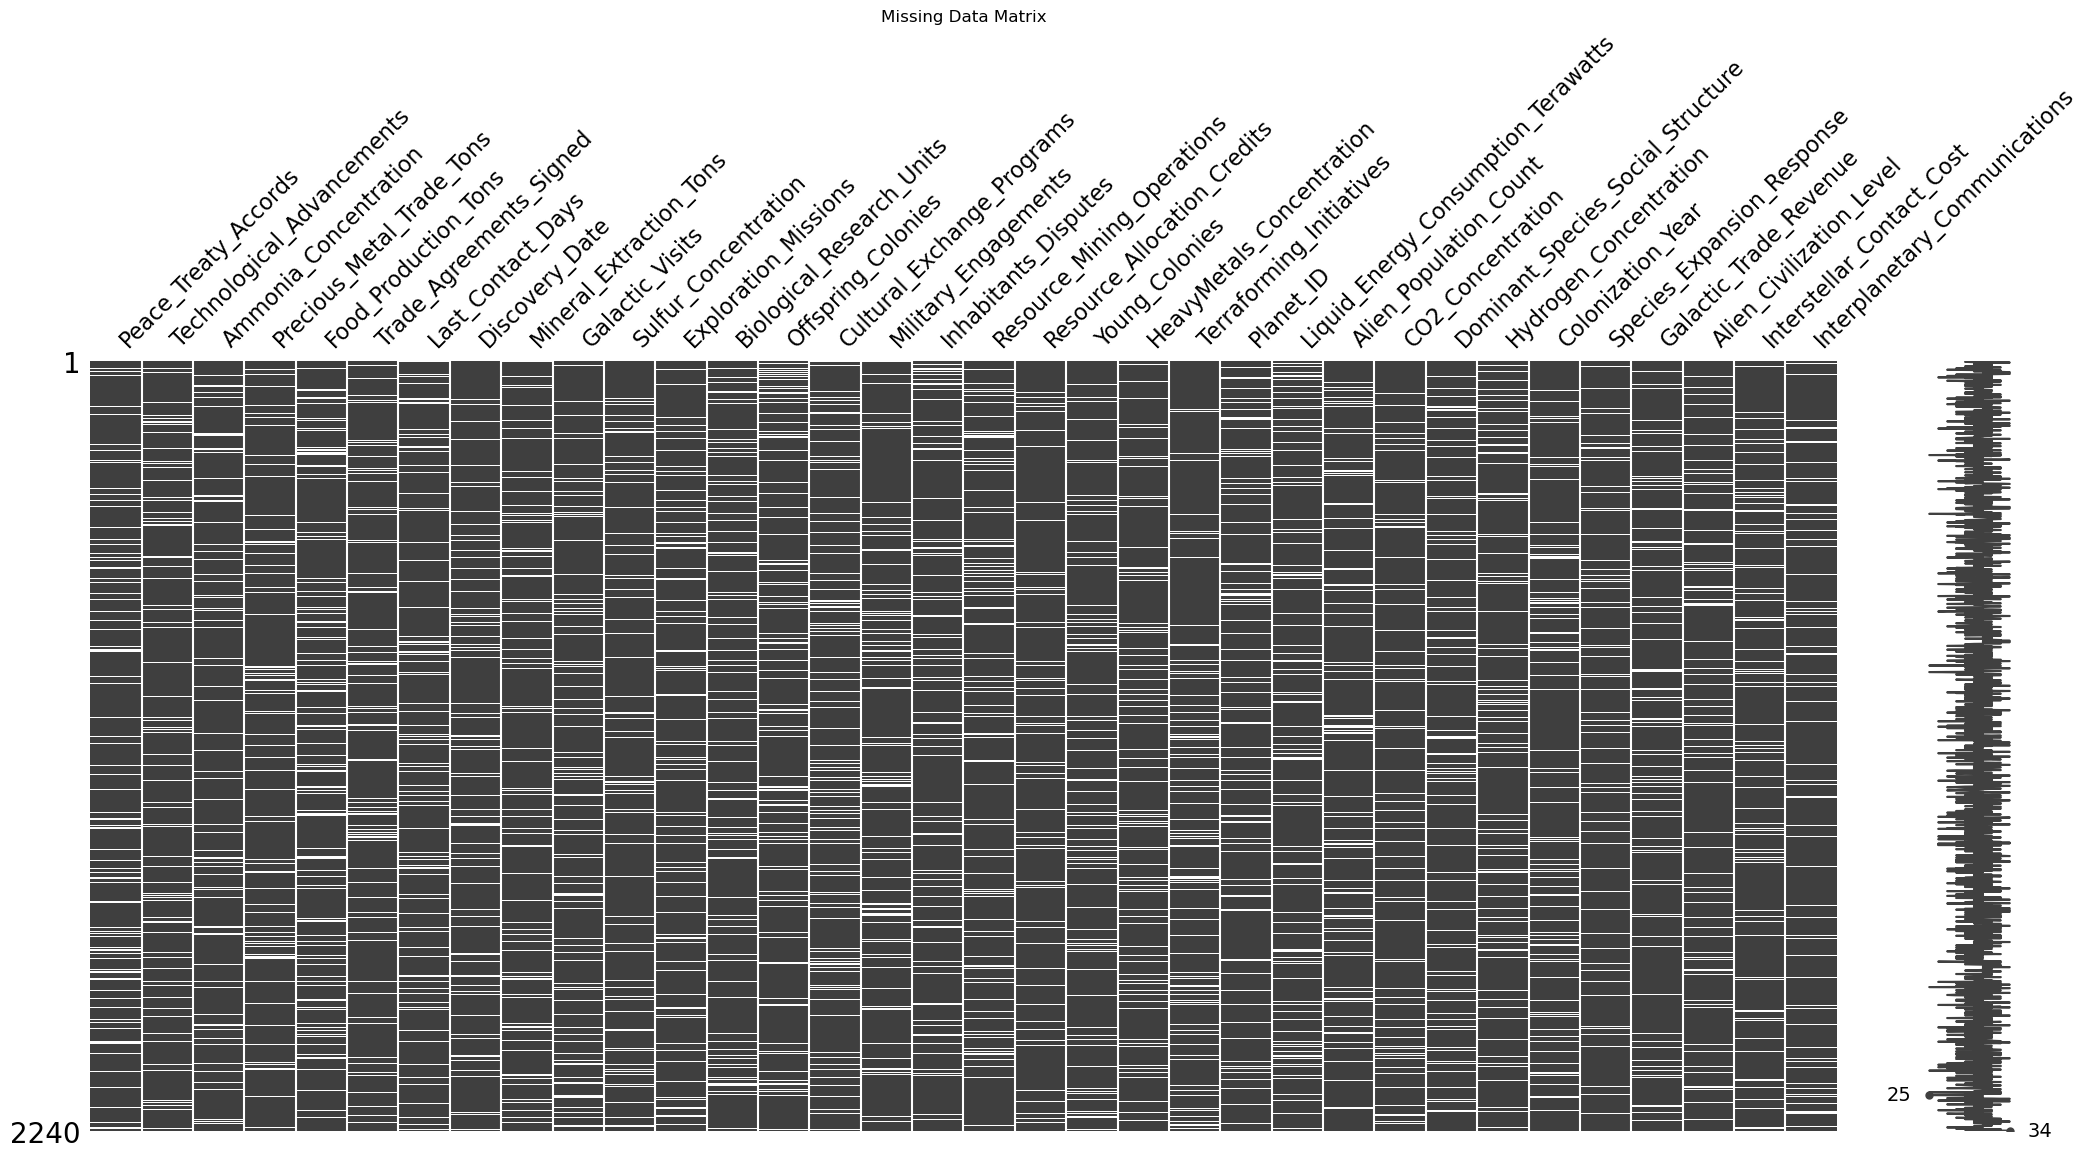

In [8]:
plt.figure(figsize=(6, 3))
msno.matrix(df)
plt.title("Missing Data Matrix")
plt.show()

Number of NaN's per variable and relative percentage, the next cell shows a graphical representation and the number of data rows

There are 2240 rows.
                              Variable  NaN_Count  Relative
0                    Colonization_Year        260  0.116071
1               Galactic_Trade_Revenue        257  0.114732
2  Liquid_Energy_Consumption_Terawatts        248  0.110714
3                 Food_Production_Tons        246  0.109821
4               Alien_Population_Count        241  0.107589
5                   Offspring_Colonies        238  0.106250
6                 Peace_Treaty_Accords        235  0.104911
7                    Last_Contact_Days        234  0.104464
8    Dominant_Species_Social_Structure        233  0.104018
9               Hydrogen_Concentration        231  0.103125


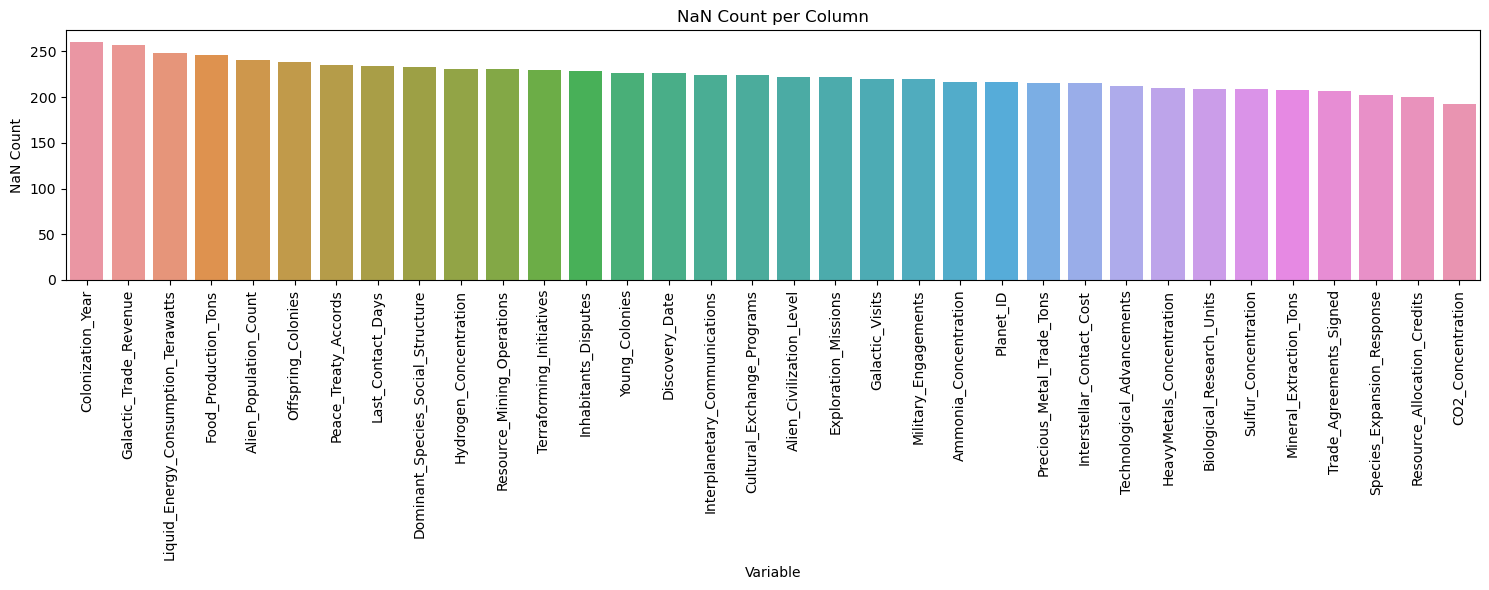

In [9]:
print(f'There are {df.shape[0]} rows.')

nan_counts = df.isna().sum()
nan_counts_df = nan_counts.to_frame(name='NaN_Count')
nan_counts_df = nan_counts_df.reset_index()
nan_counts_df.columns = ['Variable', 'NaN_Count']
nan_counts_df['Relative'] = nan_counts_df['NaN_Count'] / df.shape[0]
nan_counts_df = nan_counts_df.sort_values(by='Relative', ascending=False)
nan_counts_df = nan_counts_df.reset_index(drop=True)
print(nan_counts_df.head(10))
# Set the figure size
plt.figure(figsize=(15, 6))

# Create a bar plot
sns.barplot(data=nan_counts_df, x='Variable', y='NaN_Count', order=nan_counts_df['Variable'])

# Set labels and title
plt.xlabel("Variable")
plt.ylabel("NaN Count")
plt.title("NaN Count per Column")

# Rotate x-axis labels if needed
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Are there rows who do not miss any value?

In [10]:
complete_rows = df.dropna().shape[0]
total_rows = df.shape[0]

print(f'The percentage of rows without empty values is: {round(complete_rows/total_rows, 2)}%')

The percentage of rows without empty values is: 0.03%


*Only 0.03% of the rows is complete, so we will have to predict some NaN's to make sure we have usefull data. We will go over the variables, check their distributions, correlations and drop the columns which we don't need.*

Drop some columns, we will do this in a new dataframe, as such we still have the data when need it afterwards.
Columns we will drop:
* Planet_ID: not relevant for clustering
* Galactic_Trade_Revenue: This variable has constant value '11', so it is not relevant for the clustering.
* Interstellar_Contact_Cost: This variable has constant value '3', so it is not relevant for the clustering.

In [11]:
#Make a copy of the dataframe, as such we can always retrieve deleted data easily
df_prep = df.drop(['Planet_ID', 'Galactic_Trade_Revenue', 'Interstellar_Contact_Cost'], axis=1).copy()

Convert discovery_date to timestamp format and afterwards we standardize it, this way we can plot the distribution easily.

In [12]:
df_prep['Discovery_Date'] = pd.to_datetime(df_prep['Discovery_Date'], errors='coerce')
df_prep['Discovery_Date'] = df_prep['Discovery_Date'].apply(
    lambda x: int(x.timestamp()) if pd.notnull(x) else None
)
df_prep['Discovery_Date'] = (df_prep['Discovery_Date']-np.mean(df_prep['Discovery_Date'])) / np.std(df_prep['Discovery_Date'])

df_prep

Peace_Treaty_Accords  Technological_Advancements  Ammonia_Concentration  \
0                      0.0                         0.0                    1.0   
1                      0.0                         0.0                    2.0   
2                      NaN                         0.0                    1.0   
3                      0.0                         0.0                    1.0   
4                      0.0                         0.0                    0.0   
...                    ...                         ...                    ...   
2235                   0.0                         0.0                    2.0   
2236                   0.0                         0.0                    2.0   
2237                   0.0                         0.0                    1.0   
2238                   0.0                         0.0                    1.0   
2239                   0.0                         NaN                    0.0   

      Precious_Metal_Trade_Tons  Food_Production_Tons  \
0                          40.0                 107.0   
1                         108.0                  49.0   
2                         161.0                  53.0   
3                         107.0                   NaN   
4                          29.0                  59.0   
...                         ...                   ...   
2235                        7.0                   0.0   
2236                        8.0                   0.0   
2237                        4.0                   4.0   
2238                      149.0                  47.0   
2239                       10.0                   2.0   

      Trade_Agreements_Signed  Last_Contact_Days  Discovery_Date  \
0                         1.0               13.0        1.018263   
1                         1.0                NaN       -0.831594   
2                         NaN               61.0       -0.371167   
3                         3.0                NaN        0.847131   
4                         7.0               24.0       -0.053350   
...                       ...                ...             ...   
2235                      1.0                NaN             NaN   
2236                      2.0               39.0        0.647477   
2237                      2.0                0.0        0.403003   
2238                      1.0               92.0       -0.660461   
2239                      2.0               45.0        1.010114   

      Mineral_Extraction_Tons  Galactic_Visits  ...  Terraforming_Initiatives  \
0                       391.0              3.0  ...                       0.0   
1                         NaN              2.0  ...                       0.0   
2                       363.0              5.0  ...                       0.0   
3                        53.0              7.0  ...                       0.0   
4                       177.0              3.0  ...                       0.0   
...                       ...              ...  ...                       ...   
2235                     14.0              5.0  ...                       0.0   
2236                      NaN              5.0  ...                       0.0   
2237                     61.0              4.0  ...                       NaN   
2238                    197.0              4.0  ...                       0.0   
2239                      NaN              7.0  ...                       0.0   

      Liquid_Energy_Consumption_Terawatts  Alien_Population_Count  \
0                                   647.0                 78285.0   
1                                   581.0                 62772.0   
2                                   726.0                 69016.0   
3                                   314.0                 43795.0   
4                                   290.0                 57957.0   
...                                   ...                     ...   
2235                                  8.0                 35924.0   
2236  

Plot the correlation matrix and put the highest correlations in a dataframe to compare after imputing the missing values.

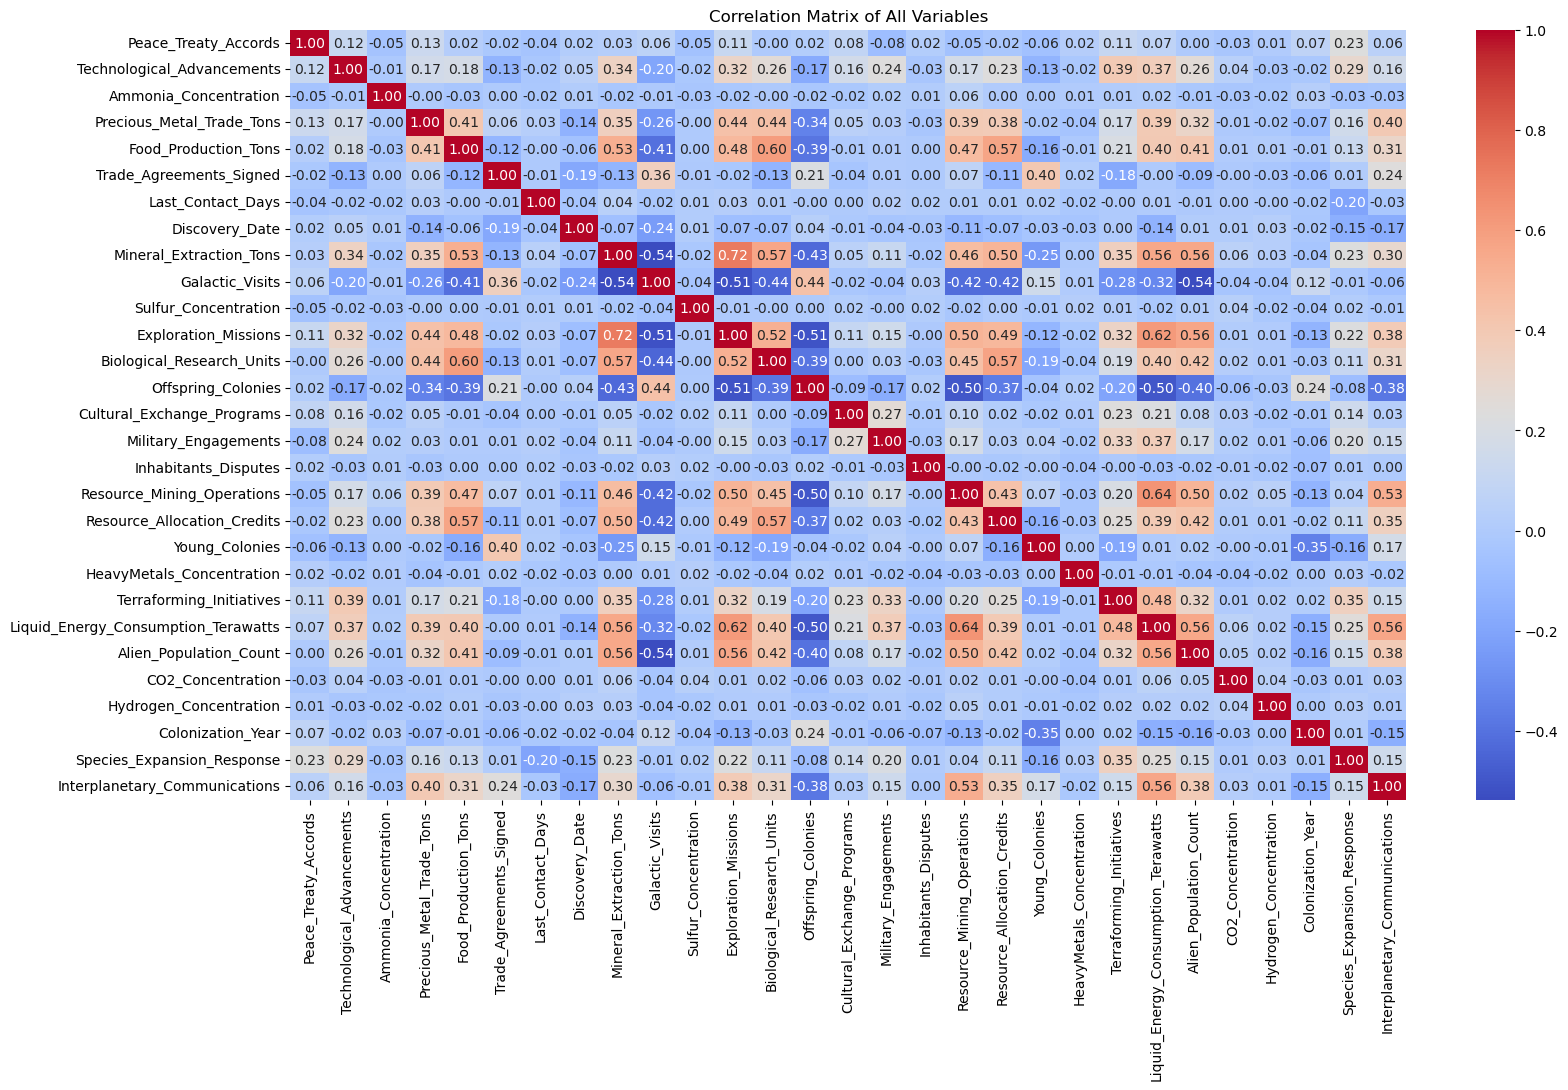

In [13]:
numeric_data = df_prep.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of All Variables")
plt.show()

In [14]:
#Function to calculate and save the biggest correlations. Since we don't pay attention to correlations when filling up the missing values we can see here how big the difference is.
def high_correlations(df, threshold=0.5):
    numeric_data = df.select_dtypes(include=['float64', 'int64'])
    correlation_matrix = numeric_data.corr()

    result = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > threshold:
                result.append({
                    'Variable 1': correlation_matrix.columns[i],
                    'Variable 2': correlation_matrix.columns[j],
                    'Correlation': abs(corr_value)
                })

    correlation_df = pd.DataFrame(result)
    correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)
    correlation_df = correlation_df.reset_index(drop=True)

    return correlation_df

In [15]:
# call the correlation caluculation function
correlation_df = high_correlations(df_prep)
correlation_df.head()

Variable 1                           Variable 2  \
0     Mineral_Extraction_Tons                 Exploration_Missions   
1  Resource_Mining_Operations  Liquid_Energy_Consumption_Terawatts   
2        Exploration_Missions  Liquid_Energy_Consumption_Terawatts   
3        Food_Production_Tons            Biological_Research_Units   
4   Biological_Research_Units          Resource_Allocation_Credits   

   Correlation  
0     0.723468  
1     0.639129  
2     0.615159  
3     0.599803  
4     0.574609

Here are the interpretations for the top 5 correlations:
* Mineral Extraction Tons and Exploration Missions (0.723): A strong positive correlation indicates that as the volume of mineral extraction increases, the number of exploration missions also tends to increase. This may suggest a coordinated effort where higher extraction activities drive further exploration to discover new resources.
* Resource Mining Operations and Liquid Energy Consumption Terawatts (0.639): There is a moderate to strong positive correlation between mining operations and energy consumption. This relationship likely reflects the high energy demand required for mining activities, suggesting that increases in mining operations are closely tied to higher energy use.
* Exploration Missions and Liquid Energy Consumption Terawatts (0.615): A moderate positive correlation suggests that an increase in exploration missions is associated with an increase in energy consumption. This could imply that energy resources are heavily utilized in exploration efforts, possibly due to the need for power-intensive equipment and technology.
* Food Production Tons and Biological Research Units (0.600): There is a moderate positive correlation, indicating that higher levels of food production are associated with an increase in biological research activities. This relationship might be due to research focused on optimizing food production processes, improving crop yields, or understanding biological factors that affect agriculture.
* Biological Research Units and Resource Allocation Credits (0.575): A moderate positive correlation suggests that as biological research increases, so does the allocation of credits (likely funding or resources) towards it. This relationship could imply that biological research attracts more resources, possibly due to its perceived importance or impact on other sectors, such as food production or health-related research.

Function to easily plot the distributions of the demanded variables

In [16]:
# Function to easily plot the distributions of the demanded variables

def perform_graphical_analysis(plots_per_row, columns, df):
    for i in range(0, len(columns), plots_per_row):
        current_columns = columns[i:i+plots_per_row]
        num_current_columns = len(current_columns)
        
        fig, axes = plt.subplots(1, num_current_columns, figsize=(6 * num_current_columns, 6))
        
        # Ensure axes is always a list for easy iteration, even when there's only one plot
        if num_current_columns == 1:
            axes = [axes]

        for j, column in enumerate(current_columns):
            if df[column].nunique() <= 2:
                sns.countplot(x=df[column], ax=axes[j])
                axes[j].set_title(f'Count plot of {column} (binary)')
                axes[j].set_xlabel(column)
                axes[j].set_ylabel('Count')
            else:
                sns.histplot(df[column], kde=True, ax=axes[j])
                axes[j].set_title(f'Distribution of {column}')
                axes[j].set_xlabel(column)
                axes[j].set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

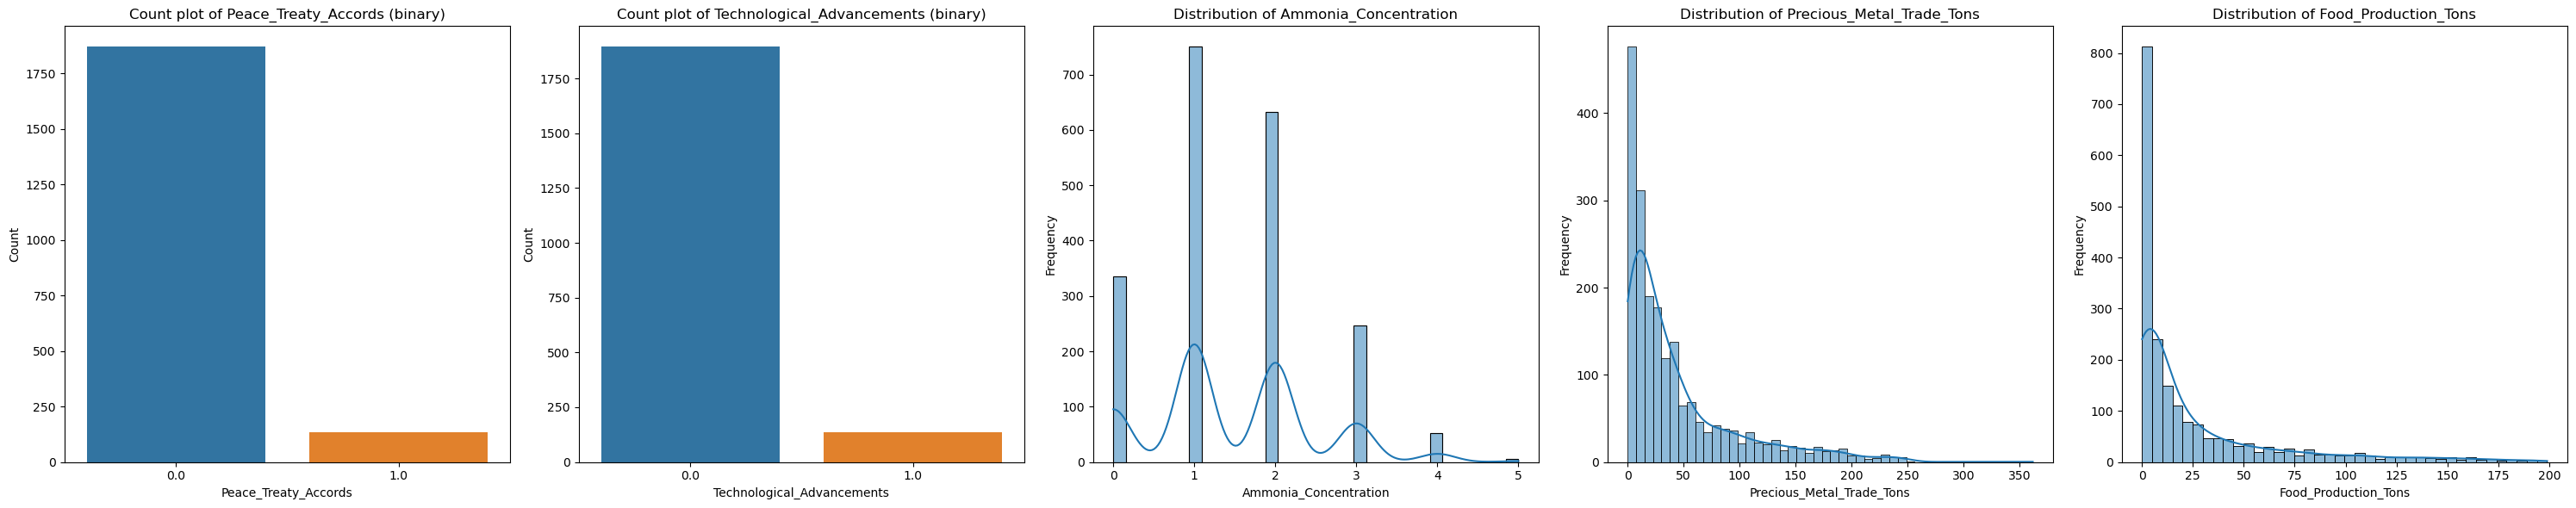

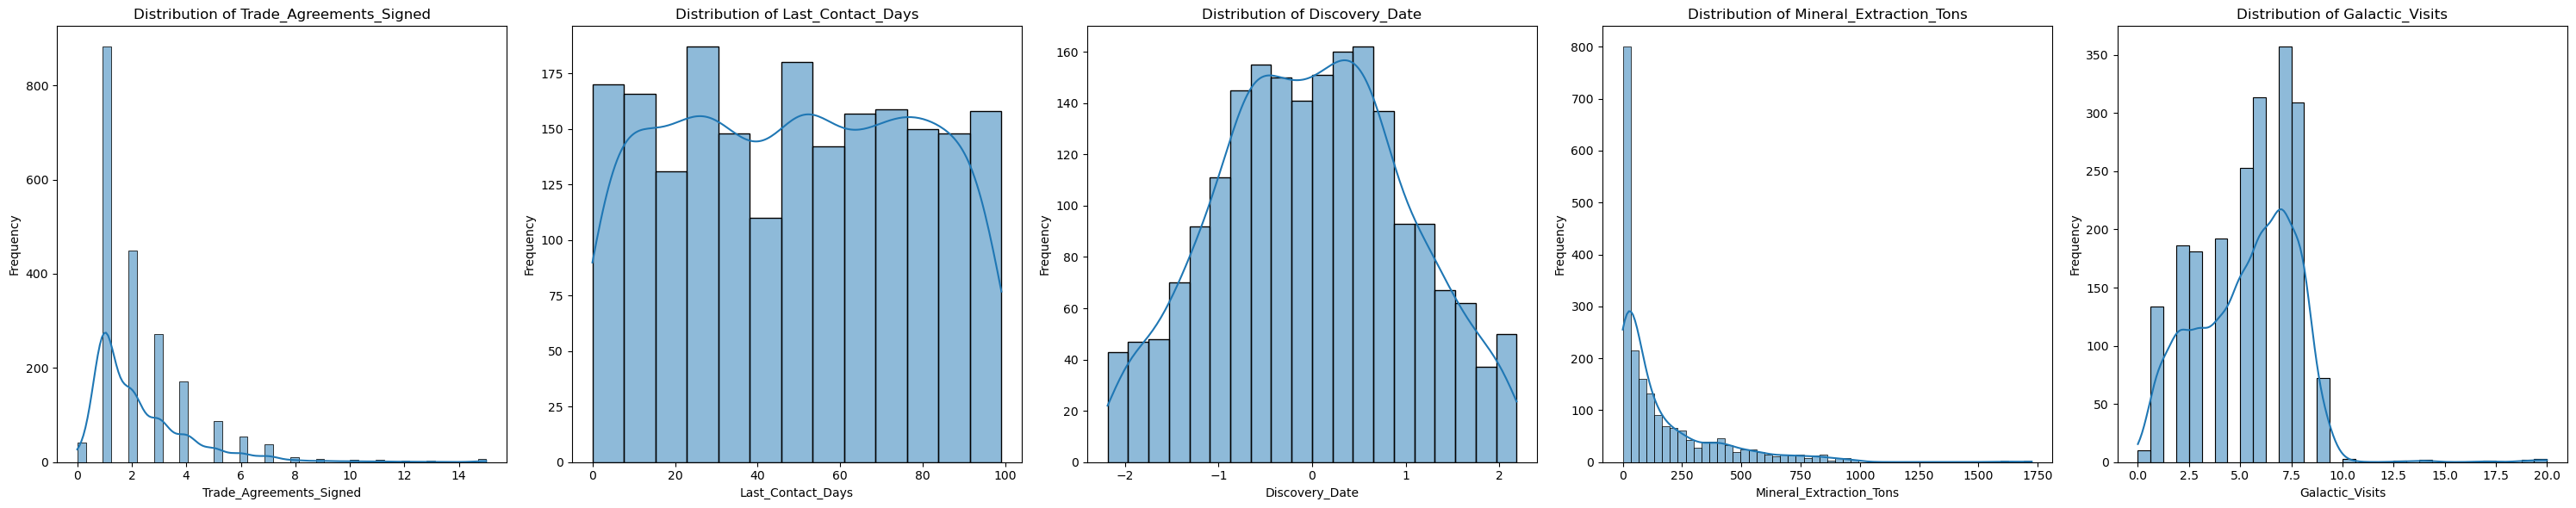

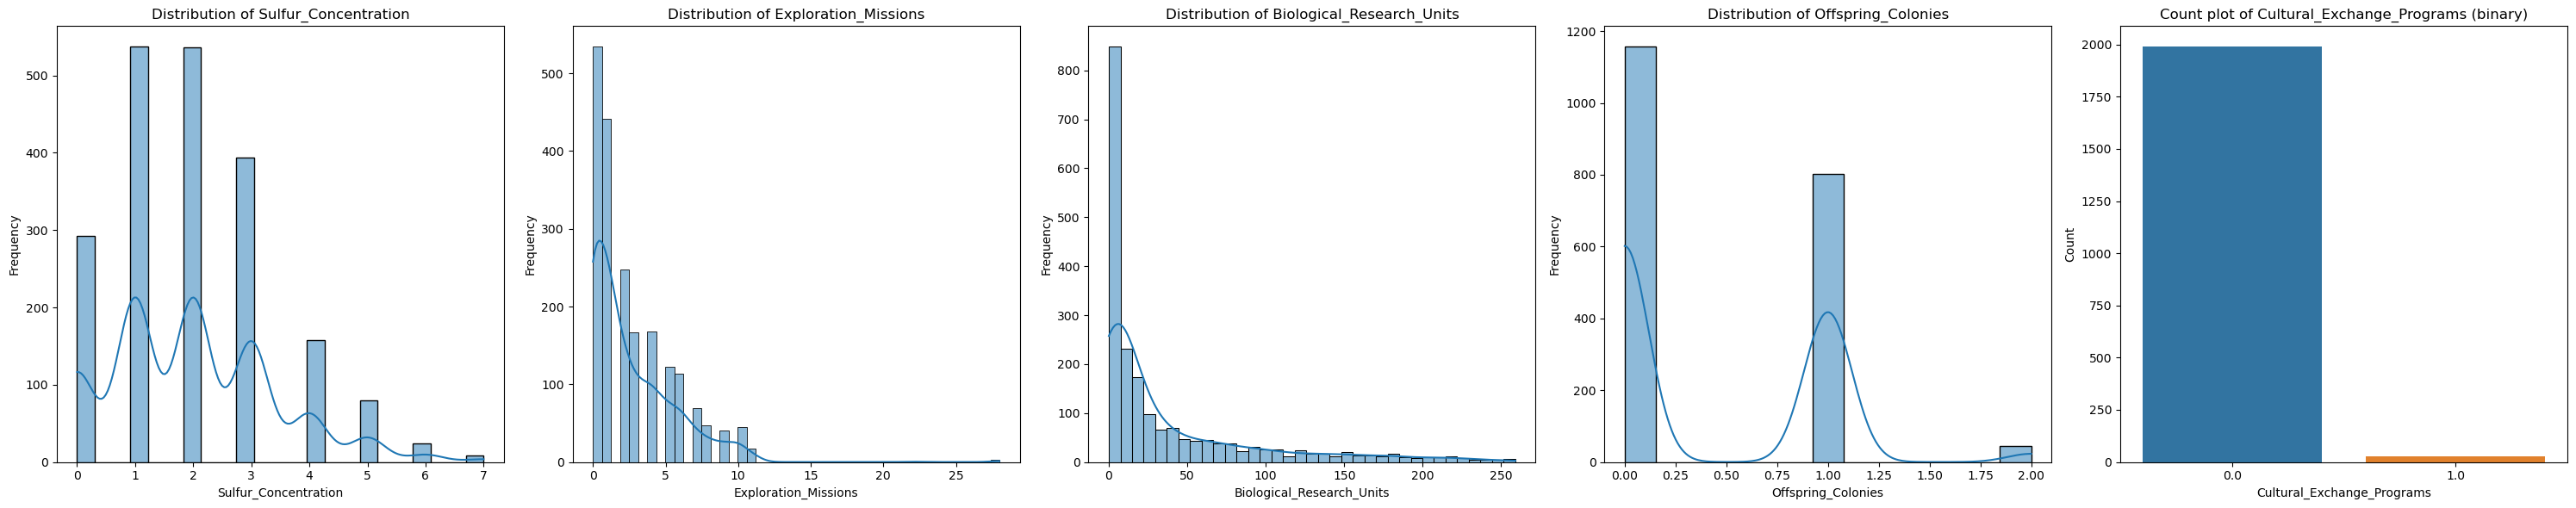

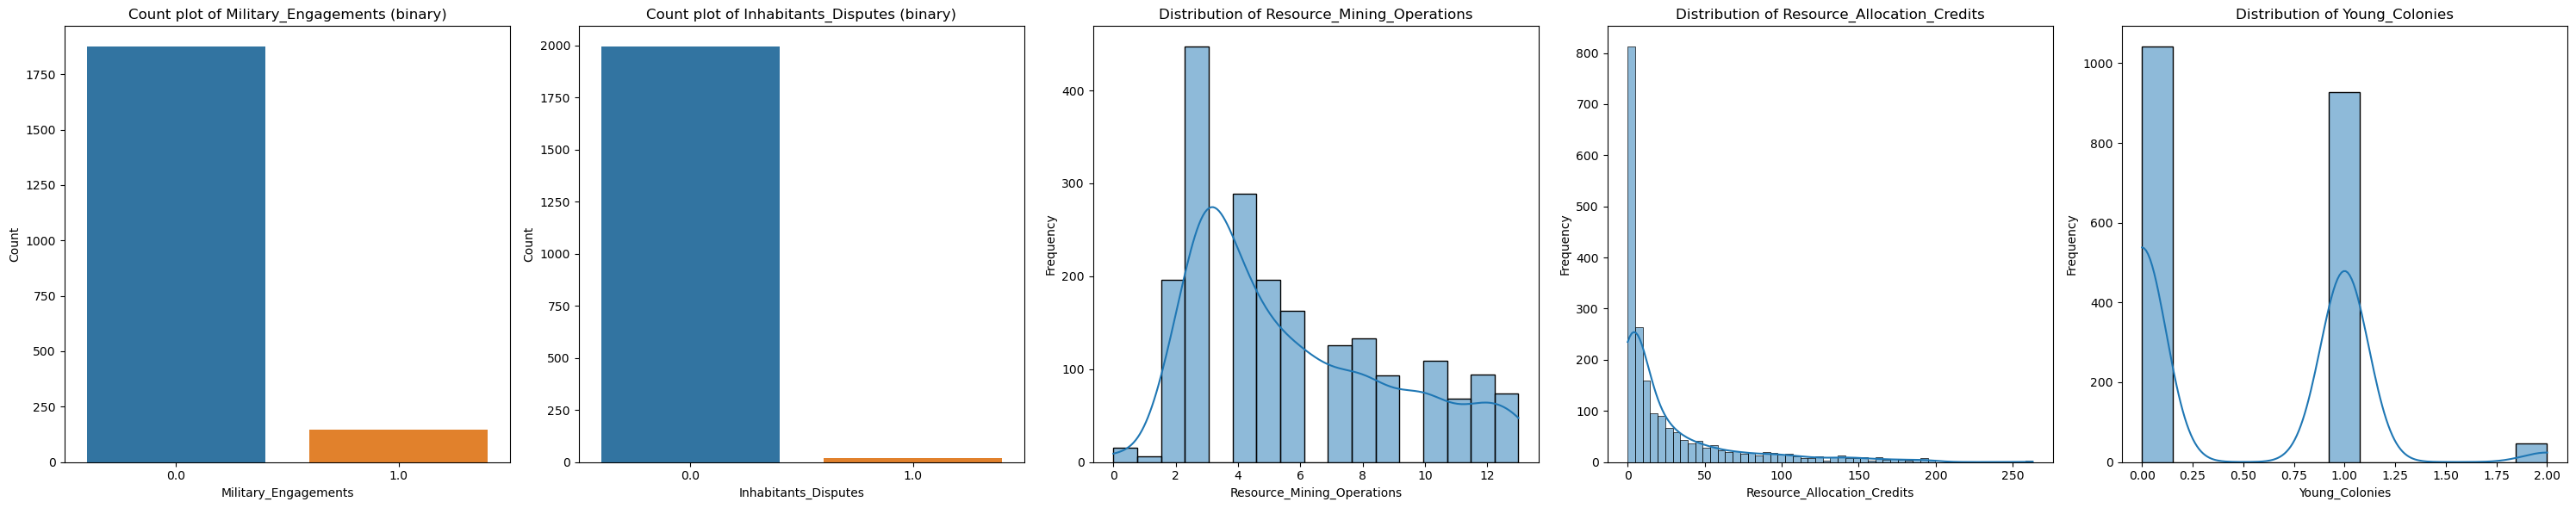

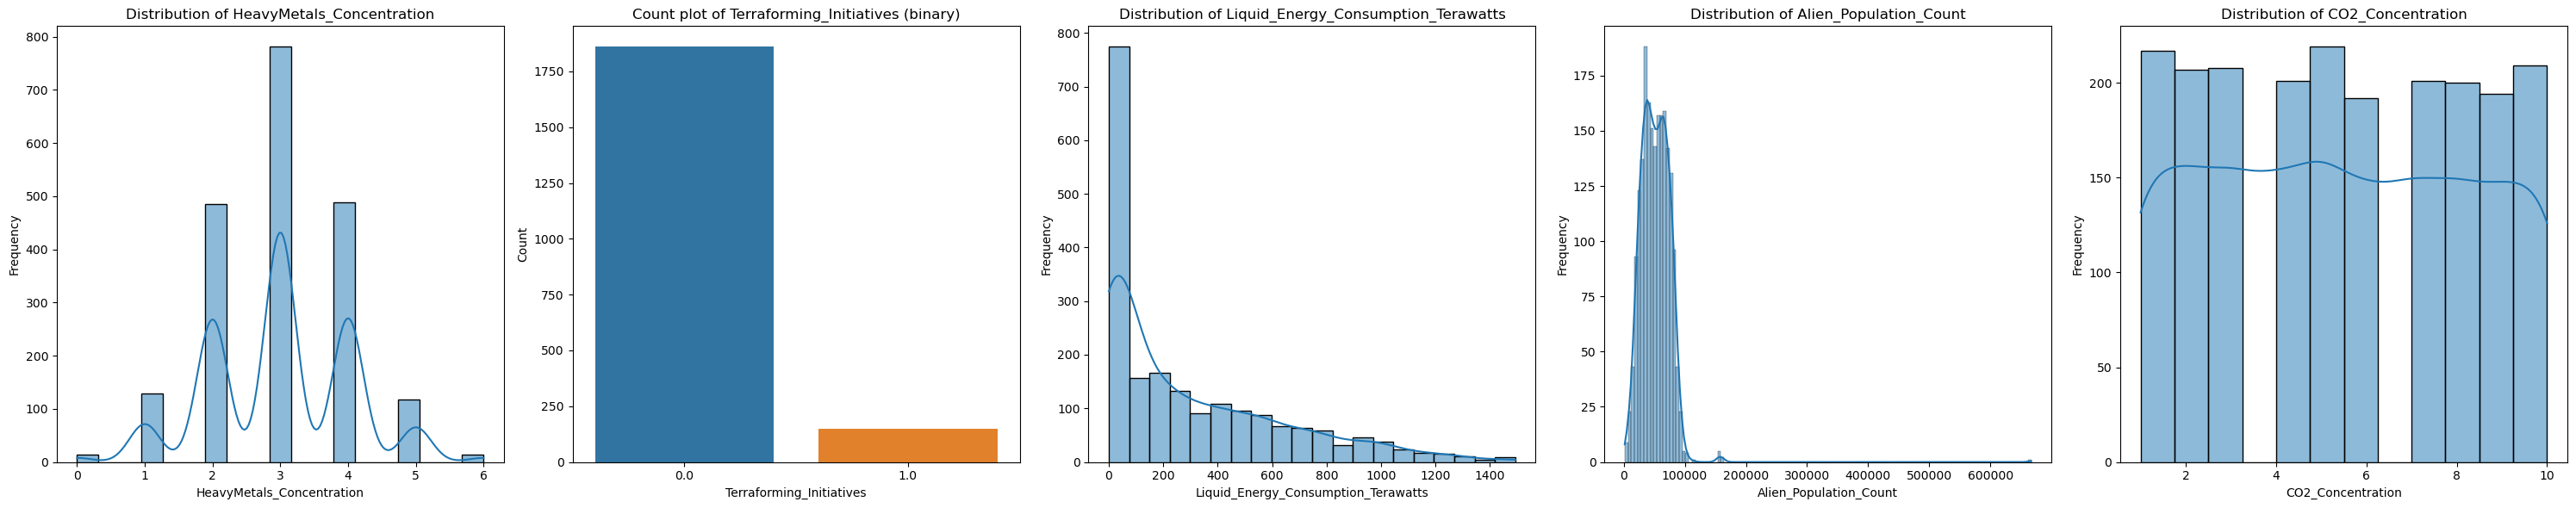

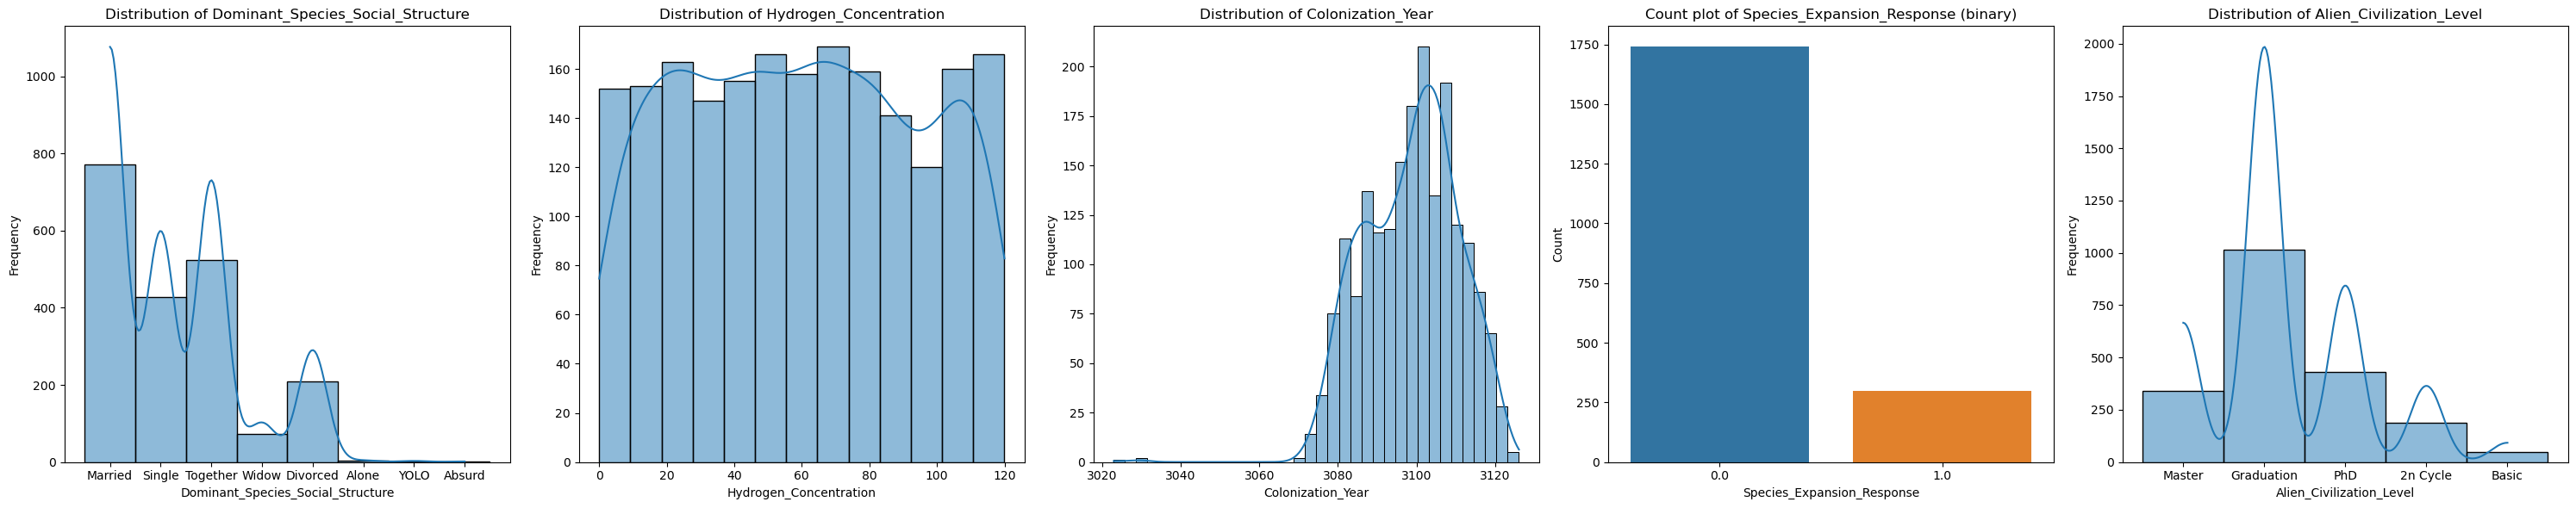

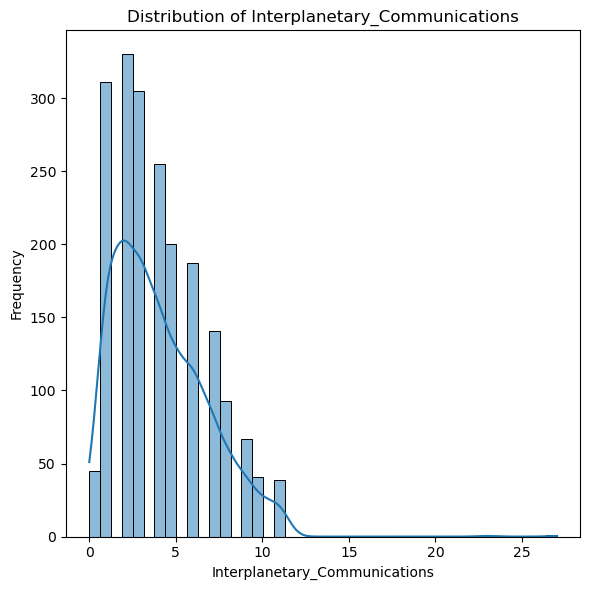

In [17]:
# Plot all variables to get an idea of the different distributions
plots_per_row = 5
columns = df_prep.columns
perform_graphical_analysis(plots_per_row, columns, df_prep)

---
## Start filling up the missing values using the distributions

### Imputation and Encoding Workflow

1. **Imputing and Encoding Categorical Variables**  
   - Begin by imputing missing values for the categorical variable `Dominant_Species_Social_Structure`.  
   - After imputation, apply one-hot encoding to this variable for further analysis.  
   - Encode the `Alien_Civilization_Level` variable using a level-based coding approach.

2. **Handling Binomial and Multinomial Variables**  
   - Separate binomial and multinomial variables based on their characteristics, which can be easily identified from the distribution plots.

3. **Retrieving Distributions for Numerical Variables**  
   - For other variables, determine their underlying distribution using a custom function.  
   - This function evaluates distributions by plotting and selecting the one with the highest p-value (likelyhood).

4. **Filling Missing Values**  
   - Use the identified distributions to impute missing values, ensuring consistency with the observed patterns.

In [18]:
# Replace the categorical values by numerical values. Alien_Civilization_Level is ordinal, Dominant_Species_Social_Structure not. So we use level coding, one-hot encoding resp.

df_in_progress = df_prep.copy()

#One hot encoding
# Step 1: Impute missing values in the categorical column
imputer = SimpleImputer(strategy='most_frequent', fill_value='missing')
df_in_progress['Dominant_Species_Social_Structure'] = imputer.fit_transform(df_in_progress[['Dominant_Species_Social_Structure']])

# Step 2: Apply one-hot encoding
df_in_progress = pd.get_dummies(df_in_progress, columns=['Dominant_Species_Social_Structure'])
# Now df_prep has no missing values in the 'Dominant_Species_Social_Structure' column and is one-hot encoded.


#Categorical to numeral values
df_in_progress['Alien_Civilization_Level'] = df_in_progress['Alien_Civilization_Level'].astype('category').cat.codes
df_in_progress['Alien_Civilization_Level'] = df_in_progress['Alien_Civilization_Level'].astype(int)
#Nan's are automatically replaced by -1, we put the NaN's back
df_in_progress['Alien_Civilization_Level'] = df_in_progress['Alien_Civilization_Level'].replace(-1, np.nan)

df_in_progress

Peace_Treaty_Accords  Technological_Advancements  Ammonia_Concentration  \
0                      0.0                         0.0                    1.0   
1                      0.0                         0.0                    2.0   
2                      NaN                         0.0                    1.0   
3                      0.0                         0.0                    1.0   
4                      0.0                         0.0                    0.0   
...                    ...                         ...                    ...   
2235                   0.0                         0.0                    2.0   
2236                   0.0                         0.0                    2.0   
2237                   0.0                         0.0                    1.0   
2238                   0.0                         0.0                    1.0   
2239                   0.0                         NaN                    0.0   

      Precious_Metal_Trade_Tons  Food_Production_Tons  \
0                          40.0                 107.0   
1                         108.0                  49.0   
2                         161.0                  53.0   
3                         107.0                   NaN   
4                          29.0                  59.0   
...                         ...                   ...   
2235                        7.0                   0.0   
2236                        8.0                   0.0   
2237                        4.0                   4.0   
2238                      149.0                  47.0   
2239                       10.0                   2.0   

      Trade_Agreements_Signed  Last_Contact_Days  Discovery_Date  \
0                         1.0               13.0        1.018263   
1                         1.0                NaN       -0.831594   
2                         NaN               61.0       -0.371167   
3                         3.0                NaN        0.847131   
4                         7.0               24.0       -0.053350   
...                       ...                ...             ...   
2235                      1.0                NaN             NaN   
2236                      2.0               39.0        0.647477   
2237                      2.0                0.0        0.403003   
2238                      1.0               92.0       -0.660461   
2239                      2.0               45.0        1.010114   

      Mineral_Extraction_Tons  Galactic_Visits  ...  Alien_Civilization_Level  \
0                       391.0              3.0  ...                       3.0   
1                         NaN              2.0  ...                       3.0   
2                       363.0              5.0  ...                       2.0   
3                        53.0              7.0  ...                       3.0   
4                       177.0              3.0  ...                       2.0   
...                       ...              ...  ...                       ...   
2235                     14.0              5.0  ...                       3.0   
2236                      NaN              5.0  ...                       4.0   
2237                     61.0              4.0  ...                       NaN   
2238                    197.0              4.0  ...                       2.0   
2239                      NaN              7.0  ...                       2.0   

      Interplanetary_Communications  Dominant_Species_Social_Structure_Absurd  \
0                               6.0                                         0   
1                               5.0                                         0   
2                               8.0                                         0   
3                               7.0                                         0   
4                               4.0                                         0   
...                             ...                                     

In [19]:
# Functions to fill missing values using their respective distributions

# Bernoulli distribution
def impute_with_bernoulli(df, column_name):
    data_column = df[column_name].copy()
    p_success = data_column.mean()
    
    nan_indices = data_column.isna()
    samples = bernoulli(p_success).rvs(size=nan_indices.sum())
    
    data_column.loc[nan_indices] = samples
    
    df[column_name] = data_column

    return df

# Multinomial distribution
def impute_with_multinominal(df,column_name):
    column_data = df[column_name]
    non_nan_data = column_data.dropna()
    
    value_counts = non_nan_data.value_counts(normalize=True).sort_index()
    possible_values = np.arange(int(non_nan_data.min()), int(non_nan_data.max()) + 1)
    probs = [value_counts.get(value, 0) for value in possible_values]
    
    nan_indices = column_data[column_data.isna()].index
    sampled_values = np.random.choice(possible_values, size=len(nan_indices), p=probs)
    
    df.loc[nan_indices, column_name] = sampled_values

    return df

# Gamma distribution
def impute_with_gamma(df, column_name):
    observed_data = df[column_name].dropna()
    shape, loc, scale = gamma.fit(observed_data)

    num_missing = df[column_name].isna().sum()
    imputed_values = gamma.rvs(shape, loc=loc, scale=scale, size=num_missing)
    
    imputed_values_rounded = [int(val) for val in imputed_values]

    na_indices = df[df[column_name].isna()].index
    df.loc[na_indices, column_name] = imputed_values_rounded

    return df

# Uniform distribution
def impute_with_uniform(df, column_name):
    min_val = min(df[column_name])
    max_val = max(df[column_name])
    num_missing = df[column_name].isna().sum()

    imputed_values = np.random.uniform(min_val, max_val, size=num_missing).astype(int)

    na_indices = df[df[column_name].isna()].index
    df.loc[na_indices, column_name] = imputed_values

    return df

# Normal distribution
def impute_with_normal(df, column_name):
    observed_data = df[column_name].dropna()
    loc, scale = norm.fit(observed_data)

    num_missing = df[column_name].isna().sum()
    imputed_values = norm.rvs(loc=loc, scale=scale, size=num_missing)
    
    imputed_values_rounded = [int(val) for val in imputed_values]

    na_indices = df[df[column_name].isna()].index
    df.loc[na_indices, column_name] = imputed_values_rounded

    return df

# Lognormal distribution
def impute_with_lognormal(df, column_name):
    # Get observed (non-missing) data
    observed_data = df[column_name].dropna()
    
    # Fit a lognormal distribution to the observed data
    shape, loc, scale = lognorm.fit(observed_data, floc=0)  # Fix loc=0 for typical lognormal fits
    
    # Generate imputed values for missing data
    num_missing = df[column_name].isna().sum()
    imputed_values = lognorm.rvs(shape, loc, scale, size=num_missing)
    
    # Round imputed values to integers if needed
    imputed_values_rounded = [int(val) for val in imputed_values]

    # Assign imputed values back to the DataFrame
    na_indices = df[df[column_name].isna()].index
    df.loc[na_indices, column_name] = imputed_values_rounded

    return df

# Beta distribution
def impute_with_beta(df, column_name):
    observed_data = df[column_name].dropna()
    min_val = observed_data.min()
    max_val = observed_data.max()
    scaled_data = (observed_data - min_val) / (max_val - min_val)
    a, b, loc, scale = beta.fit(scaled_data, floc=0, fscale=1)
    num_missing = df[column_name].isna().sum()
    imputed_scaled_values = beta.rvs(a, b, loc=0, scale=1, size=num_missing)
    imputed_values = imputed_scaled_values * (max_val - min_val) + min_val
    na_indices = df[df[column_name].isna()].index
    df.loc[na_indices, column_name] = imputed_values

    return df

We try to figure out which distributions match the variables. Therefore we perform a test developped by chat GPT. How to interprete the results?
1.	KS Statistic: This value represents the maximum absolute difference between the cumulative distribution function (CDF) of the data and the CDF of the theoretical distribution. A smaller KS statistic suggests a closer match between the data and the theoretical distribution.
2.	P-value: This value indicates the significance of the difference between the data and the theoretical distribution:
    * A high p-value (typically above 0.05) suggests that we cannot reject the null hypothesis, meaning the data could plausibly follow the tested distribution.
    * A low p-value (below 0.05) suggests a significant difference, meaning the data likely does not follow the tested distribution.

In [20]:
def retrieve_distribution(variable):
# Extract the data for the variable to analyze
    variable_distribution = df_in_progress[variable].dropna()

    # List of distributions to test
    dist_names = ['norm', 'expon', 'gamma', 'lognorm', 'uniform', 'poisson', 'geom', 'binom']
    fit_results = {}

    for dist_name in dist_names:
        try:
            # Get the distribution
            dist = getattr(stats, dist_name)
            
            # Fit the distribution to the data
            if dist_name == 'binom':
                # For binomial, n is approximated as max value, p is fitted
                n = int(variable_distribution.max())
                p = variable_distribution.mean() / n
                params = (n, p)
                ks_stat, ks_p_value = stats.kstest(variable_distribution, dist_name, args=params)
            elif dist_name == 'poisson':
                # For Poisson, we use the mean as the lambda parameter
                lambda_param = variable_distribution.mean()
                params = (lambda_param,)
                ks_stat, ks_p_value = stats.kstest(variable_distribution, dist_name, args=params)
            elif dist_name == 'geom':
                # For Geometric, the probability parameter p is approximated as 1 / mean
                p = 1 / variable_distribution.mean()
                params = (p,)
                ks_stat, ks_p_value = stats.kstest(variable_distribution, dist_name, args=params)
            else:
                # Fit continuous distributions normally
                params = dist.fit(variable_distribution)
                ks_stat, ks_p_value = stats.kstest(variable_distribution, dist_name, args=params)
            
            # Store the results
            fit_results[dist_name] = {'params': params, 'ks_stat': ks_stat, 'p_value': ks_p_value}
            
        except Exception as e:
            # Handle distributions that may fail to fit
            fit_results[dist_name] = {'params': None, 'ks_stat': None, 'p_value': None, 'error': str(e)}

    # Convert results to a DataFrame and sort by p-value (higher indicates a better fit)
    fit_results_df = pd.DataFrame(fit_results).T
    fit_results_df.sort_values('p_value', ascending=False, inplace=True)

    # Display the results
    return fit_results_df

In [21]:
# Divide the variables and perform the retrieve_distribution function on the ones of which we can not immediately recognise the distribution

numeric_data = df_in_progress.select_dtypes(include=['float64', 'int64'])

all_columns = numeric_data.columns
bernoulli_columns = ['Peace_Treaty_Accords', 'Technological_Advancements', 'Cultural_Exchange_Programs', 
                     'Military_Engagements', 'Inhabitants_Disputes', 'Terraforming_Initiatives', 'Species_Expansion_Response'
                     ]
multinomial_columns = ['Ammonia_Concentration', 'Trade_Agreements_Signed', 'Galactic_Visits', 
                       'Offspring_Colonies', 'Resource_Mining_Operations', 'Young_Colonies', 'Sulfur_Concentration', 'Exploration_Missions', 
                       'HeavyMetals_Concentration', 'CO2_Concentration', 'Interplanetary_Communications', 'Alien_Civilization_Level'
                       ]


all_columns = [col for col in all_columns if col not in bernoulli_columns]
all_columns = [col for col in all_columns if col not in multinomial_columns]

filtered_df = numeric_data[all_columns]

results = list()

for column in filtered_df.columns:
    results_df_for_column = retrieve_distribution(column)
    top_result = results_df_for_column.iloc[0].copy()
    top_result['variable'] = column
    top_result['best_distribution'] = results_df_for_column.index[0]
    results.append(top_result)

results_df = pd.DataFrame(results).reset_index(drop=True)
results_df

params   ks_stat       p_value  \
0   (0.6616654656103012, -1.5701225791501072e-27, ...  0.060974  5.486718e-07   
1   (0.4751850655693679, -1.0225859724409498e-27, ...  0.182046  2.661821e-58   
2                                         (0.0, 99.0)  0.022992  2.358298e-01   
3   (0.016727736911768827, -59.79191312877824, 59....  0.023720  2.038971e-01   
4   (1.6194690828692555, -0.07847949517516009, 58....  0.056421  4.600222e-06   
5   (0.36349299679333014, -2.8825664562810563e-29,...  0.169867  1.053500e-51   
6   (0.5348456301745077, -9.249853540613464e-28, 2...  0.187255  4.249597e-63   
7   (0.7546798263384407, -2.690828140947089e-24, 2...  0.147224  3.774609e-38   
8   (8.707456428145694, -15585.850024985171, 7754....  0.053277  2.263077e-05   
9                                      (0.03, 119.96)  0.017448  5.675432e-01   
10             (3098.669696969697, 11.93225790435538)  0.059032  1.935768e-06   

                               variable best_distribution  
0             Precious_Metal_Trade_Tons             gamma  
1                  Food_Production_Tons             gamma  
2                     Last_Contact_Days           uniform  
3                        Discovery_Date           lognorm  
4               Mineral_Extraction_Tons           lognorm  
5             Biological_Research_Units             gamma  
6           Resource_Allocation_Credits             gamma  
7   Liquid_Energy_Consumption_Terawatts             gamma  
8                Alien_Population_Count             gamma  
9                Hydrogen_Concentration           uniform  
10                    Colonization_Year              norm

In [22]:
# For some reason Python thinks Discovery_Date is lognorm but the values are normally distributed (we standardized it) and so it also has negative values.
results_df.loc[results_df["variable"] == 'Discovery_Date', "best_distribution"] = 'norm'

In [23]:
# Fill the missing values up using the distributions
distribution_functions = {
    "bernoulli": (bernoulli_columns, impute_with_bernoulli),
    "multinomial": (multinomial_columns, impute_with_multinominal),
    "gamma": (results_df[results_df["best_distribution"] == "gamma"]["variable"].tolist(), impute_with_gamma),
    "uniform": (results_df[results_df["best_distribution"] == "uniform"]["variable"].tolist(), impute_with_uniform),
    "norm": (results_df[results_df["best_distribution"] == "norm"]["variable"].tolist(), impute_with_normal),
    "beta": (results_df[results_df["best_distribution"] == "beta"]["variable"].tolist(), impute_with_beta),
    "lognorm": (results_df[results_df["best_distribution"] == "lognorm"]["variable"].tolist(), impute_with_gamma)
}

# Loop through each distribution and impute columns
for distribution, (columns_to_impute, impute_function) in distribution_functions.items():
    try:
        for col in columns_to_impute:
            df_in_progress = impute_function(df_in_progress, col)
    except Exception as e:
        print(e)

# Check for remaining missing values
df_in_progress.isna().sum()

Peace_Treaty_Accords                          0
Technological_Advancements                    0
Ammonia_Concentration                         0
Precious_Metal_Trade_Tons                     0
Food_Production_Tons                          0
Trade_Agreements_Signed                       0
Last_Contact_Days                             0
Discovery_Date                                0
Mineral_Extraction_Tons                       0
Galactic_Visits                               0
Sulfur_Concentration                          0
Exploration_Missions                          0
Biological_Research_Units                     0
Offspring_Colonies                            0
Cultural_Exchange_Programs                    0
Military_Engagements                          0
Inhabitants_Disputes                          0
Resource_Mining_Operations                    0
Resource_Allocation_Credits                   0
Young_Colonies                                0
HeavyMetals_Concentration               

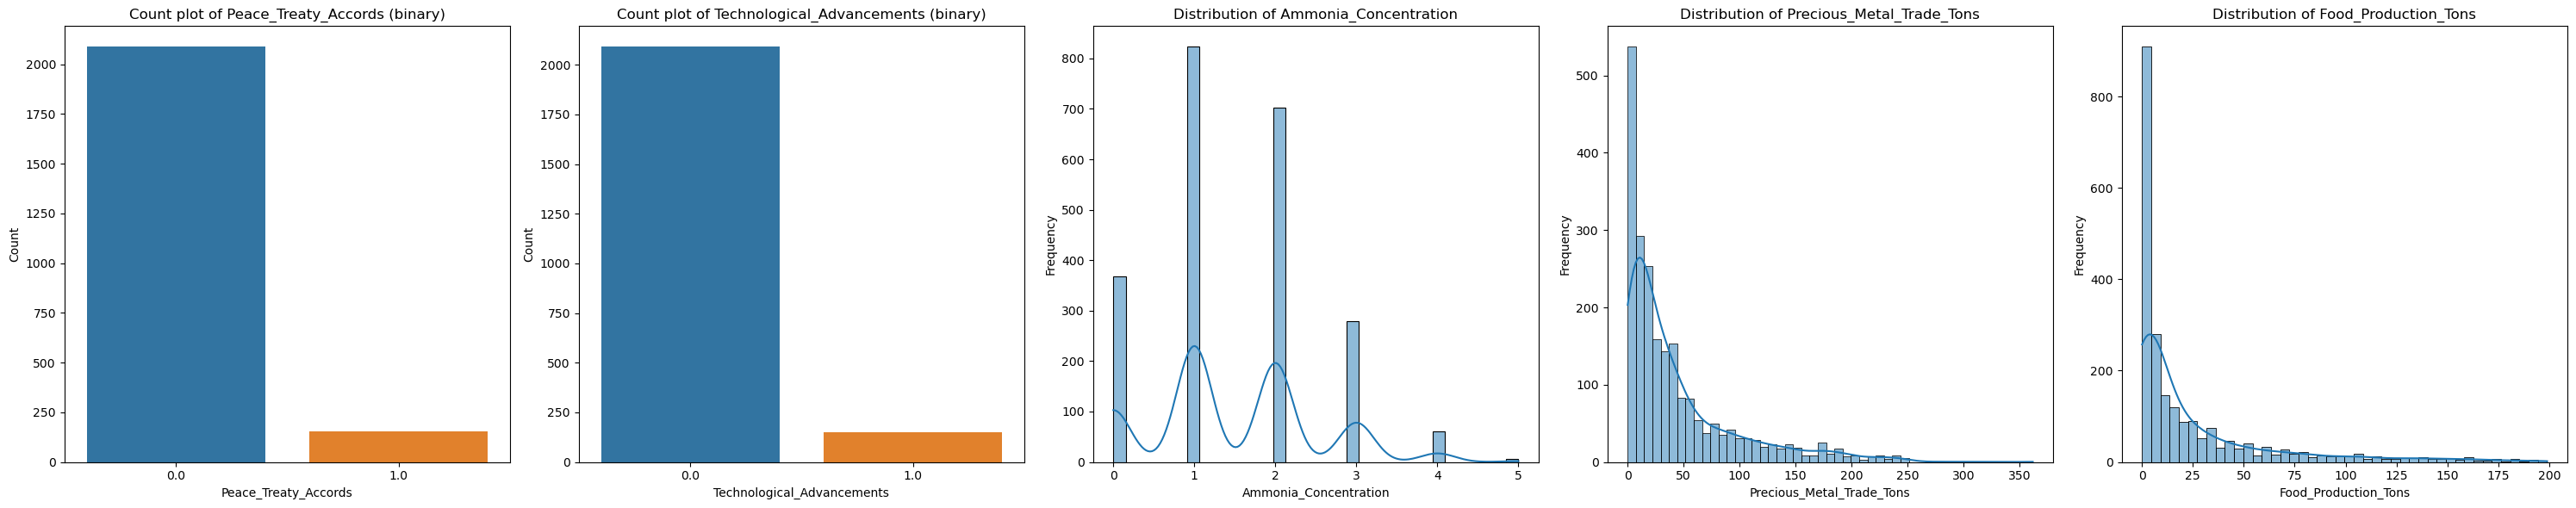

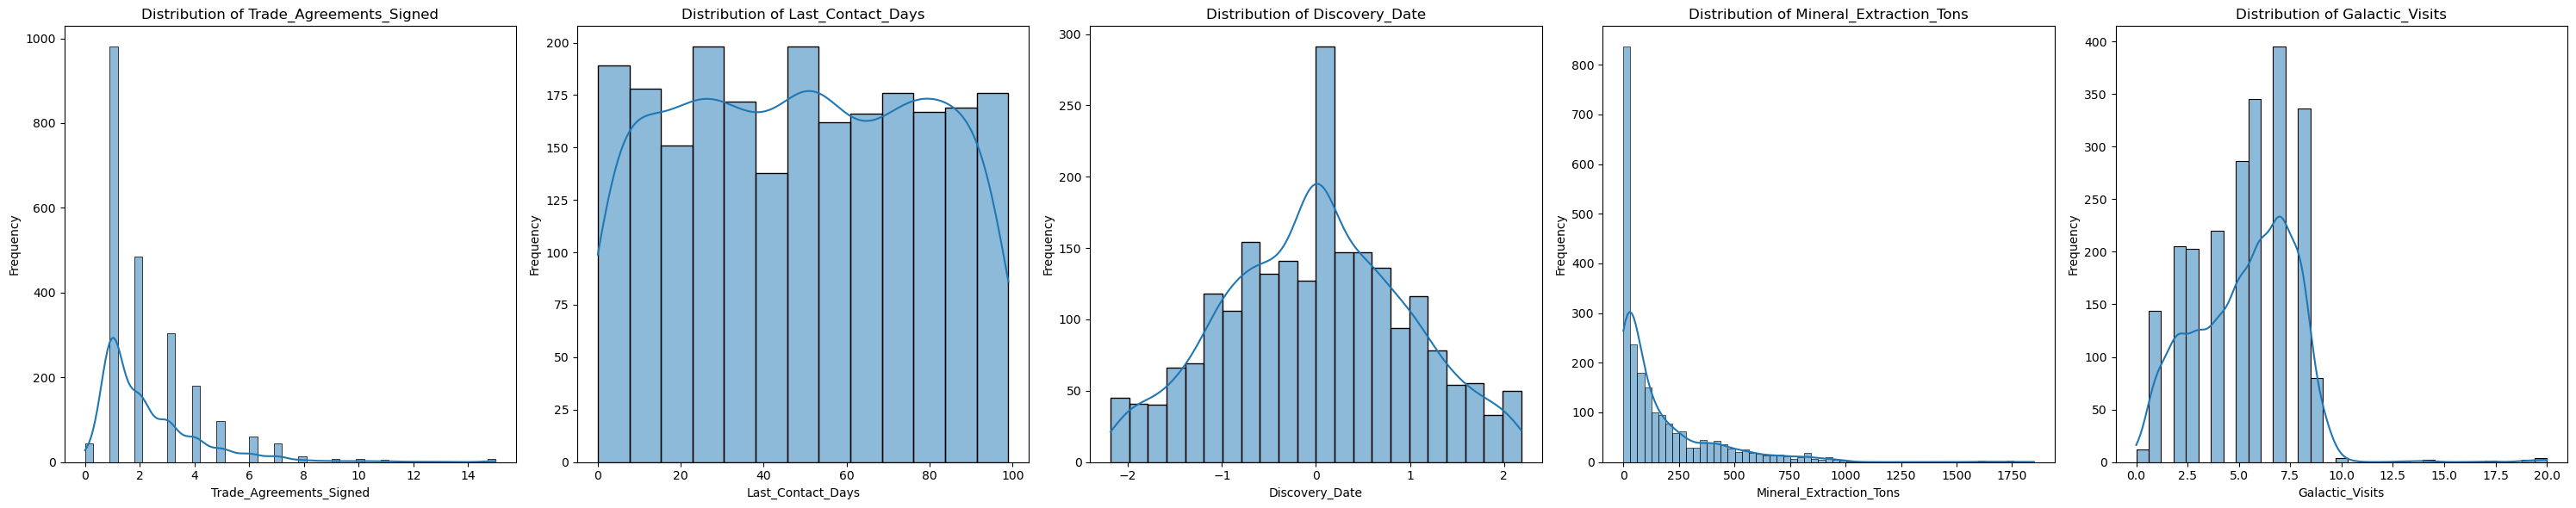

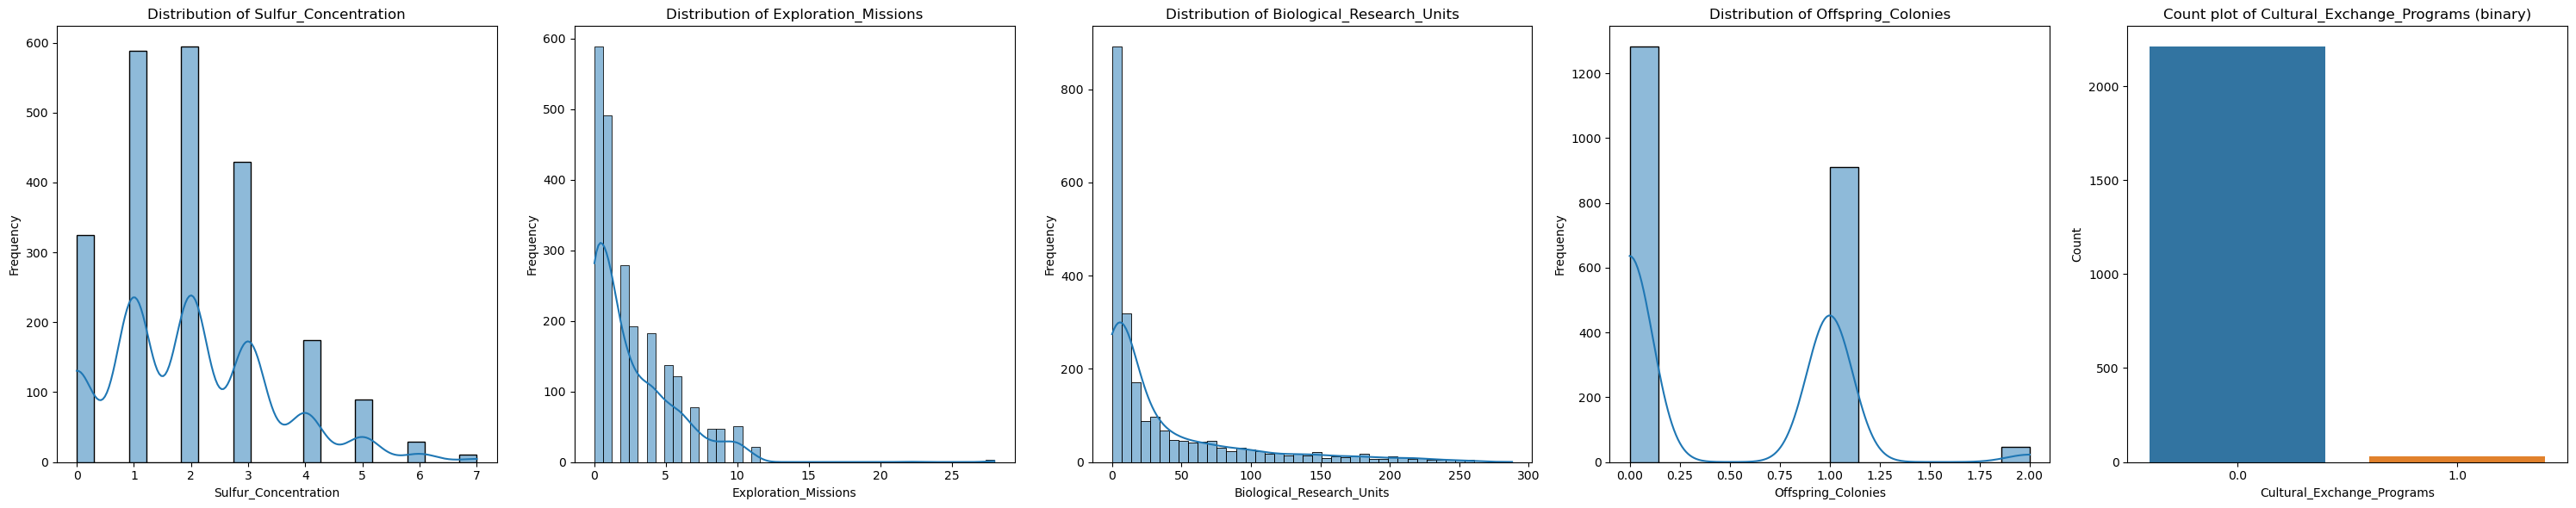

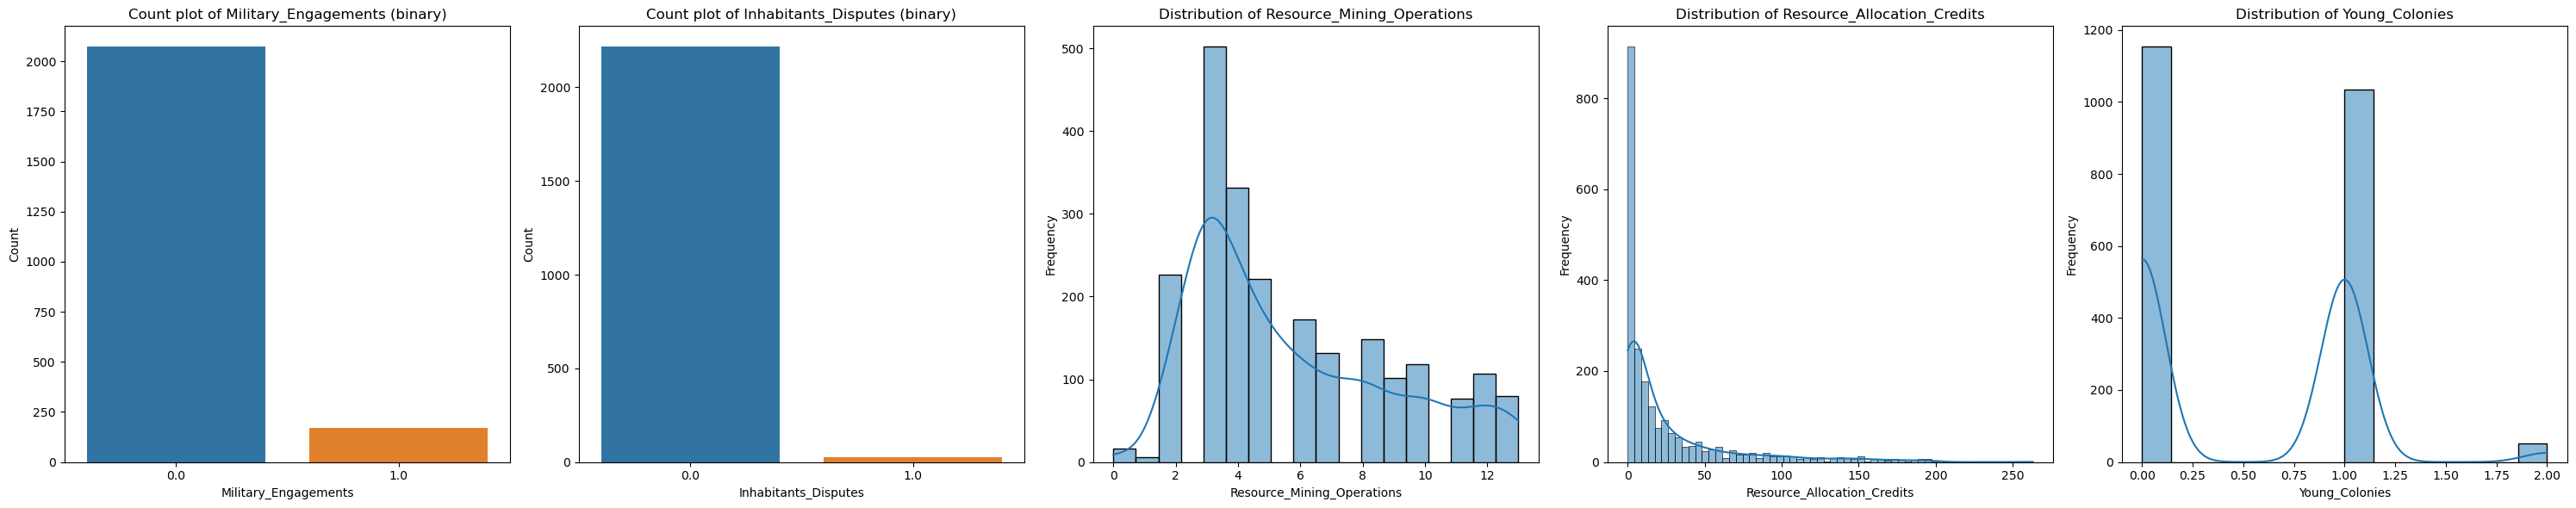

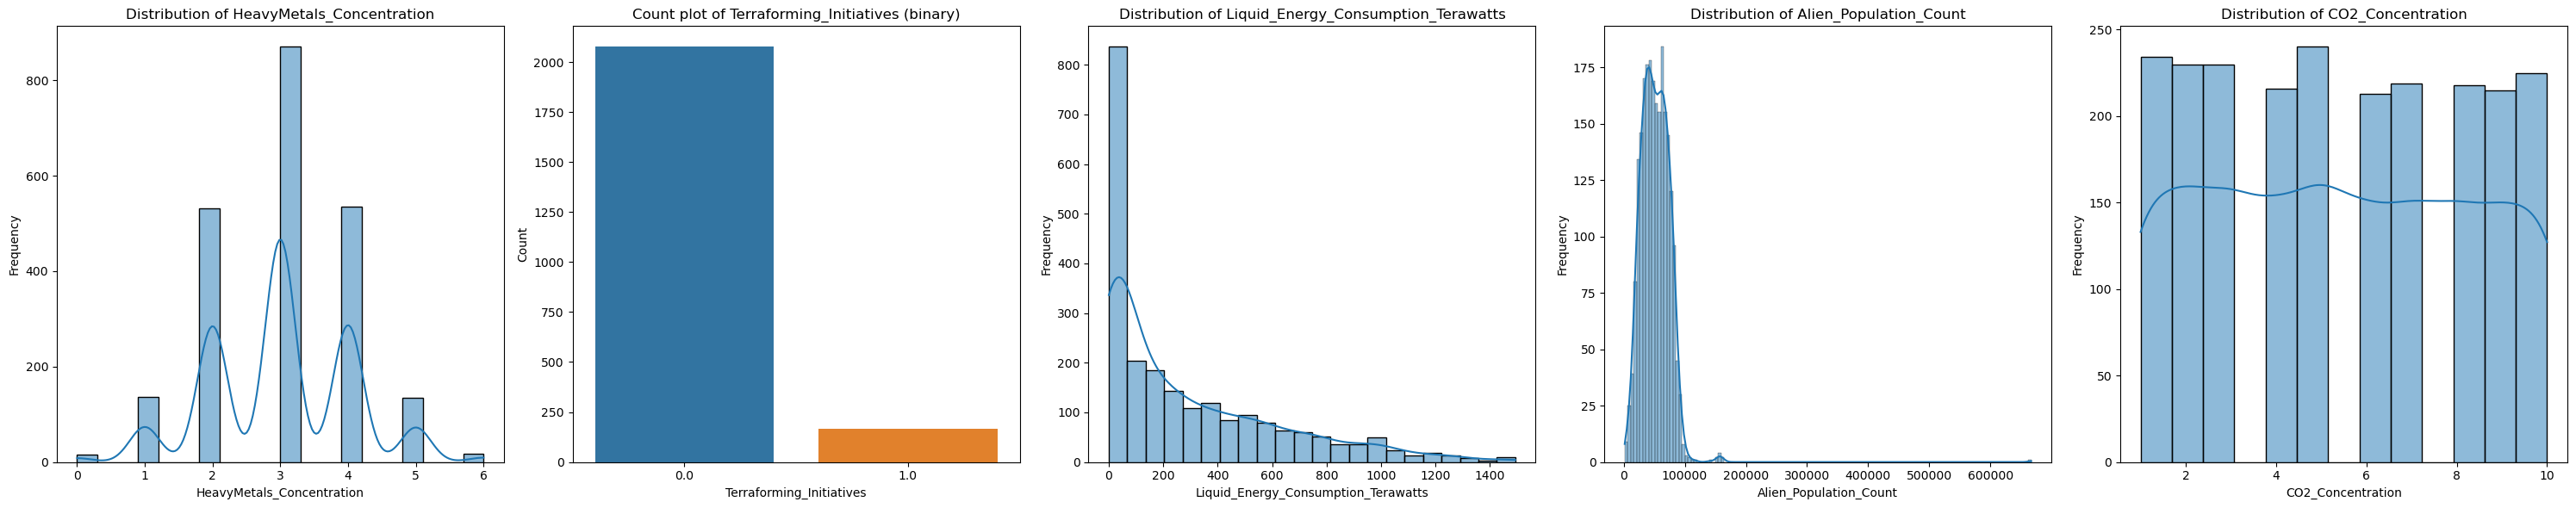

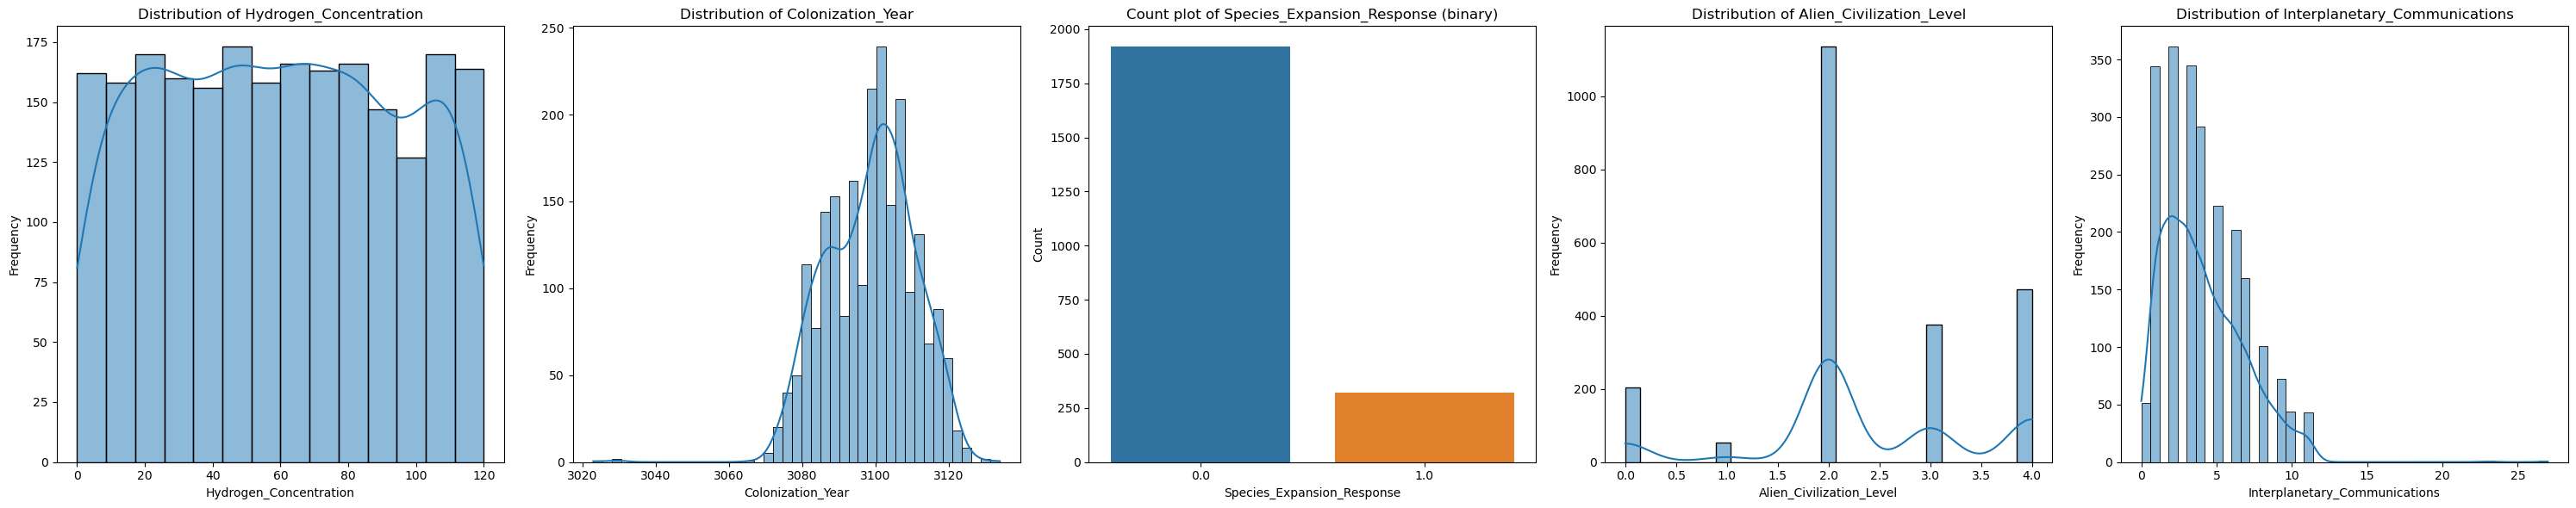

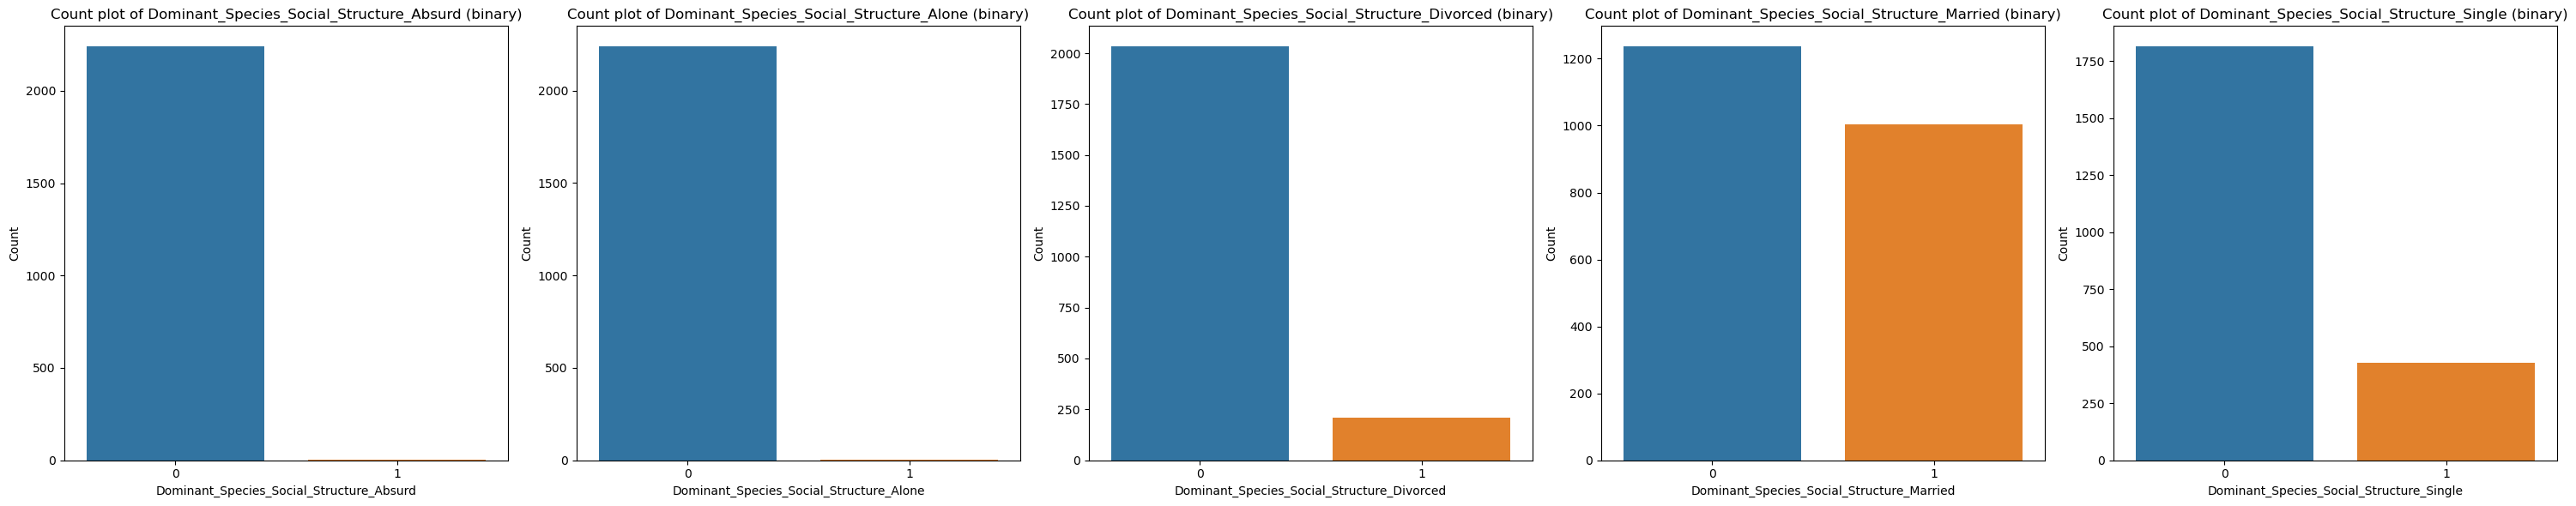

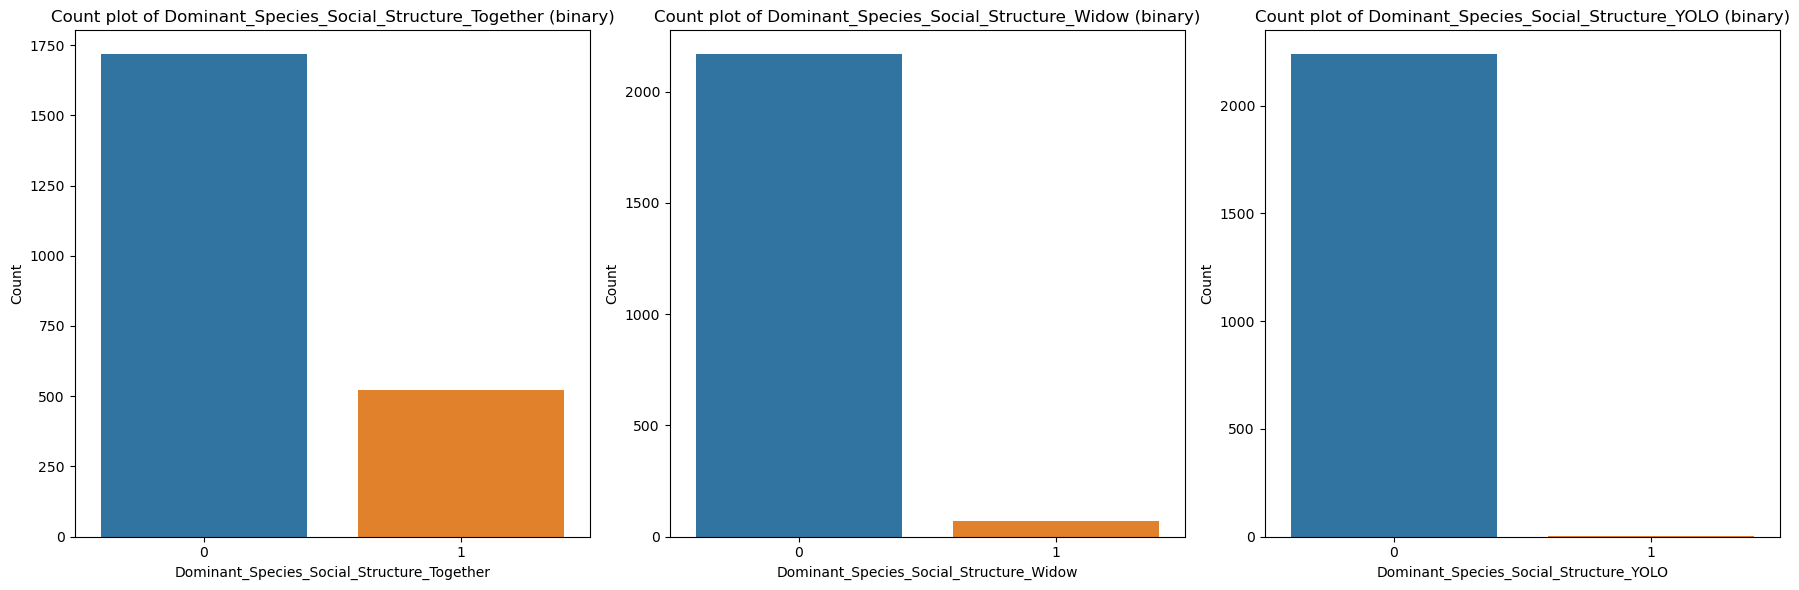

In [24]:
# Plot all variables to get an idea of the different distributions
plots_per_row = 5
columns = df_in_progress.columns
perform_graphical_analysis(plots_per_row, columns, df_in_progress)

### Validating Correlations After Imputation

To ensure the integrity of the data, we will: **Compare Correlation Matrices**:  
   Compare the correlation matrix of the imputed dataset with that of the original dataset (prior to missing values) to identify any significant deviations in variable relationships.

In [25]:
#Calculate the correlations after completing the values
correlation_df1 = high_correlations(df_in_progress)
combined_df = pd.concat([correlation_df, correlation_df1], axis=1)
combined_df.head(10)

Variable 1                           Variable 2  \
0              Mineral_Extraction_Tons                 Exploration_Missions   
1           Resource_Mining_Operations  Liquid_Energy_Consumption_Terawatts   
2                 Exploration_Missions  Liquid_Energy_Consumption_Terawatts   
3                 Food_Production_Tons            Biological_Research_Units   
4            Biological_Research_Units          Resource_Allocation_Credits   
5                 Food_Production_Tons          Resource_Allocation_Credits   
6              Mineral_Extraction_Tons            Biological_Research_Units   
7                 Exploration_Missions               Alien_Population_Count   
8  Liquid_Energy_Consumption_Terawatts        Interplanetary_Communications   
9  Liquid_Energy_Consumption_Terawatts               Alien_Population_Count   

   Correlation                  Variable 1  \
0     0.723468     Mineral_Extraction_Tons   
1     0.639129        Food_Production_Tons   
2     0.615159  Resource_Mining_Operations   
3     0.599803        Exploration_Missions   
4     0.574609        Food_Production_Tons   
5     0.569224                         NaN   
6     0.567399                         NaN   
7     0.564253                         NaN   
8     0.562423                         NaN   
9     0.558047                         NaN   

                            Variable 2  Correlation  
0                 Exploration_Missions     0.595228  
1            Biological_Research_Units     0.533592  
2  Liquid_Energy_Consumption_Terawatts     0.516962  
3  Liquid_Energy_Consumption_Terawatts     0.503538  
4          Resource_Allocation_Credits     0.502446  
5                                  NaN          NaN  
6                                  NaN          NaN  
7                                  NaN          NaN  
8                                  NaN          NaN  
9                                  NaN          NaN

We see that the correlations dropped (significantly), we could have avoided this by using KNN to complete our variables.

---
## Filling up the missing values using KNN

This cell creates a copy of the preprocessed DataFrame df_prep and stores it in a new DataFrame named df_in_progress_2. This allows us to perform further data transformations and analyses on df_in_progress_2 without altering the original df_prep DataFrame, preserving it for reference or re-use if needed. Displaying df_in_progress_2 shows the first few rows of this copied dataset to confirm successful duplication.

In [26]:
df_in_progress_2 = df_prep.copy()
df_in_progress_2

Peace_Treaty_Accords  Technological_Advancements  Ammonia_Concentration  \
0                      0.0                         0.0                    1.0   
1                      0.0                         0.0                    2.0   
2                      NaN                         0.0                    1.0   
3                      0.0                         0.0                    1.0   
4                      0.0                         0.0                    0.0   
...                    ...                         ...                    ...   
2235                   0.0                         0.0                    2.0   
2236                   0.0                         0.0                    2.0   
2237                   0.0                         0.0                    1.0   
2238                   0.0                         0.0                    1.0   
2239                   0.0                         NaN                    0.0   

      Precious_Metal_Trade_Tons  Food_Production_Tons  \
0                          40.0                 107.0   
1                         108.0                  49.0   
2                         161.0                  53.0   
3                         107.0                   NaN   
4                          29.0                  59.0   
...                         ...                   ...   
2235                        7.0                   0.0   
2236                        8.0                   0.0   
2237                        4.0                   4.0   
2238                      149.0                  47.0   
2239                       10.0                   2.0   

      Trade_Agreements_Signed  Last_Contact_Days  Discovery_Date  \
0                         1.0               13.0        1.018263   
1                         1.0                NaN       -0.831594   
2                         NaN               61.0       -0.371167   
3                         3.0                NaN        0.847131   
4                         7.0               24.0       -0.053350   
...                       ...                ...             ...   
2235                      1.0                NaN             NaN   
2236                      2.0               39.0        0.647477   
2237                      2.0                0.0        0.403003   
2238                      1.0               92.0       -0.660461   
2239                      2.0               45.0        1.010114   

      Mineral_Extraction_Tons  Galactic_Visits  ...  Terraforming_Initiatives  \
0                       391.0              3.0  ...                       0.0   
1                         NaN              2.0  ...                       0.0   
2                       363.0              5.0  ...                       0.0   
3                        53.0              7.0  ...                       0.0   
4                       177.0              3.0  ...                       0.0   
...                       ...              ...  ...                       ...   
2235                     14.0              5.0  ...                       0.0   
2236                      NaN              5.0  ...                       0.0   
2237                     61.0              4.0  ...                       NaN   
2238                    197.0              4.0  ...                       0.0   
2239                      NaN              7.0  ...                       0.0   

      Liquid_Energy_Consumption_Terawatts  Alien_Population_Count  \
0                                   647.0                 78285.0   
1                                   581.0                 62772.0   
2                                   726.0                 69016.0   
3                                   314.0                 43795.0   
4                                   290.0                 57957.0   
...                                   ...                     ...   
2235                                  8.0                 35924.0   
2236  

### Pairplot: Exploring Relationships Between Variables

Creating a pairplot for all variables can result in an unreadable and oversized visualization. To address this, we have developed a more targeted approach (currently commented out) to visualize relationships, focusing on highly correlated variables:

### Workflow
1. **Calculate Correlation Matrix**  
   - Compute the absolute correlation matrix for all variables in `df_in_progress_2` to identify the strength of relationships.

2. **Exclude Self-Correlation**  
   - Set the diagonal values (self-correlation, always equal to 1) to `NaN` to prevent them from influencing the selection of highly correlated variables.

3. **Select Highly Correlated Variables**  
   - Identify variables with an absolute correlation greater than `0.5` with at least one other variable (excluding self-correlation). Store these variables in `high_corr_vars`.

4. **Visualize Relationships with Pairplot**  
   - Create a pairplot for all variables in `df_in_progress_2`, with color-coded points based on the categorical variable `Dominant_Species_Social_Structure`.  
   - The pairplot includes scatterplots of variable relationships and histograms along the diagonal to help identify patterns and clusters.

### Purpose
- **Highlighting Correlations**: This visualization helps in identifying significant correlations and potential multicollinearity.  
- **Impact on Imputation**: Understanding correlations is crucial to ensure the integrity of imputation, as relationships between variables in the same row must be preserved.  
- **Clustering Relevance**: For clustering, correlations are less critical, but highly correlated variables might need to be dropped to simplify the model.

This analysis provides a focused overview of relationships between variables, aiding in further data exploration and preparation.

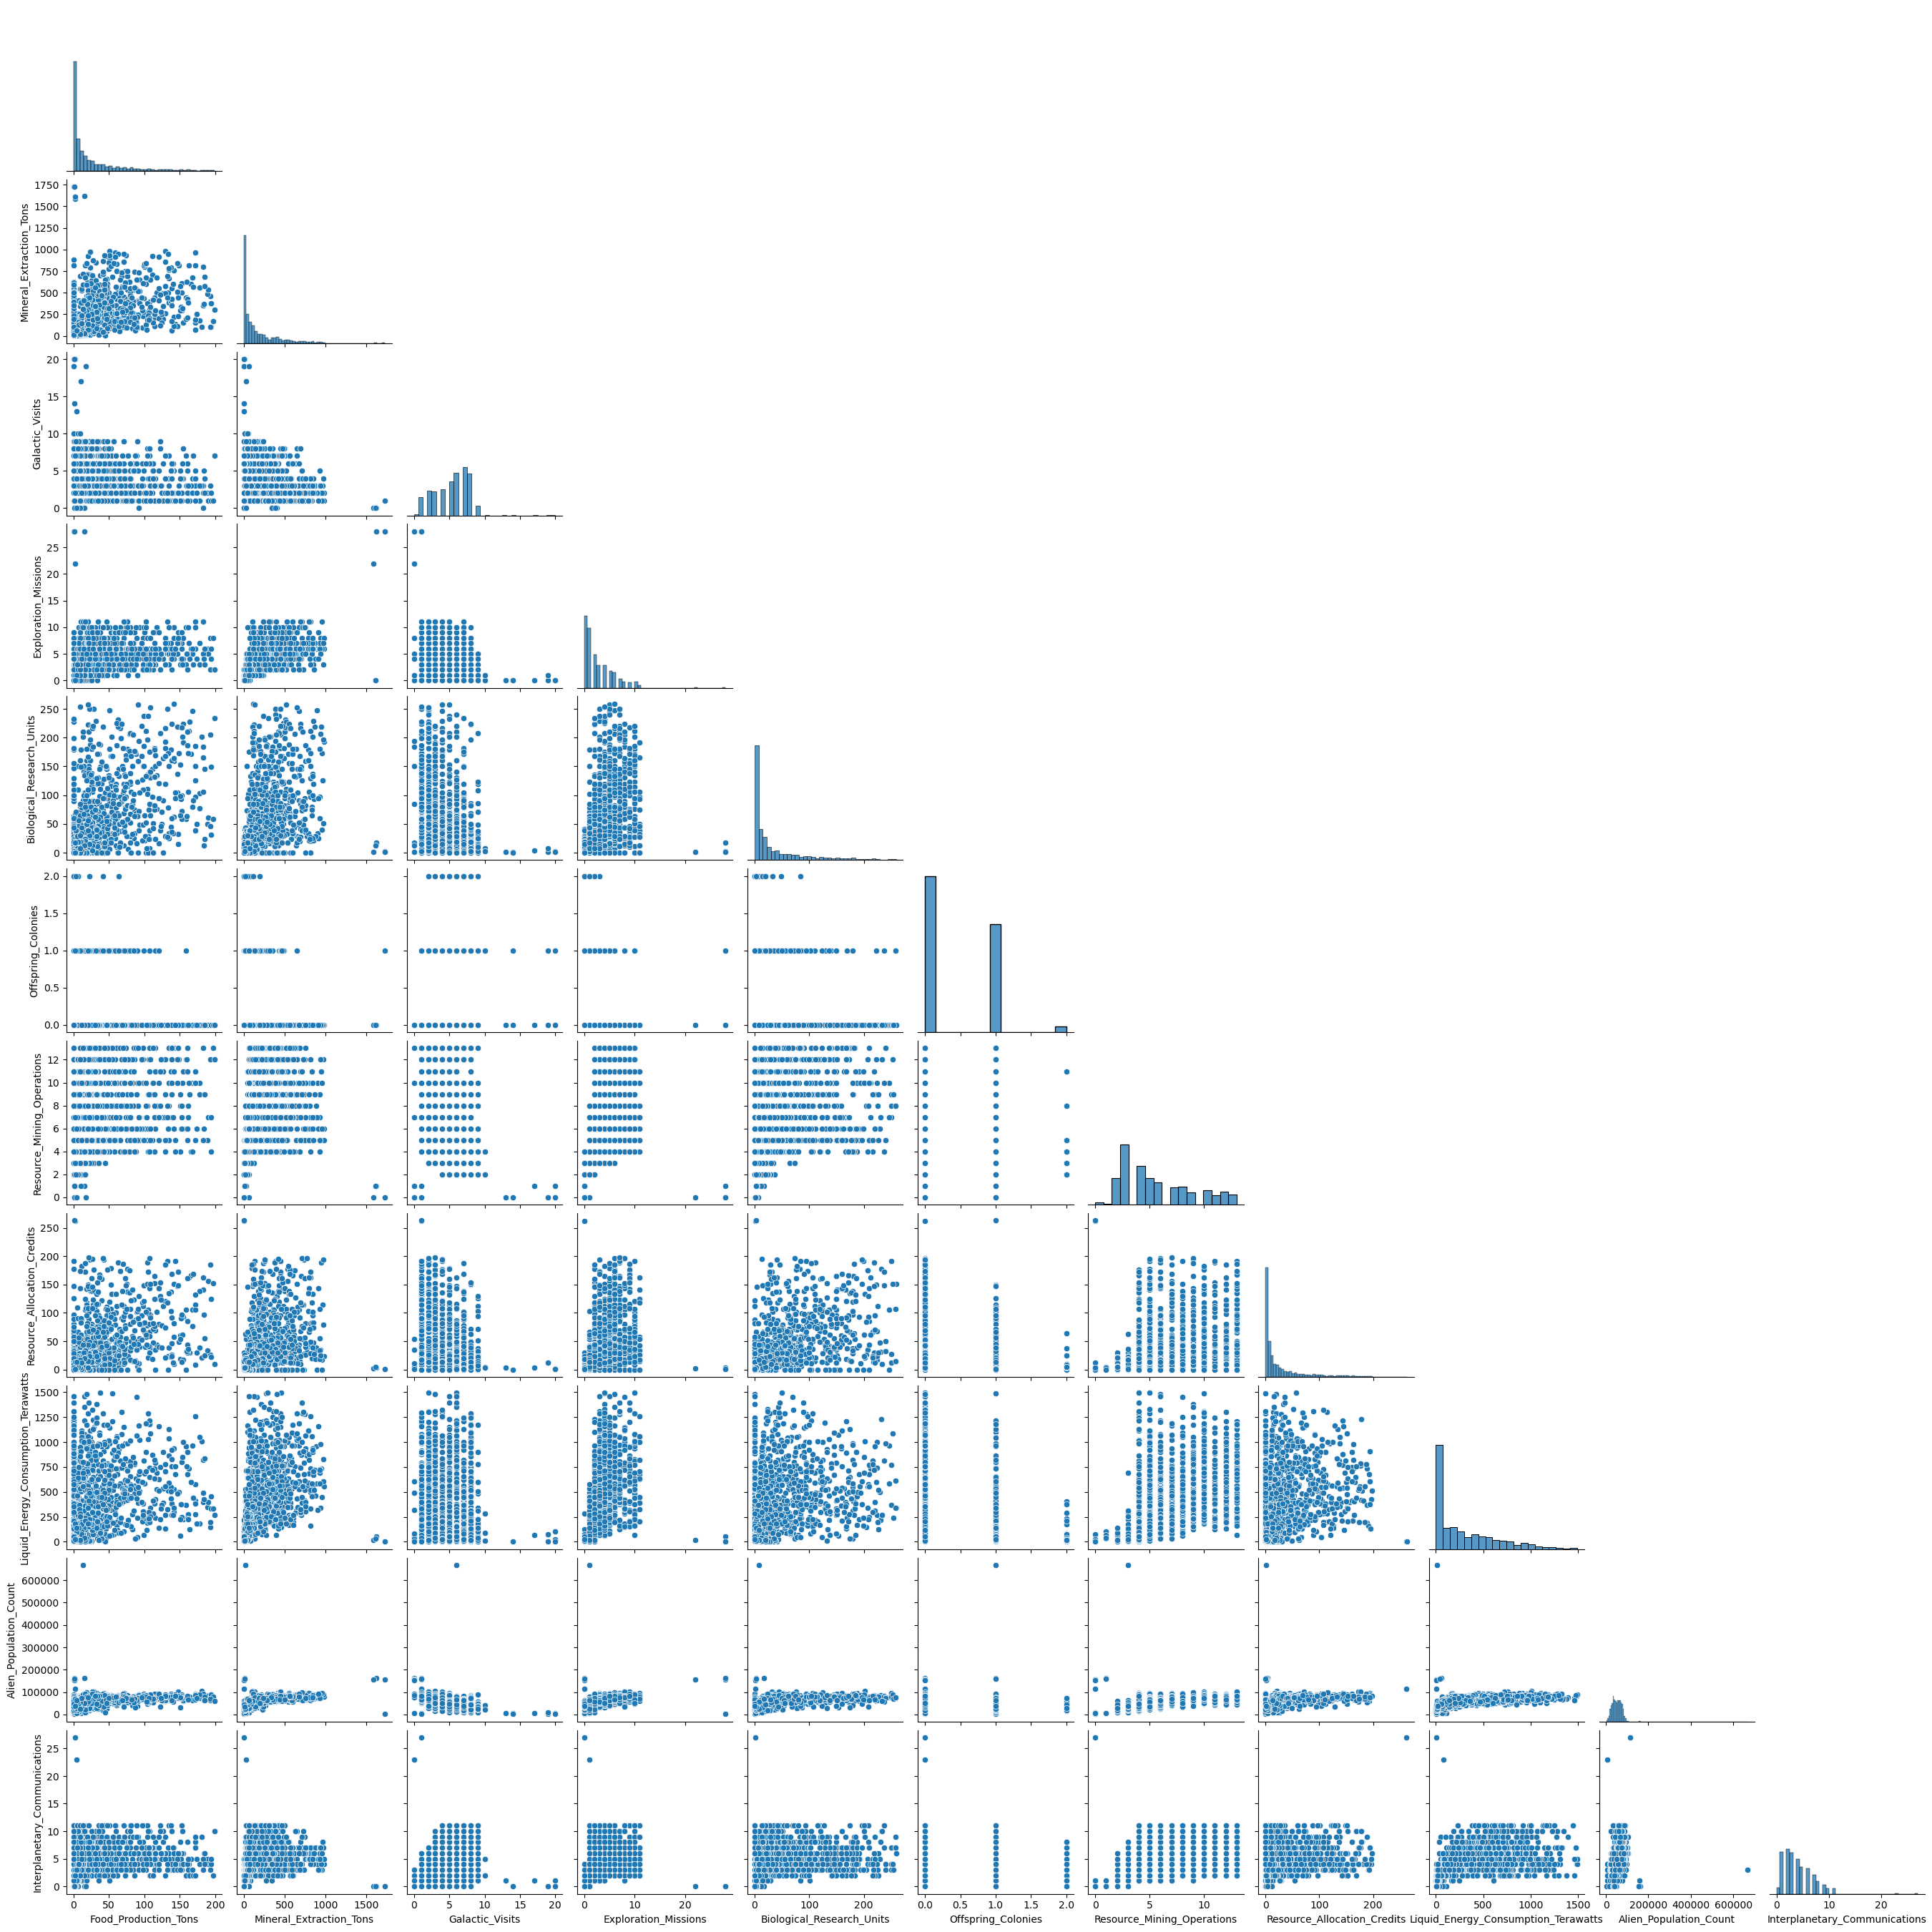

In [27]:
if True:
    # Set the diagonal values to NaN to avoid selecting variables based on self-correlation
    # Select variables with any correlation > 0.5 with another variable (excluding self-correlation)
    numeric_data = df_in_progress_2.select_dtypes(include=['float64', 'int64'])
    correlation_matrix = numeric_data.corr().abs()
    #correlation_matrix = df_in_progress_2.corr().abs()
    np.fill_diagonal(correlation_matrix.values, np.nan)
    high_corr_vars = correlation_matrix.columns[(correlation_matrix > 0.5).any(axis=1)]
    filtered_data = df_in_progress_2[high_corr_vars]

    # Create the pairplot with the filtered variables with high correlations, otherwise the pairplot is too big and unreadable
    sns.pairplot(filtered_data, corner=True)

    # Pair plot of all the variables
    #sns.pairplot(df_in_progress_2, corner=True, hue='Dominant_Species_Social_Structure')
    
    plt.show()


### Categorical Encoding and Missing Value Handling

In this cell, we process categorical encoding and handle missing values for specific columns in `df_in_progress_2`:

##### 1. One-Hot Encoding for Categorical Variables
- **Step 1**: Impute missing values in the `Dominant_Species_Social_Structure` column with a constant placeholder (`'missing'`). This ensures the column has no missing values before one-hot encoding.
- **Step 2**: Apply one-hot encoding to `Dominant_Species_Social_Structure`, generating binary columns for each category.  
   - After encoding, remove the placeholder column (`'Dominant_Species_Social_Structure_missing'`) to avoid redundancy.
   - The resulting columns transform the categorical data into dummy variables suitable for analysis.

##### 2. Convert Ordinal Categories to Numeric Codes
- For the `Alien_Civilization_Level` column:  
  - Convert categorical levels to integer codes using `.cat.codes`, preserving the ordinal nature of the variable.  
  - Missing values are encoded as `-1` by default during this process. Replace these `-1` values with `NaN` to correctly represent missing data.

### Outcome
This cell completes the encoding and imputation process for the selected categorical columns, ensuring:
- **No Missing Values** in `Dominant_Species_Social_Structure`.
- **Numeric Representation** of levels in `Alien_Civilization_Level`.

The processed `df_in_progress_2` is now ready for further analysis or modeling.

In [28]:
#One hot encoding

# Step 1: Impute missing values in the categorical column
categorical_imputer = SimpleImputer(strategy='most_frequent', fill_value='missing')
df_in_progress_2[['Dominant_Species_Social_Structure']] = categorical_imputer.fit_transform(df_in_progress_2[['Dominant_Species_Social_Structure']])
# Step 2: Apply one-hot encoding
df_in_progress_2 = pd.get_dummies(df_in_progress_2, columns=['Dominant_Species_Social_Structure'])

#Categorical to numeral values
df_in_progress_2['Alien_Civilization_Level'] = df_in_progress_2['Alien_Civilization_Level'].astype('category').cat.codes
df_in_progress_2['Alien_Civilization_Level'] = df_in_progress_2['Alien_Civilization_Level'].replace(-1, np.nan)

df_in_progress_2.sample(5)

Peace_Treaty_Accords  Technological_Advancements  Ammonia_Concentration  \
1726                   0.0                         0.0                    2.0   
51                     0.0                         0.0                    NaN   
870                    0.0                         NaN                    1.0   
450                    0.0                         NaN                    2.0   
1100                   0.0                         0.0                    0.0   

      Precious_Metal_Trade_Tons  Food_Production_Tons  \
1726                        NaN                   2.0   
51                         28.0                  28.0   
870                        17.0                   4.0   
450                        99.0                  28.0   
1100                       39.0                   NaN   

      Trade_Agreements_Signed  Last_Contact_Days  Discovery_Date  \
1726                      2.0                1.0             NaN   
51                        1.0               75.0       -0.037052   
870                       2.0               27.0             NaN   
450                       3.0               83.0       -1.006800   
1100                      NaN               30.0       -1.035322   

      Mineral_Extraction_Tons  Galactic_Visits  ...  Alien_Civilization_Level  \
1726                     12.0              6.0  ...                       0.0   
51                      674.0              1.0  ...                       4.0   
870                      13.0              NaN  ...                       0.0   
450                     135.0              5.0  ...                       NaN   
1100                    137.0              7.0  ...                       2.0   

      Interplanetary_Communications  Dominant_Species_Social_Structure_Absurd  \
1726                            1.0                                         0   
51                              3.0                                         0   
870                             2.0                                         0   
450                             NaN                                         0   
1100                            NaN                                         0   

      Dominant_Species_Social_Structure_Alone  \
1726                                        0   
51                                          0   
870                                         0   
450                                         0   
1100                                        0   

      Dominant_Species_Social_Structure_Divorced  \
1726                                           1   
51                                             0   
870                                            0   
450                                            0   
1100                                           0   

      Dominant_Species_Social_Structure_Married  \
1726                                          0   
51                                            0   
870                                           1   
450                                           0   
1100                                          1   

      Dominant_Species_Social_Structure_Single  \
1726                                         0   
51                                           1   
870                                          0   
450                                          0   
1100                                         0   

      Dominant_Species_Social_Structure_Together  \
1726                                           0   
51                                             0   
870                                            0   
450                                            1   
1100                                           0   

      Dominant_Species_Social_Structure_Widow  \
1726                                        0   
51                                          0   
870                                         0   
450                                         0   
1100               

### Data Scaling, Imputation, and Post-Processing

1. **Data Scaling**: Standardize `df_in_progress_2` using `StandardScaler` for consistency during imputation.  
2. **KNN Imputation**: Apply `KNNImputer` (with 5 neighbors) on the scaled data to handle missing values.  
3. **Revert Scaling**: Transform the imputed scaled data back to its original scale.  
4. **Preserve Integer Columns**: Ensure specific numerical columns are rounded to integers post-imputation.  

This process ensures consistent handling of missing values while preserving data integrity for further analysis.  
**Source**: *'KNN imputer and how to choose regression techniques' lab*

In [29]:
# 1. Scale the data
scaler = StandardScaler()
df_in_progress_2_scaled = pd.DataFrame(scaler.fit_transform(df_in_progress_2), columns=df_in_progress_2.columns)

# 2. Apply KNN Imputer on scaled data
imputer = KNNImputer(n_neighbors=5)
alien_data_imputed_scaled = pd.DataFrame(imputer.fit_transform(df_in_progress_2_scaled), columns=df_in_progress_2.columns)

# 3. Transform back to original values
df_in_progress_2 = pd.DataFrame(scaler.inverse_transform(alien_data_imputed_scaled), columns=df_in_progress_2.columns)

# 4. Ensure integer columns remain integers after imputation
numerical_columns = [
    'Peace_Treaty_Accords', 'Technological_Advancements', 'Ammonia_Concentration',  'Precious_Metal_Trade_Tons', 'Food_Production_Tons',
    'Trade_Agreements_Signed', 'Last_Contact_Days', 'Mineral_Extraction_Tons',  'Galactic_Visits', 'Sulfur_Concentration',
    'Exploration_Missions', 'Biological_Research_Units', 'Offspring_Colonies', 'Cultural_Exchange_Programs', 'Military_Engagements',
    'Inhabitants_Disputes', 'Resource_Mining_Operations', 'Resource_Allocation_Credits', 'Young_Colonies', 'HeavyMetals_Concentration',
    'Terraforming_Initiatives', 'Liquid_Energy_Consumption_Terawatts', 'Alien_Population_Count', 'CO2_Concentration', 
    'Colonization_Year', 'Species_Expansion_Response', 'Interplanetary_Communications', 'Alien_Civilization_Level'
]
for column in numerical_columns:
    # Convert columns that are conceptually integers to int
    df_in_progress_2[column] = df_in_progress_2[column].round()  

df_in_progress_2.isna().sum()
df_in_progress_2

# Source code: 'KNN imputer and how to choose regression techniques' lab

Peace_Treaty_Accords  Technological_Advancements  Ammonia_Concentration  \
0                      0.0                         0.0                    1.0   
1                      0.0                         0.0                    2.0   
2                      0.0                         0.0                    1.0   
3                      0.0                         0.0                    1.0   
4                      0.0                         0.0                    0.0   
...                    ...                         ...                    ...   
2235                   0.0                         0.0                    2.0   
2236                   0.0                         0.0                    2.0   
2237                   0.0                         0.0                    1.0   
2238                   0.0                         0.0                    1.0   
2239                   0.0                         0.0                    0.0   

      Precious_Metal_Trade_Tons  Food_Production_Tons  \
0                          40.0                 107.0   
1                         108.0                  49.0   
2                         161.0                  53.0   
3                         107.0                   7.0   
4                          29.0                  59.0   
...                         ...                   ...   
2235                        7.0                   0.0   
2236                        8.0                   0.0   
2237                        4.0                   4.0   
2238                      149.0                  47.0   
2239                       10.0                   2.0   

      Trade_Agreements_Signed  Last_Contact_Days  Discovery_Date  \
0                         1.0               13.0        1.018263   
1                         1.0               26.0       -0.831594   
2                         3.0               61.0       -0.371167   
3                         3.0               36.0        0.847131   
4                         7.0               24.0       -0.053350   
...                       ...                ...             ...   
2235                      1.0               60.0        0.220462   
2236                      2.0               39.0        0.647477   
2237                      2.0                0.0        0.403003   
2238                      1.0               92.0       -0.660461   
2239                      2.0               45.0        1.010114   

      Mineral_Extraction_Tons  Galactic_Visits  ...  Alien_Civilization_Level  \
0                       391.0              3.0  ...                       3.0   
1                       358.0              2.0  ...                       3.0   
2                       363.0              5.0  ...                       2.0   
3                        53.0              7.0  ...                       3.0   
4                       177.0              3.0  ...                       2.0   
...                       ...              ...  ...                       ...   
2235                     14.0              5.0  ...                       3.0   
2236                     16.0              5.0  ...                       4.0   
2237                     61.0              4.0  ...                       3.0   
2238                    197.0              4.0  ...                       2.0   
2239                     12.0              7.0  ...                       2.0   

      Interplanetary_Communications  Dominant_Species_Social_Structure_Absurd  \
0                               6.0                                       0.0   
1                               5.0                                       0.0   
2                               8.0                                       0.0   
3                               7.0                                       0.0   
4                               4.0                                       0.0   
...                             ...                                     

### Removing Outliers

In this cell, we remove outliers from the dataset using the following approach:

- **Range Multiplier**: Set to `3`, resulting in approximately 10% of the dataset being removed.  
- **Handling Binary Variables**: For variables with an interquartile range (IQR) of `0` (common in binary variables with many `0` entries), nearly 70% of the dataset was erroneously flagged for removal due to `0 * 3 = 0`.  
   - To address this, we exclude variables with an IQR of `0` from the outlier calculation.

This ensures a more balanced and meaningful removal of outliers without disproportionately affecting binary variables.

In [30]:
Q1 = df_in_progress_2.quantile(0.25)
Q3 = df_in_progress_2.quantile(0.75)
IQR = Q3 - Q1

IQR[IQR == 0] = np.nan  # Set IQR to NaN for columns with IQR = 0

# Define range multiplier
range_multiplier = 3
# Filter out outliers while ignoring columns with NaN IQR
df_no_outliers = df_in_progress_2[
    ~(
        ((df_in_progress_2 < (Q1 - range_multiplier * IQR)) | 
         (df_in_progress_2 > (Q3 + range_multiplier * IQR)))
        .any(axis=1)
    )
]

# Calculate the number of outliers removed
outliers_removed = len(df_in_progress_2) - len(df_no_outliers)
total_rows = len(df_in_progress_2)
outliers_percentage = (outliers_removed / total_rows) * 100

print(f"Removed {outliers_removed} entries, {outliers_percentage:.2f}% of the dataset")
df_in_progress_2 = df_no_outliers.copy()
df_in_progress_2

Removed 259 entries, 11.56% of the dataset


Peace_Treaty_Accords  Technological_Advancements  Ammonia_Concentration  \
0                      0.0                         0.0                    1.0   
1                      0.0                         0.0                    2.0   
2                      0.0                         0.0                    1.0   
3                      0.0                         0.0                    1.0   
4                      0.0                         0.0                    0.0   
...                    ...                         ...                    ...   
2235                   0.0                         0.0                    2.0   
2236                   0.0                         0.0                    2.0   
2237                   0.0                         0.0                    1.0   
2238                   0.0                         0.0                    1.0   
2239                   0.0                         0.0                    0.0   

      Precious_Metal_Trade_Tons  Food_Production_Tons  \
0                          40.0                 107.0   
1                         108.0                  49.0   
2                         161.0                  53.0   
3                         107.0                   7.0   
4                          29.0                  59.0   
...                         ...                   ...   
2235                        7.0                   0.0   
2236                        8.0                   0.0   
2237                        4.0                   4.0   
2238                      149.0                  47.0   
2239                       10.0                   2.0   

      Trade_Agreements_Signed  Last_Contact_Days  Discovery_Date  \
0                         1.0               13.0        1.018263   
1                         1.0               26.0       -0.831594   
2                         3.0               61.0       -0.371167   
3                         3.0               36.0        0.847131   
4                         7.0               24.0       -0.053350   
...                       ...                ...             ...   
2235                      1.0               60.0        0.220462   
2236                      2.0               39.0        0.647477   
2237                      2.0                0.0        0.403003   
2238                      1.0               92.0       -0.660461   
2239                      2.0               45.0        1.010114   

      Mineral_Extraction_Tons  Galactic_Visits  ...  Alien_Civilization_Level  \
0                       391.0              3.0  ...                       3.0   
1                       358.0              2.0  ...                       3.0   
2                       363.0              5.0  ...                       2.0   
3                        53.0              7.0  ...                       3.0   
4                       177.0              3.0  ...                       2.0   
...                       ...              ...  ...                       ...   
2235                     14.0              5.0  ...                       3.0   
2236                     16.0              5.0  ...                       4.0   
2237                     61.0              4.0  ...                       3.0   
2238                    197.0              4.0  ...                       2.0   
2239                     12.0              7.0  ...                       2.0   

      Interplanetary_Communications  Dominant_Species_Social_Structure_Absurd  \
0                               6.0                                       0.0   
1                               5.0                                       0.0   
2                               8.0                                       0.0   
3                               7.0                                       0.0   
4                               4.0                                       0.0   
...                             ...                                     

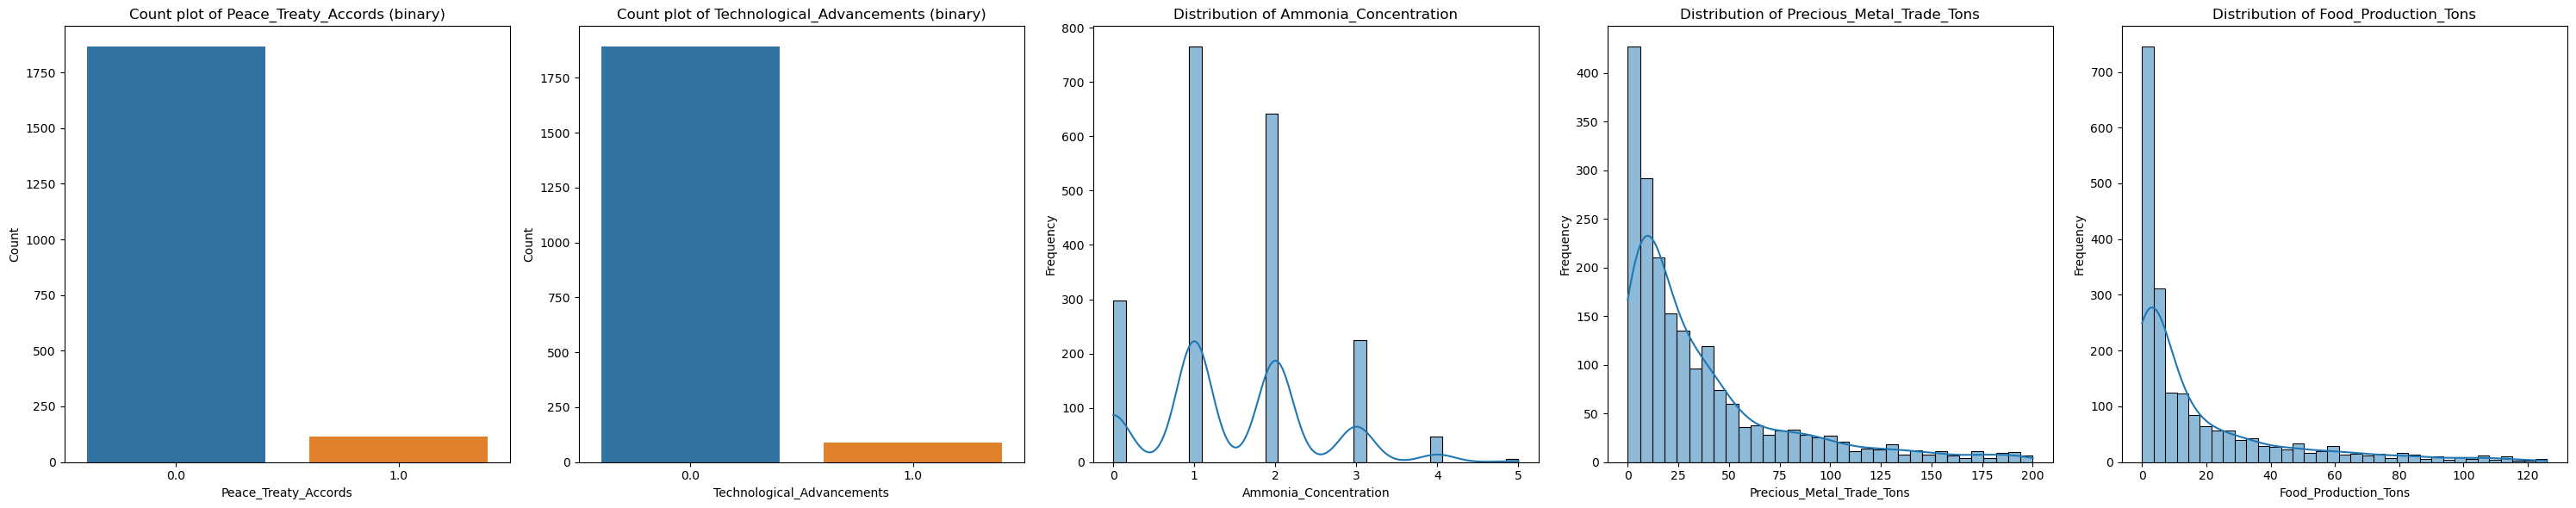

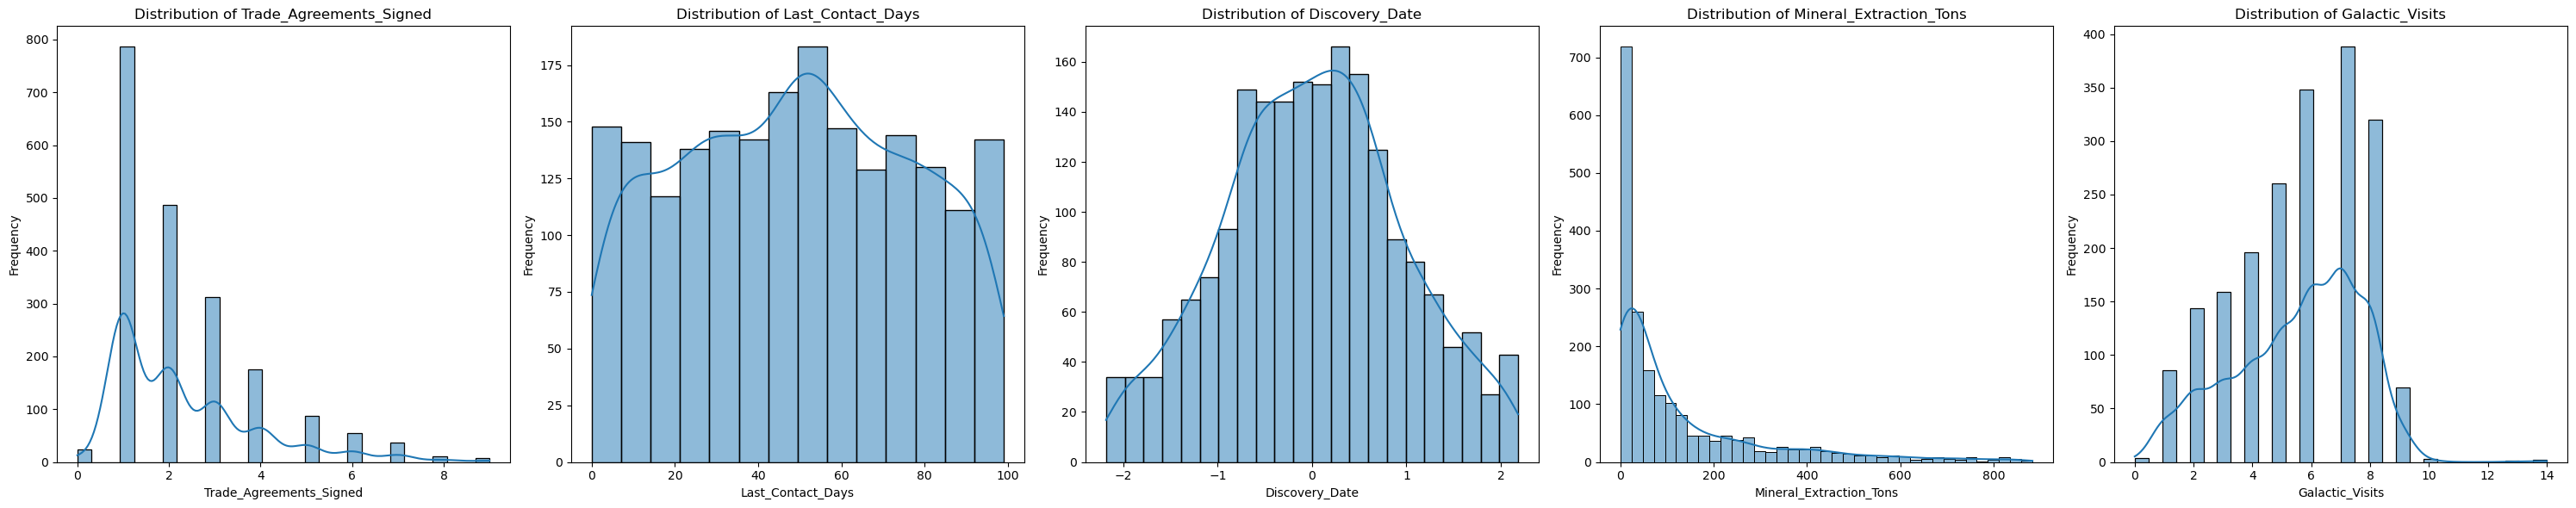

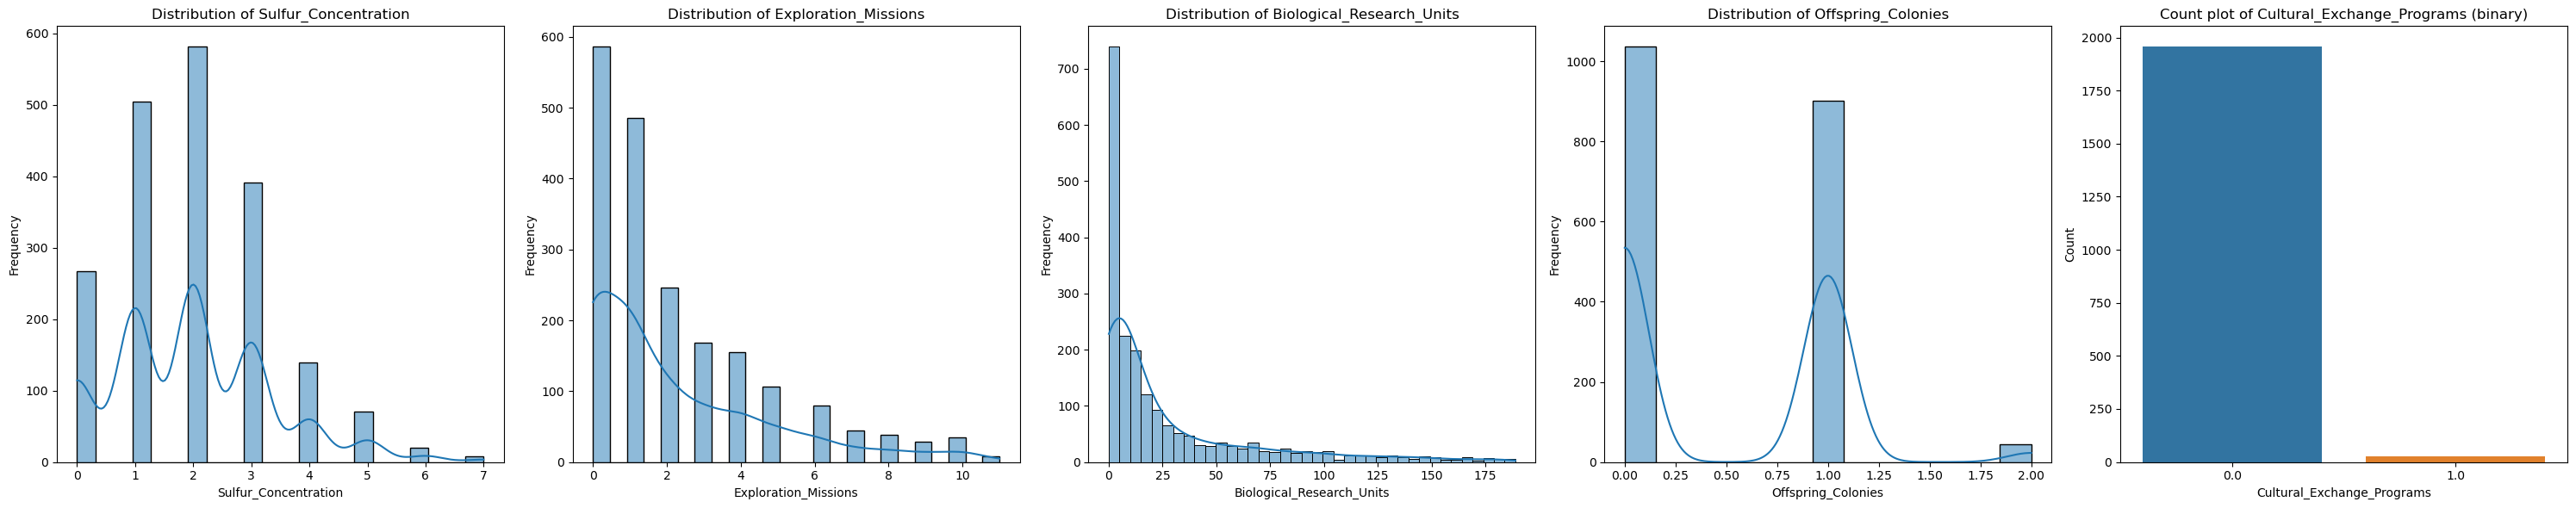

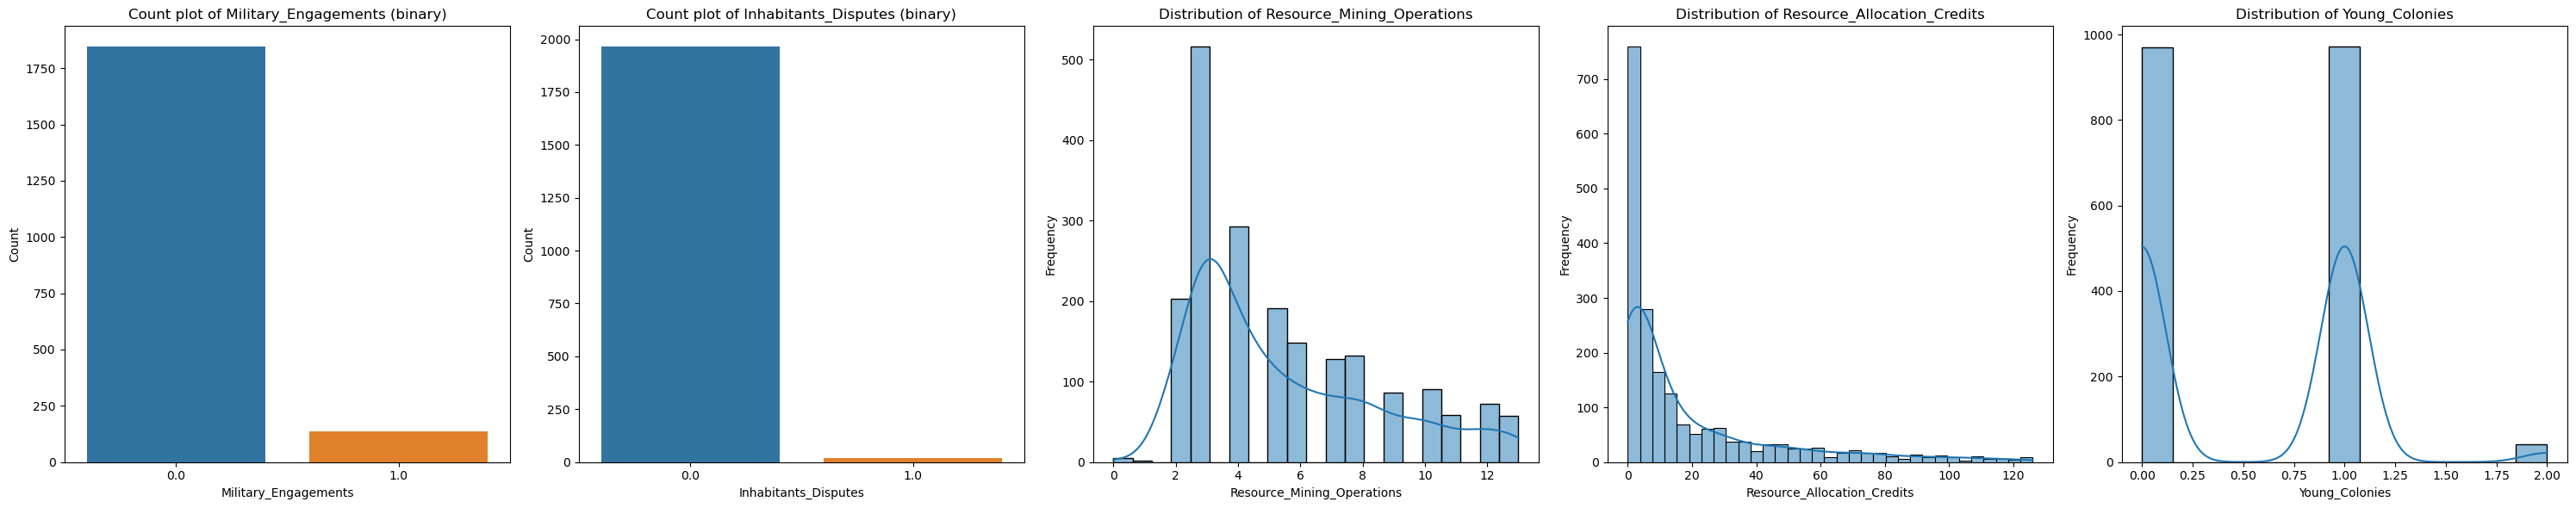

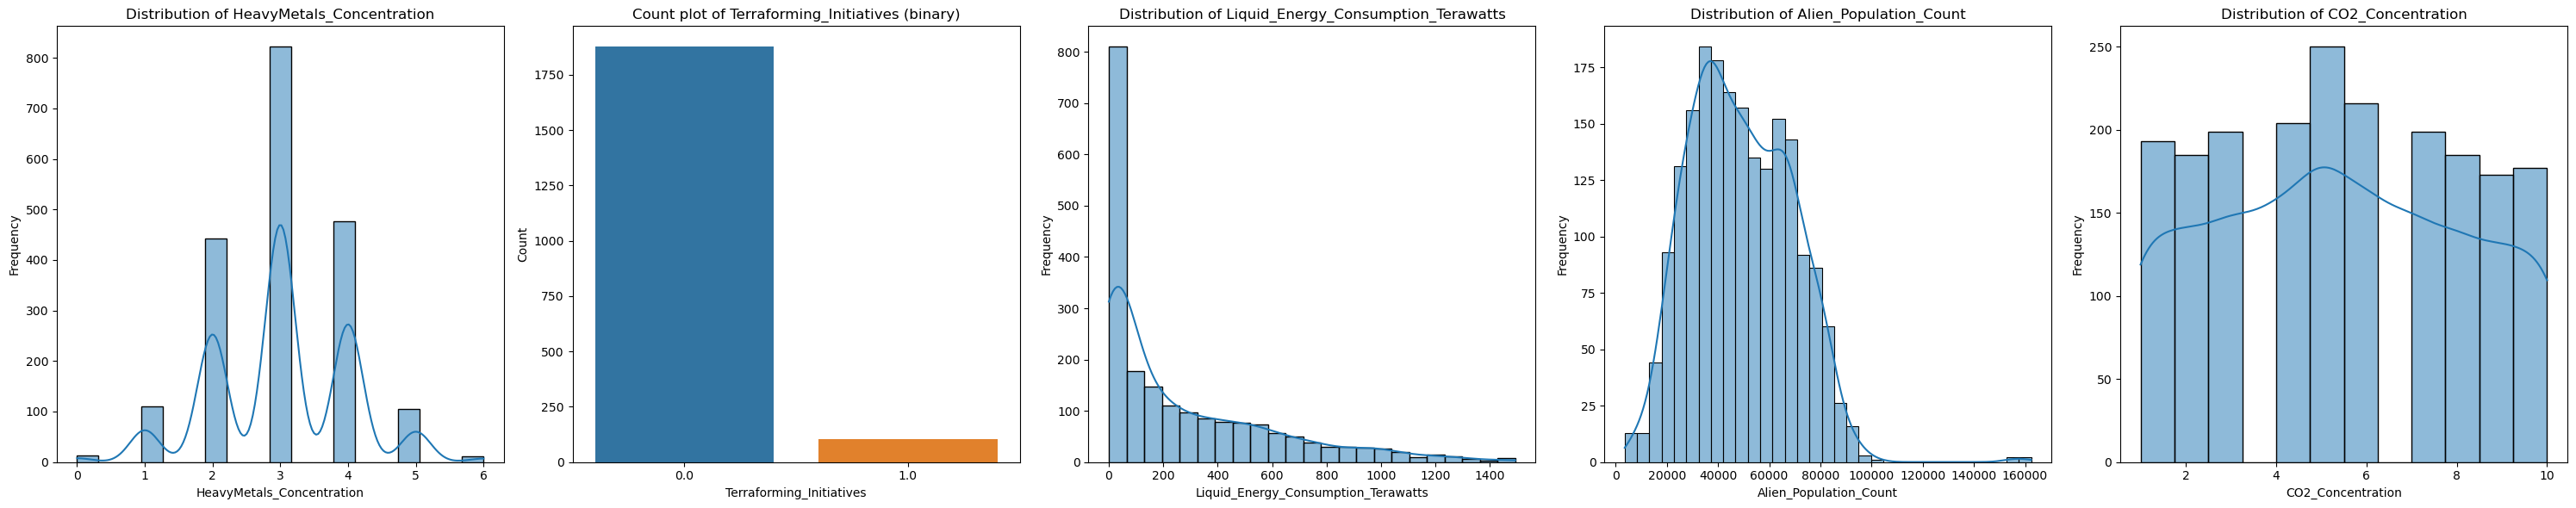

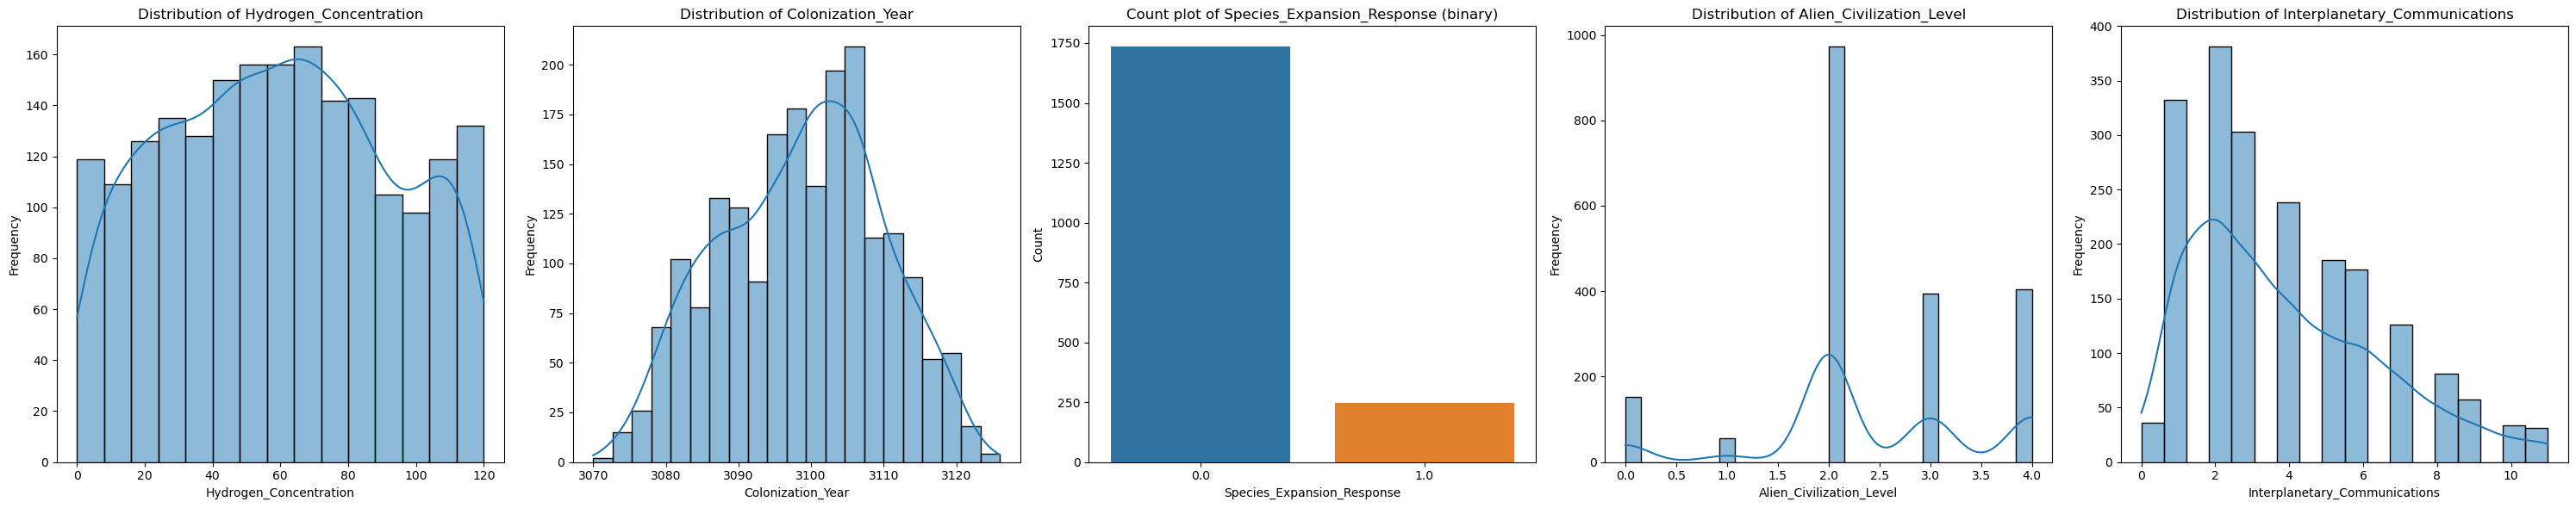

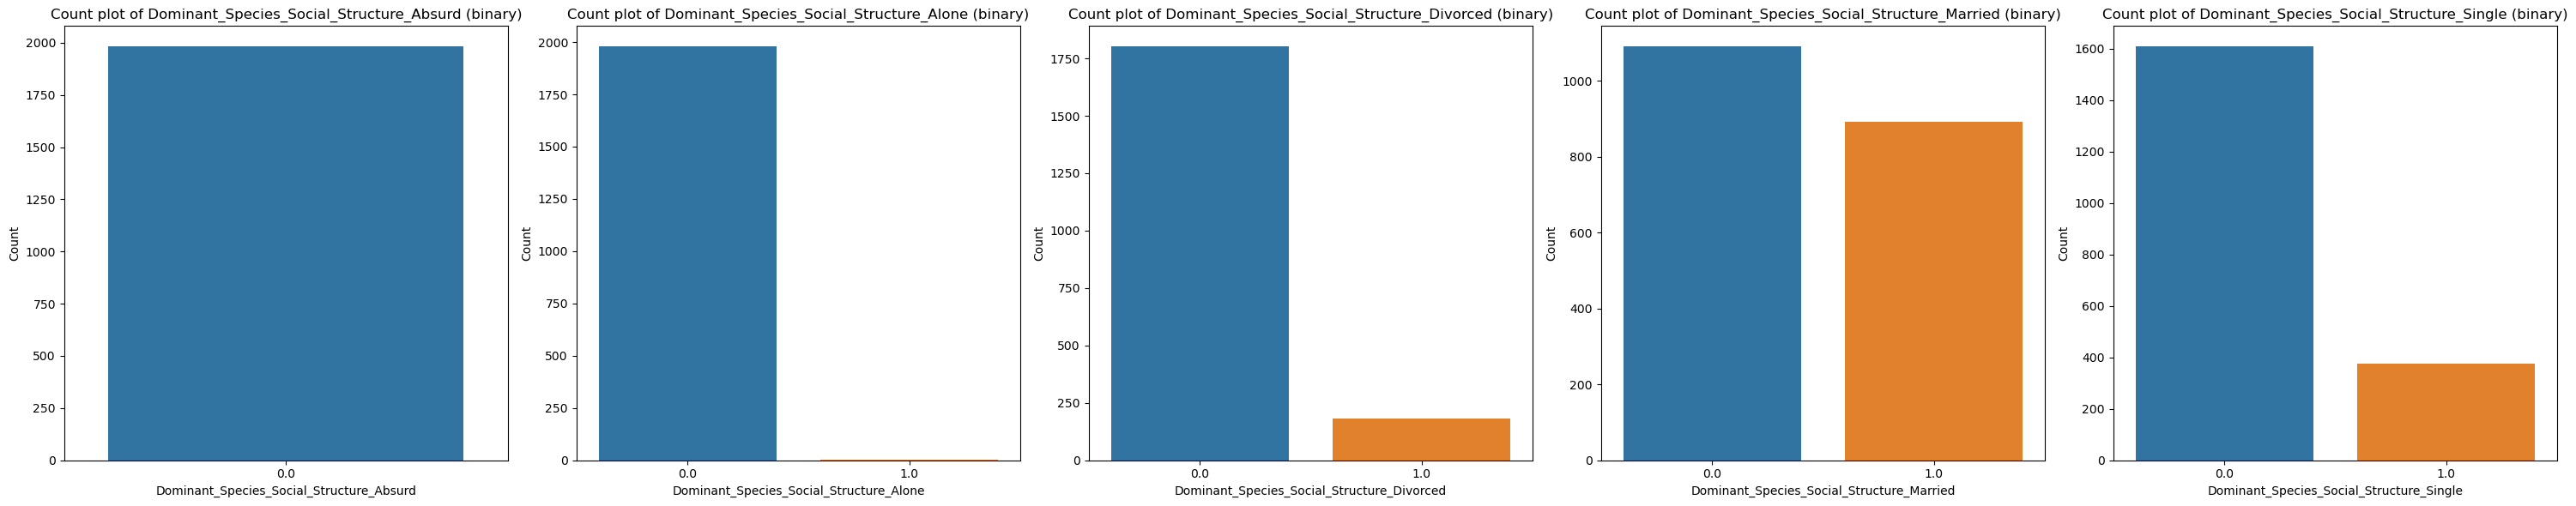

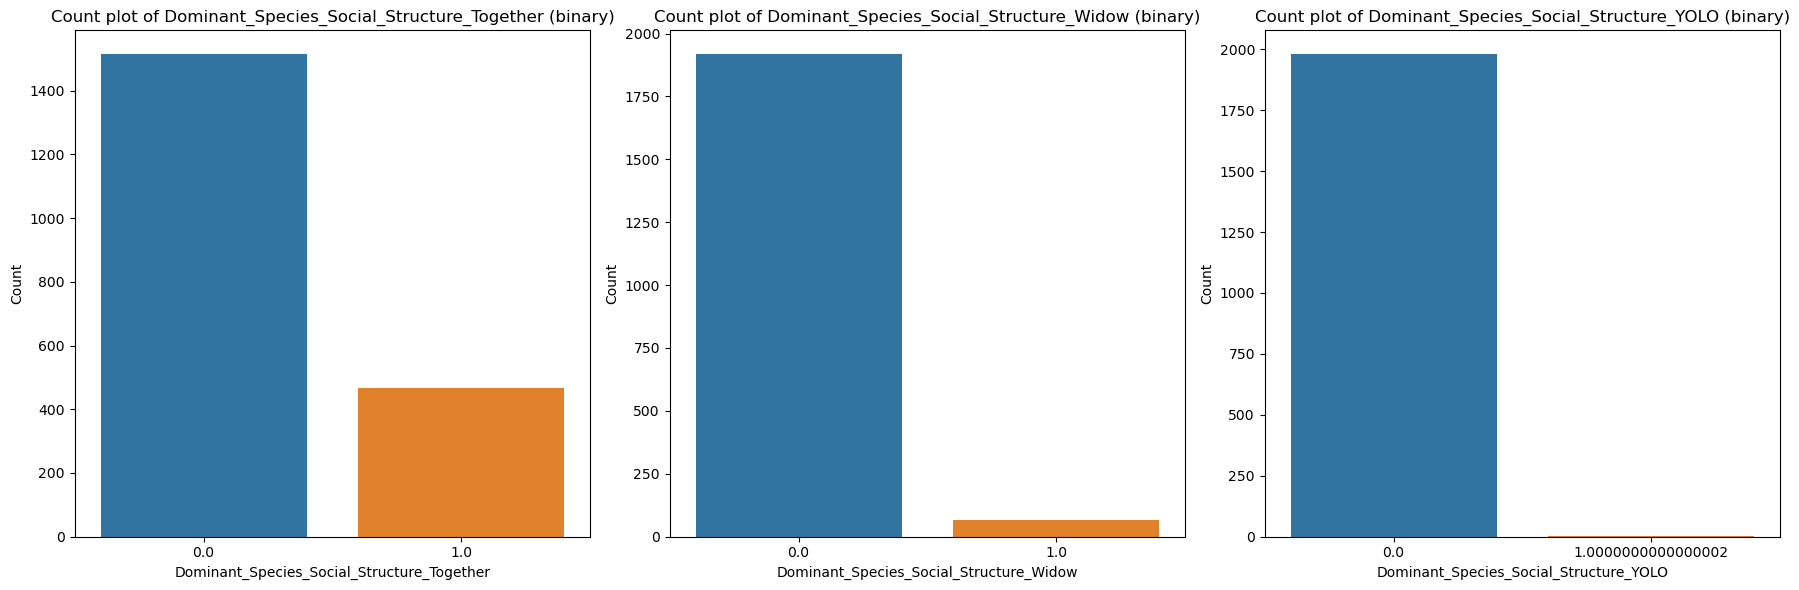

In [31]:
# Plot all variables to get an idea of the different distributions
plots_per_row = 5
columns = df_in_progress_2.columns
perform_graphical_analysis(plots_per_row, columns, df_in_progress_2)

### Removing Near-Constant Binary Variables

As observed in the distributions, certain binary variables have an overwhelming majority of `0` values. These variables exhibit behavior similar to constant variables and provide minimal variability or information. 

To simplify the dataset and improve analysis, we will remove these near-constant variables.

In [32]:
df_in_progress_2 = df_in_progress_2.drop(['Dominant_Species_Social_Structure_YOLO', 'Dominant_Species_Social_Structure_Alone', 'Dominant_Species_Social_Structure_Absurd'], axis=1)

### Comparing Correlation Preservation

We now compare whether the correlations are better preserved using the KNN imputer compared to padding missing values with distributions. 

**Observation**: The correlations are better preserved with the KNN imputer.  

We will proceed with this dataset for further analysis and retain it for eventual comparisons with alternative methods.

In [33]:
#Calculate the correlations after completing the values
correlation_df2 = high_correlations(df_in_progress_2)
combined_df = pd.concat([correlation_df, correlation_df2], axis=1)
combined_df.head(10)

Variable 1                           Variable 2  \
0              Mineral_Extraction_Tons                 Exploration_Missions   
1           Resource_Mining_Operations  Liquid_Energy_Consumption_Terawatts   
2                 Exploration_Missions  Liquid_Energy_Consumption_Terawatts   
3                 Food_Production_Tons            Biological_Research_Units   
4            Biological_Research_Units          Resource_Allocation_Credits   
5                 Food_Production_Tons          Resource_Allocation_Credits   
6              Mineral_Extraction_Tons            Biological_Research_Units   
7                 Exploration_Missions               Alien_Population_Count   
8  Liquid_Energy_Consumption_Terawatts        Interplanetary_Communications   
9  Liquid_Energy_Consumption_Terawatts               Alien_Population_Count   

   Correlation                           Variable 1  \
0     0.723468              Mineral_Extraction_Tons   
1     0.639129  Liquid_Energy_Consumption_Terawatts   
2     0.615159                 Exploration_Missions   
3     0.599803              Mineral_Extraction_Tons   
4     0.574609                 Exploration_Missions   
5     0.569224           Resource_Mining_Operations   
6     0.567399           Resource_Mining_Operations   
7     0.564253                 Food_Production_Tons   
8     0.562423              Mineral_Extraction_Tons   
9     0.558047            Biological_Research_Units   

                            Variable 2  Correlation  
0                 Exploration_Missions     0.723943  
1               Alien_Population_Count     0.712007  
2  Liquid_Energy_Consumption_Terawatts     0.710564  
3               Alien_Population_Count     0.691397  
4               Alien_Population_Count     0.689761  
5  Liquid_Energy_Consumption_Terawatts     0.667339  
6               Alien_Population_Count     0.658220  
7          Resource_Allocation_Credits     0.646107  
8  Liquid_Energy_Consumption_Terawatts     0.641500  
9          Resource_Allocation_Credits     0.640250

Make a copy of the imputed dataset for the other clustering methods.

In [34]:
df_in_progress_3 = df_in_progress_2.copy()
df_in_progress_4 = df_in_progress_2.copy()

---
## Hierarchical clustering

This cell standardizes all numerical columns, including one-hot encoded variables, to ensure consistency in scale across the dataset:

In [35]:
# Define the numerical columns to scale (including already one-hot encoded columns)
numerical_cols = df_in_progress_2.columns

# Fit and transform the data
preprocessor_standard = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_cols)])
data_preprocessed_standard = preprocessor_standard.fit_transform(df_in_progress_2)

# Convert the transformed data into a DataFrame and assign the column names
data_preprocessed_standard_df = pd.DataFrame(data_preprocessed_standard, columns=numerical_cols)
data_preprocessed_standard_df.sample(5)

Peace_Treaty_Accords  Technological_Advancements  Ammonia_Concentration  \
1735             -0.249396                    -0.21816               0.528591   
1384             -0.249396                    -0.21816               0.528591   
582              -0.249396                    -0.21816              -0.495006   
691              -0.249396                    -0.21816               0.528591   
1169             -0.249396                    -0.21816               0.528591   

      Precious_Metal_Trade_Tons  Food_Production_Tons  \
1735                  -0.395566             -0.466204   
1384                  -0.468260             -0.034785   
582                    0.089060              2.553726   
691                   -0.565186             -0.623083   
1169                   1.349089              2.906705   

      Trade_Agreements_Signed  Last_Contact_Days  Discovery_Date  \
1735                -0.194168          -0.104996        0.340528   
1384                 2.943244          -0.752626       -1.800324   
582                 -0.821650           1.693977       -1.270452   
691                 -0.194168           0.398716       -0.484192   
1169                -0.821650           1.550059        0.725112   

      Mineral_Extraction_Tons  Galactic_Visits  ...  Hydrogen_Concentration  \
1735                -0.668938         0.207541  ...               -1.406591   
1384                 0.602481         0.671580  ...               -0.869636   
582                  4.046144        -1.648615  ...                0.431156   
691                 -0.686042         0.671580  ...                0.462012   
1169                 3.464599        -2.112654  ...               -0.516305   

      Colonization_Year  Species_Expansion_Response  Alien_Civilization_Level  \
1735          -0.602979                   -0.377419                 -0.392864   
1384          -0.783308                    2.649574                 -0.392864   
582            0.298668                    2.649574                  1.453550   
691            0.929820                    2.649574                 -0.392864   
1169          -0.963637                   -0.377419                  0.530343   

      Interplanetary_Communications  \
1735                       0.051139   
1384                       2.799766   
582                        0.443800   
691                       -1.126844   
1169                      -0.341522   

      Dominant_Species_Social_Structure_Divorced  \
1735                                    3.163156   
1384                                   -0.316140   
582                                    -0.316140   
691                                     3.163156   
1169                                   -0.316140   

      Dominant_Species_Social_Structure_Married  \
1735                                  -0.904119   
1384                                  -0.904119   
582                                    1.106049   
691                                   -0.904119   
1169                                   1.106049   

      Dominant_Species_Social_Structure_Single  \
1735                                 -0.482423   
1384                                 -0.482423   
582                                  -0.482423   
691                                  -0.482423   
1169                                 -0.482423   

      Dominant_Species_Social_Structure_Together  \
1735                                   -0.555387   
1384                                    1.800547   
582                                    -0.555387   
691                                    -0.555387   
1169                                   -0.555387   

      Dominant_Species_Social_Structure_Widow  
1735                                -0.182717  
1384                                -0.182717  
582                                 -0.182717  
691                                 -0.182717  
1169                                -0.182717  

[5 rows x 35 columns]

### Evaluating Linkage Methods for Clustering

This cell defines a function to calculate and visualize silhouette scores for different linkage methods (`single`, `complete`, `average`, and `ward`) across a range of cluster numbers. 

##### Purpose
The function helps determine:
1. The **best number of clusters** for each linkage method based on silhouette scores.
2. The **optimal linkage method** for hierarchical clustering by comparing performance.

##### Why This Matters
Silhouette scores quantify the quality of clustering, and this analysis ensures we select the most appropriate clustering configuration for the dataset. This step is crucial for robust and interpretable clustering results.

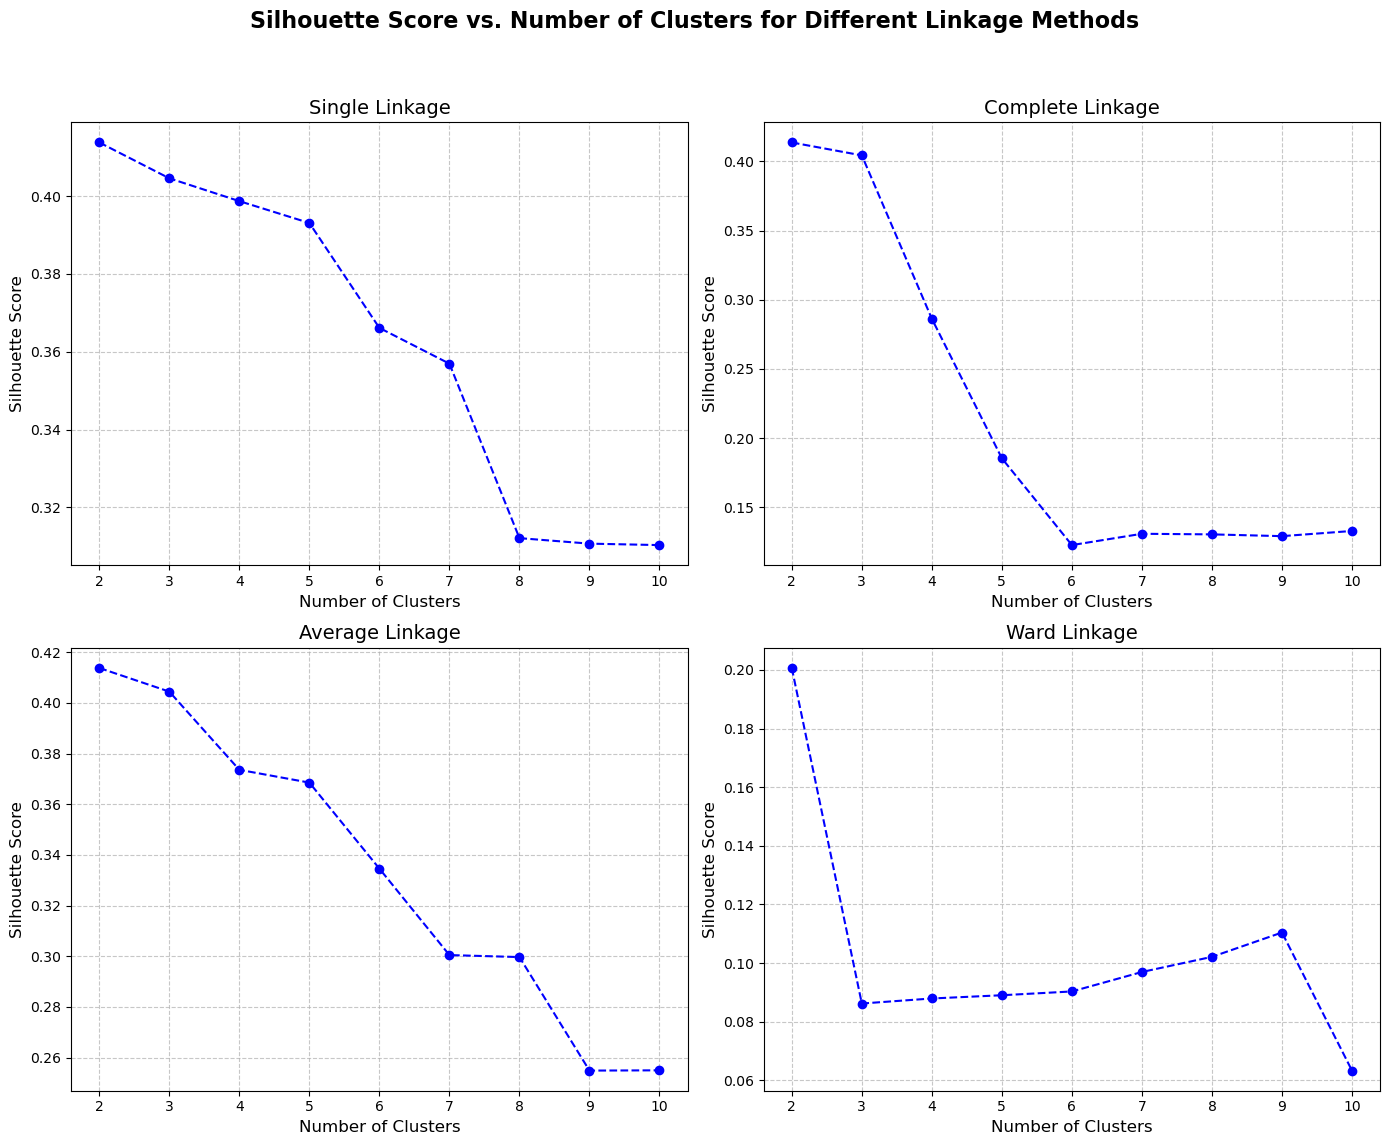

In [36]:
# Define a function to calculate silhouette scores and plot for different linkage methods
def silhouette_scores_multiple_linkages(data, max_clusters=10):
    linkage_methods = ['single', 'complete', 'average', 'ward']
    fig, axs = plt.subplots(2, 2, figsize=(14, 12))
    fig.suptitle('Silhouette Score vs. Number of Clusters for Different Linkage Methods', fontsize=16, fontweight='bold')
    
    # Iterate over each linkage method and calculate silhouette scores
    for i, method in enumerate(linkage_methods):
        # Generate the linkage matrix
        Z = linkage(data, method=method)
        
        sil_scores = []
        cluster_range = range(2, max_clusters + 1)
        
        for n_clusters in cluster_range:
            # Cut the dendrogram at the desired number of clusters
            labels = fcluster(Z, n_clusters, criterion='maxclust')
            sil_score = silhouette_score(data, labels)
            sil_scores.append(sil_score)
        
        ax = axs[i // 2, i % 2]
        ax.plot(cluster_range, sil_scores, marker='o', linestyle='--', color='b')
        ax.set_title(f'{method.capitalize()} Linkage', fontsize=14)
        ax.set_xlabel('Number of Clusters', fontsize=12)
        ax.set_ylabel('Silhouette Score', fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

silhouette_scores_multiple_linkages(data_preprocessed_standard_df, max_clusters=10)

Based on the silhouette score analysis across different linkage methods:
* Single, Complete, and Average Linkage methods indicate that the silhouette score is highest when using 2 to 4 clusters, with a noticeable drop as more clusters are added. This suggests that a smaller number of clusters (ideally 2 to 4) provides the best-defined clustering structure for these linkage methods.
* Ward Linkage shows lower silhouette scores overall but demonstrates relatively stable performance, with a slight improvement starting around 3 to 5 clusters. Given Ward’s focus on minimizing within-cluster variance, this range may provide balanced clusters.

Conclusion:

The optimal number of clusters appears to be between 2 and 4 based on the silhouette scores for most linkage methods, particularly for Single, Complete, and Average linkage. We take 3 clusters as a compromise that performs well across all methods, including Ward Linkage.

In [37]:
data_for_clustering = data_preprocessed_standard_df.select_dtypes(include=['float64', 'int64'])

# Create linkage matrix for hierarchical clustering
Z = linkage(data_for_clustering, method='ward')

# Cut the dendrogram to get at most X clusters
n_clusters_hierarchical = 3
clusters = fcluster(Z, n_clusters_hierarchical, criterion='maxclust')
data_hc = df_in_progress_2.copy()
data_hc['Cluster'] = clusters

# Count the number of data points in each cluster
cluster_counts = data_hc['Cluster'].value_counts()
print(cluster_counts)

2    912
3    658
1    411
Name: Cluster, dtype: int64


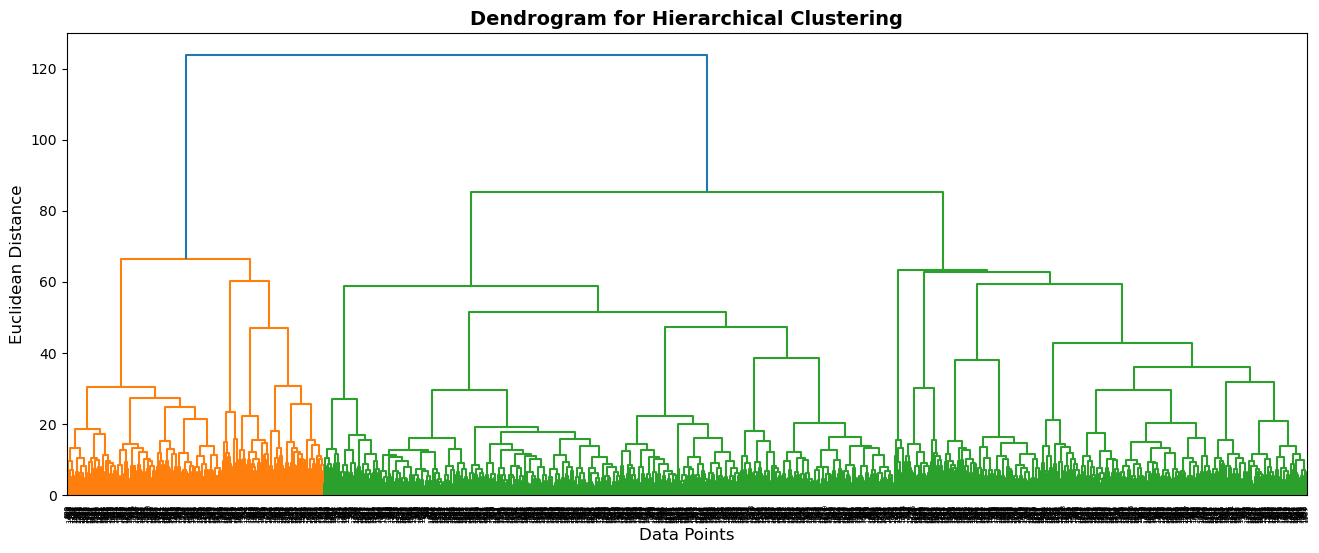

In [38]:
# Plot the dendrogram for the clustering with X clusters
plt.figure(figsize=(16, 6))

dendrogram(Z)

plt.title('Dendrogram for Hierarchical Clustering', fontsize=14, weight='bold')
plt.xlabel('Data Points', fontsize=12)
plt.ylabel('Euclidean Distance', fontsize=12)
plt.gca().set_facecolor('white')
plt.grid(False)
plt.show()

### Correlation Analysis: Civilization Level and Clustering

In this cell, we analyze the relationship between the categorical variable `Alien_Civilization_Level` and the cluster assignments from hierarchical clustering. 
This analysis helps assess whether the clusters capture meaningful distinctions related to `Alien_Civilization_Level`.

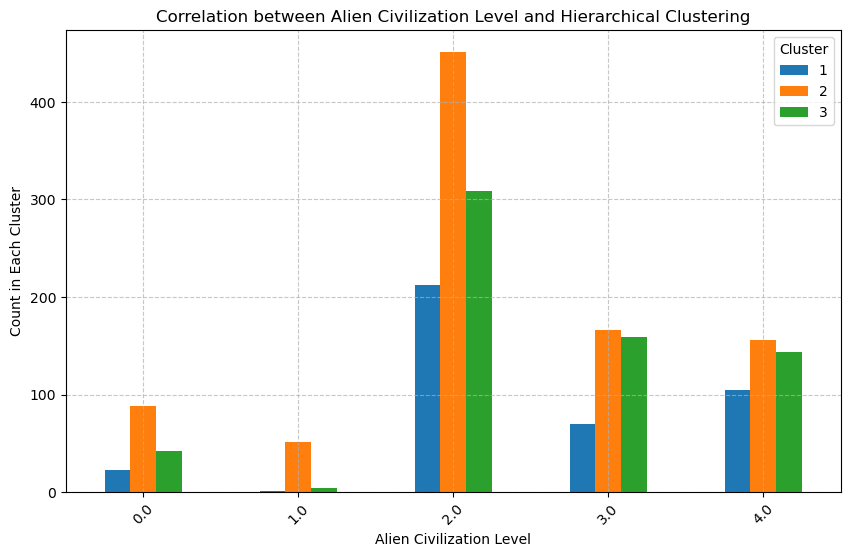

In [39]:
categorical_column = 'Alien_Civilization_Level'
if categorical_column in df_in_progress_2.columns:
    data_hc[categorical_column] = df_in_progress_2[categorical_column]
else:
    # Raise an error if the column is missing
    raise KeyError(f"The specified categorical column ('{categorical_column}') does not exist in df_in_progress_2.")

# Create a crosstab to analyze the relationship between civilization levels and cluster assignments
civilization_correlation_hierarchical = pd.crosstab(
    data_hc[categorical_column],
    data_hc['Cluster']
)

# Plot the crosstab as a bar chart to visualize the correlation
civilization_correlation_hierarchical.plot(kind='bar', figsize=(10, 6))
plt.title('Correlation between Alien Civilization Level and Hierarchical Clustering')
plt.xlabel('Alien Civilization Level')
plt.ylabel('Count in Each Cluster')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

This cell visualizes Exploration Missions vs. Young Colonies and the clusters using a scatter plot:

1. **Axes**: The plot displays `Exploration_Missions` on the x-axis and `Young_Colonies` on the y-axis.  
2. **Hue**: Points are color-coded based on the `Alien_Civilization_Level` to highlight cluster distinctions.  
3. **Purpose**: This visualization helps identify patterns or separations in clusters with respect to these two features.

The chart provides insights into how `Exploration_Missions` and `Young_Colonies` vary across civilization levels and clusters. The visual relation seems small, but don't mistake in 2D and with only 2 variables.

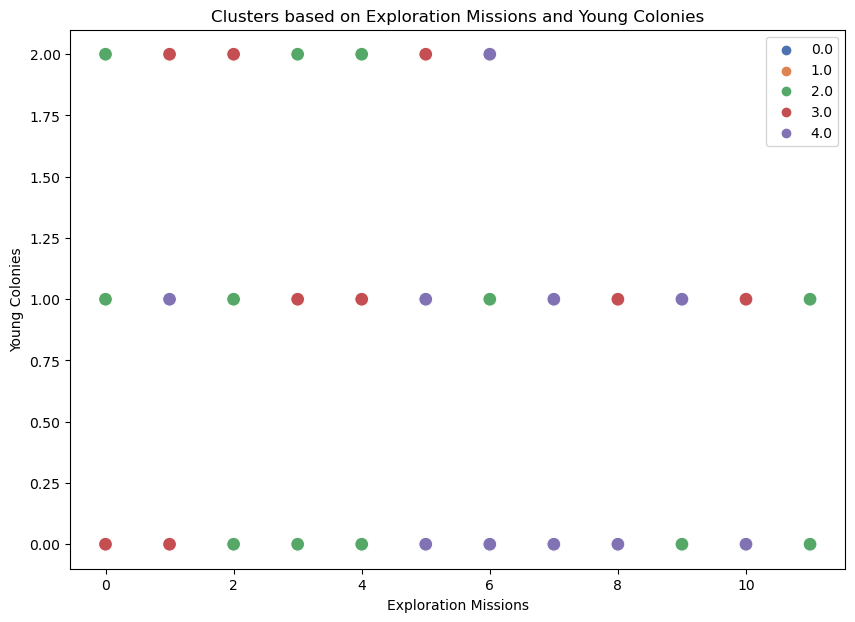

In [40]:
# Create a scatter plot to visualize clusters with 'Alien_Civilization_Level' as the hue
plt.figure(figsize=(10, 7))

# Plot the relationship between 'Exploration_Missions' and 'Young_Colonies'
sns.scatterplot(
    x=df_in_progress_2['Exploration_Missions'], 
    y=df_in_progress_2['Young_Colonies'], 
    hue=df_in_progress_2['Alien_Civilization_Level'],  # Use civilization level to color points
    palette="deep", 
    s=100
)

plt.title('Clusters based on Exploration Missions and Young Colonies')
plt.xlabel('Exploration Missions')
plt.ylabel('Young Colonies')
plt.legend()
plt.show()

### PCA and Cluster Visualization

This cell reduces the dataset dimensions to two principal components using PCA and visualizes clusters:

1. **PCA for Dimensionality Reduction**: Reduces the dataset to two components (`PCA1` and `PCA2`) for visualization.
2. **Visualization**:  
   - **Axes**: `PCA1` and `PCA2` represent the reduced dimensions.  
   - **Style**: Markers differentiate `Alien_Civilization_Level`.  
   - **Hue**: Clusters are color-coded.

##### Observation
The clusters are well-defined in the reduced space, but the relationship with `Alien_Civilization_Level` seems weak.

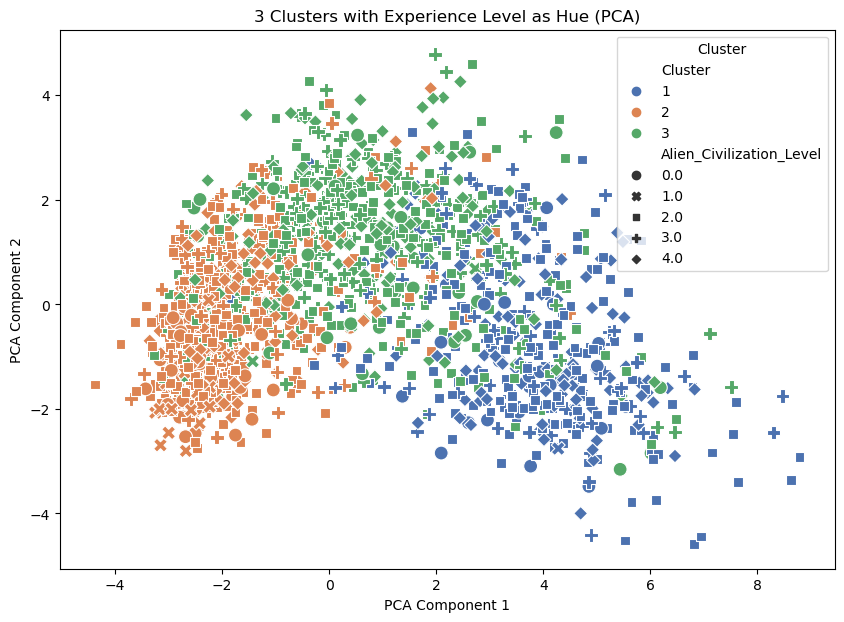

In [41]:
# Apply PCA to reduce dimensionality to 2 components for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_preprocessed_standard_df)

# Add PCA components to the dataset for plotting
data_hc['PCA1'] = pca_components[:, 0]
data_hc['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(10, 7))

# Use PCA components as axes and visualize clusters and civilization levels
sns.scatterplot(
    x=data_hc['PCA1'], 
    y=data_hc['PCA2'], 
    style=data_hc['Alien_Civilization_Level'],  # Different markers for civilization levels
    hue=data_hc['Cluster'],  # Color points by cluster
    palette="deep", 
    s=100
)

plt.title('3 Clusters with Experience Level as Hue (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

### PCA Feature Contribution Analysis

This cell applies PCA to analyze feature contributions and identify the most significant variables:

1. **Dimensionality Reduction**: PCA reduces the dataset to 2 components (`PCA1` and `PCA2`).
2. **Feature Contribution**: The absolute contributions of each feature to `PCA1` and `PCA2` are computed and sorted, helping identify the most influential variables.

This analysis highlights which features drive variance in the dataset, guiding interpretation and further analysis.

In [42]:
# Define relevant numerical columns for analysis
numerical_columns = [
    'Peace_Treaty_Accords', 'Technological_Advancements', 'Ammonia_Concentration', 'Precious_Metal_Trade_Tons', 'Food_Production_Tons',
    'Trade_Agreements_Signed', 'Last_Contact_Days', 'Mineral_Extraction_Tons', 'Galactic_Visits', 'Sulfur_Concentration',
    'Exploration_Missions', 'Biological_Research_Units', 'Offspring_Colonies', 'Cultural_Exchange_Programs', 'Military_Engagements',
    'Inhabitants_Disputes', 'Resource_Mining_Operations', 'Resource_Allocation_Credits', 'Young_Colonies', 'HeavyMetals_Concentration',
    'Terraforming_Initiatives', 'Liquid_Energy_Consumption_Terawatts', 'Alien_Population_Count', 'CO2_Concentration',
    'Hydrogen_Concentration', 'Colonization_Year', 'Species_Expansion_Response', 'Interplanetary_Communications'
]

# Standardize the numerical data for PCA
scaler = StandardScaler()
dps = scaler.fit_transform(df_in_progress_2[numerical_columns])

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
pca_components = pca.fit_transform(dps)

# Extract principal components and their contributions to variance
pca_df = pd.DataFrame(pca.components_, columns=numerical_columns, index=['PCA1', 'PCA2'])

# Sort features by their absolute contribution to PCA1 and PCA2
pca1_sorted = pca_df.loc['PCA1'].abs().sort_values(ascending=False)
pca2_sorted = pca_df.loc['PCA2'].abs().sort_values(ascending=False)

# Display sorted contributions for both components
print("PCA1 Sorted Contributions:")
print(pca1_sorted.head())

print("\nPCA2 Sorted Contributions:")
print(pca2_sorted.head())

PCA1 Sorted Contributions:
Exploration_Missions                   0.322990
Alien_Population_Count                 0.319476
Mineral_Extraction_Tons                0.312464
Liquid_Energy_Consumption_Terawatts    0.310097
Resource_Mining_Operations             0.293196
Name: PCA1, dtype: float64

PCA2 Sorted Contributions:
Young_Colonies                   0.531408
Trade_Agreements_Signed          0.498402
Interplanetary_Communications    0.324998
Colonization_Year                0.314186
Terraforming_Initiatives         0.229162
Name: PCA2, dtype: float64


### 3D PCA Visualization of Clusters

In this cell, we reduce the dataset to three principal components and create a 3D plot to visualize clusters. 

##### Why Use a 3D Plot?
While 2D plots are easier to interpret, some cluster structures or separations are better observed in 3D space. A 3D PCA visualization provides an additional dimension, potentially revealing patterns or overlaps that may not be apparent in 2D.

This visualization helps identify the spatial separation of clusters and assess their quality in three dimensions.

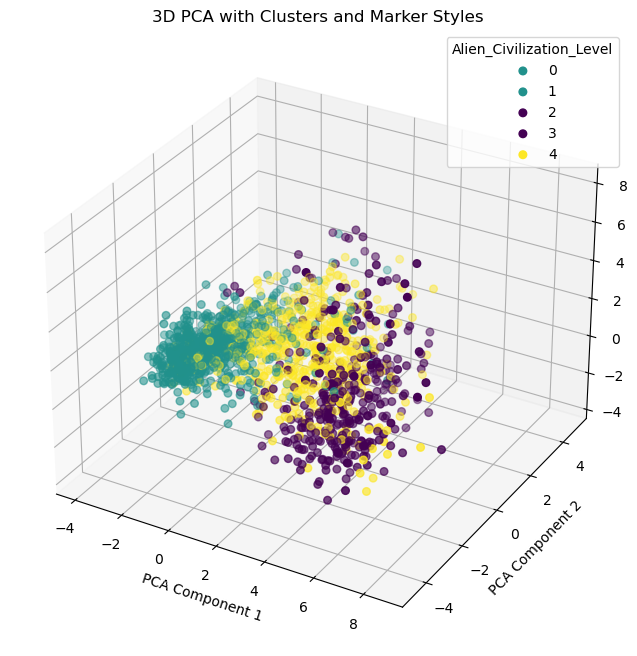

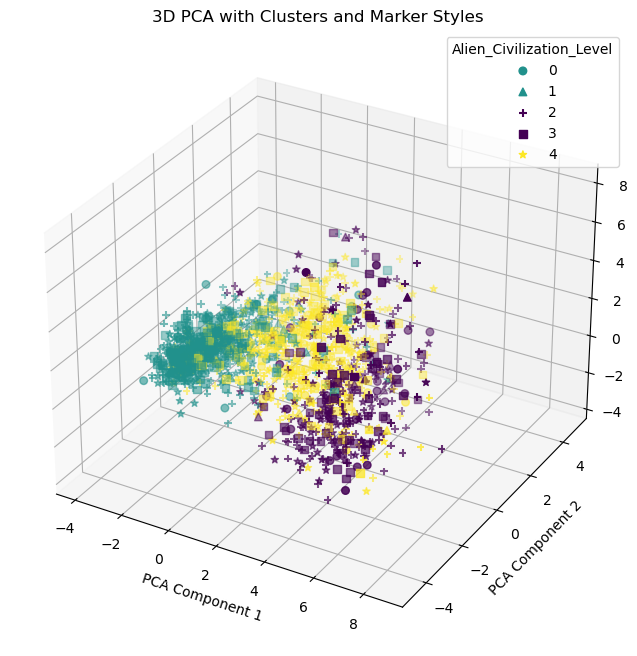

In [43]:
def perform_pca_3D(do_hue):
    # Perform PCA to reduce the dataset to 3 components
    pca = PCA(n_components=3)
    pca_components = pca.fit_transform(data_preprocessed_standard_df)

    # Add PCA components to a new DataFrame for convenience
    data_pca3 = data_preprocessed_standard_df.copy()
    data_pca3['PCA1'] = pca_components[:, 0]
    data_pca3['PCA2'] = pca_components[:, 1]
    data_pca3['PCA3'] = pca_components[:, 2]

    # Add cluster labels and marker variable (Alien Civilization Level)
    marker_variable = df_in_progress_2['Alien_Civilization_Level']
    data_pca3['Cluster'] = clusters
    data_pca3['Alien_Civilization_Level'] = marker_variable

    # Define marker styles based on `do_hue`
    if do_hue:
        marker_styles = {0: 'o', 1: '^', 2: '+', 3: 's', 4: '*'}  # Unique markers per value
    else:
        marker_styles = {0: 'o', 1: 'o', 2: 'o', 3: 'o', 4: 'o'}  # Uniform markers

    # Create a 3D scatter plot for PCA components with clusters and marker styles
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot each subset of data with its corresponding marker style
    for marker_val, marker_style in marker_styles.items():
        subset = data_pca3[data_pca3['Alien_Civilization_Level'] == marker_val]
        ax.scatter(
            subset['PCA1'], 
            subset['PCA2'], 
            subset['PCA3'], 
            c=subset['Cluster'],  # Color by cluster
            cmap='viridis',       # Color map for clusters
            marker=marker_style,  # Marker shape
            s=30,                 # Marker size
            label=marker_val      # Add legend label
        )

    ax.set_title("3D PCA with Clusters and Marker Styles")
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.set_zlabel('PCA Component 3')

    # Add legend for marker styles
    ax.legend(title="Alien_Civilization_Level")
    plt.show()

perform_pca_3D(False)
perform_pca_3D(True)

### PCA Feature Contribution Analysis for 3 variables

This analysis highlights which features drive variance in the dataset, guiding interpretation and further analysis.

In [44]:
# Selecting the relevant numerical columns from the original dataset
numerical_columns = [
    'Peace_Treaty_Accords', 'Technological_Advancements', 'Ammonia_Concentration',  'Precious_Metal_Trade_Tons', 'Food_Production_Tons',
    'Trade_Agreements_Signed', 'Last_Contact_Days', 'Mineral_Extraction_Tons',  'Galactic_Visits', 'Sulfur_Concentration',
    'Exploration_Missions', 'Biological_Research_Units', 'Offspring_Colonies', 'Cultural_Exchange_Programs', 'Military_Engagements',
    'Inhabitants_Disputes', 'Resource_Mining_Operations', 'Resource_Allocation_Credits', 'Young_Colonies', 'HeavyMetals_Concentration',
    'Terraforming_Initiatives', 'Liquid_Energy_Consumption_Terawatts', 'Alien_Population_Count', 'CO2_Concentration',
    'Hydrogen_Concentration', 'Colonization_Year', 'Species_Expansion_Response', 'Interplanetary_Communications'
]

# Standardize the data
scaler = StandardScaler()
dps = scaler.fit_transform(df_in_progress_2[numerical_columns])

# Apply PCA
pca = PCA(n_components=3)
pca_components = pca.fit_transform(dps)

# Extracting the principal components (the direction of maximum variance)
pca_df = pd.DataFrame(pca.components_, columns=numerical_columns, index=['PCA1', 'PCA2', 'PCA3'])

# Sorting the features by their absolute values for PCA1 and PCA2 separately
pca1_sorted = pca_df.loc['PCA1'].abs().sort_values(ascending=False)
pca2_sorted = pca_df.loc['PCA2'].abs().sort_values(ascending=False)
pca3_sorted = pca_df.loc['PCA3'].abs().sort_values(ascending=False)

# Display the sorted results for PCA1 and PCA2
print("PCA1 Sorted Contributions:")
print(pca1_sorted.head())

print("\nPCA2 Sorted Contributions:")
print(pca2_sorted.head())

print("\nPCA3 Sorted Contributions:")
print(pca3_sorted.head())

PCA1 Sorted Contributions:
Exploration_Missions                   0.322991
Alien_Population_Count                 0.319477
Mineral_Extraction_Tons                0.312464
Liquid_Energy_Consumption_Terawatts    0.310098
Resource_Mining_Operations             0.293196
Name: PCA1, dtype: float64

PCA2 Sorted Contributions:
Young_Colonies                   0.533125
Trade_Agreements_Signed          0.498244
Interplanetary_Communications    0.324940
Colonization_Year                0.312872
Terraforming_Initiatives         0.226804
Name: PCA2, dtype: float64

PCA3 Sorted Contributions:
Military_Engagements          0.408352
Species_Expansion_Response    0.392838
Cultural_Exchange_Programs    0.349279
Terraforming_Initiatives      0.340422
Technological_Advancements    0.327878
Name: PCA3, dtype: float64


### Cluster Analysis: Mean Values of Numeric Variables

This cell calculates and compares the mean values of numeric variables for each cluster:
This analysis highlights the differences between clusters, providing insights into their unique characteristics.

In [45]:
# Select only numeric columns for analysis
numeric_data = df_prep.select_dtypes(include=['float64', 'int64'])

# Add the cluster labels to the dataset
df_prep['Cluster'] = data_hc['Cluster']

# Calculate the mean of numeric variables for each cluster
cluster_means_4 = numeric_data.groupby(df_prep['Cluster']).mean()
cluster_means_4.T

Cluster                                       1.0           2.0           3.0
Peace_Treaty_Accords                     0.052632      0.105897      0.011925
Technological_Advancements               0.224868      0.000000      0.006734
Ammonia_Concentration                    1.504178      1.494598      1.463744
Precious_Metal_Trade_Tons               61.449591     18.118501     46.000000
Food_Production_Tons                    43.958333      5.288862     18.940972
Trade_Agreements_Signed                  1.672087      2.099757      2.962171
Last_Contact_Days                       49.092391     47.146699     51.505942
Discovery_Date                          -0.044073      0.111845     -0.098544
Mineral_Extraction_Tons                366.746556     29.228814    121.255319
Galactic_Visits                          3.535613      6.496377      5.465890
Sulfur_Concentration                     1.892183      1.960337      2.043624
Exploration_Missions                     5.351064      0.687728      2.517888
Biological_Research_Units               69.411924      8.577157     26.485857
Offspring_Colonies                       0.105121      0.803946      0.296108
Cultural_Exchange_Programs               0.065753      0.000000      0.000000
Military_Engagements                     0.168937      0.001220      0.113176
Inhabitants_Disputes                     0.000000      0.000000      0.029010
Resource_Mining_Operations               8.452316      3.353659      6.643718
Resource_Allocation_Credits             45.973118      5.311515     19.124585
Young_Colonies                           0.308943      0.438875      0.791246
HeavyMetals_Concentration                2.960630      3.024067      3.008591
Terraforming_Initiatives                 0.257979      0.000000      0.008518
Liquid_Energy_Consumption_Terawatts    656.021739     64.145161    329.986555
Alien_Population_Count               72830.214085  35151.366337  53358.646766
CO2_Concentration                        5.423592      5.387097      5.417219
Hydrogen_Concentration                  59.750461     59.807831     59.411847
Colonization_Year                     3097.644022   3101.848371   3094.987826
Species_Expansion_Response               0.280000      0.115802      0.067881
Interplanetary_Communications            5.586207      2.346535      5.016750

### Cluster Analysis

---

#### **Cluster 1:**
- **Alien Population Count**: 72,830 (Highest population across clusters)
- **Liquid Energy Consumption (Terawatts)**: 656.02 (Most energy consumed)
- **Mineral Extraction (Tons)**: 366.75 (High mining activity)
- **Precious Metal Trade (Tons)**: 61.45 (Largest trade volume)
- **Food Production (Tons)**: 43.96 (Highest agricultural output)

This cluster represents highly developed civilizations with substantial resources, high energy needs, and strong trade and mining activities.

---

#### **Cluster 2:**
- **Alien Population Count**: 35,151 (Lowest population)
- **Liquid Energy Consumption (Terawatts)**: 64.15 (Least energy consumed)
- **Mineral Extraction (Tons)**: 29.22 (Low mining activity)
- **Precious Metal Trade (Tons)**: 18.12 (Small trade volume)
- **Food Production (Tons)**: 5.29 (Lowest agricultural output)

This cluster represents smaller, less developed civilizations with minimal resource utilization and low production levels.

---

#### **Cluster 3:**
- **Alien Population Count**: 53,358 (Moderate population)
- **Liquid Energy Consumption (Terawatts)**: 329.99 (Moderate energy usage)
- **Mineral Extraction (Tons)**: 121.26 (Intermediate mining activity)
- **Precious Metal Trade (Tons)**: 46.00 (Moderate trade volume)
- **Food Production (Tons)**: 18.94 (Moderate agricultural output)

This cluster includes moderately developed civilizations with balanced resource utilization and production capacities.

---

### Key Insights:
- **Cluster 1** includes advanced civilizations with high population, energy consumption, and resource production.
- **Cluster 2** represents smaller civilizations with minimal resources and production, suggesting limited development.
- **Cluster 3** strikes a balance, representing civilizations with intermediate levels of resources and activity.

---
---
# Hyperparameter Tuning for Agglomerative Clustering

This cell performs hyperparameter tuning for Agglomerative Clustering to find the best configuration of linkage method, affinity metric, and number of clusters. 

##### Key Steps:
1. **Parameter Grid**: Define a grid of potential hyperparameters:
   - **Linkage**: Methods for computing distances between clusters (`ward`, `complete`, `average`, `single`).
   - **Affinity**: Distance metrics (`euclidean`, `manhattan`, `cosine`).
   - **Number of Clusters**: Range from 2 to 6 clusters.
2. **Model Evaluation**:
   - For each parameter combination, fit an `AgglomerativeClustering` model and predict cluster labels.
   - Evaluate the clustering performance using the **Calinski-Harabasz Index** (higher scores indicate better-defined clusters).
3. **Best Configuration**: Identify the parameter combination yielding the highest Calinski-Harabasz Index.

### Calinski-Harabasz Index:
The Calinski-Harabasz Index, also called the **Variance Ratio Criterion**, measures the quality of clustering by comparing:
- **Between-cluster dispersion**: How distinct clusters are from one another.
- **Within-cluster dispersion**: How compact clusters are.

A **higher Calinski-Harabasz Index** indicates better-defined clusters, with clear separation and tight groupings.

This analysis determines the optimal parameters for hierarchical clustering, ensuring robust and well-defined clusters.

In [46]:
# Convert the preprocessed DataFrame to a NumPy array for clustering
data = data_preprocessed_standard_df.values

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'linkage': ['ward', 'complete', 'average', 'single'],  # Methods to compute cluster distances
    'affinity': ['euclidean', 'manhattan', 'cosine'],      # Distance metrics
    'n_clusters': [2, 3, 4, 5, 6]                         # Range of clusters to evaluate
}

best_score = -1
best_params = None

# Iterate over all parameter combinations in the grid
for params in ParameterGrid(param_grid):
    # Skip invalid combinations (e.g., 'ward' linkage requires 'euclidean' affinity)
    if params['linkage'] == 'ward' and params['affinity'] != 'euclidean':
        continue
    
    # Create and configure the Agglomerative Clustering model
    model = AgglomerativeClustering(
        linkage=params['linkage'],
        affinity=params['affinity'],
        n_clusters=params['n_clusters']
    )
    
    # Fit the model and predict cluster labels
    labels = model.fit_predict(data)
    
    # Evaluate clustering using the Calinski-Harabasz Index (higher values indicate better clustering)
    score = calinski_harabasz_score(data, labels)
    print(f"Params: {params}, Calinski-Harabasz Index: {score:.4f}")

    # Update the best parameters if the current score is higher
    if score > best_score:
        best_score = score
        best_params = params

# Print the best parameter configuration and its score
print(f"\nBest Parameters: {best_params}")
print(f"Best Calinski-Harabasz Index: {best_score:.4f}")

Params: {'affinity': 'euclidean', 'linkage': 'ward', 'n_clusters': 2}, Calinski-Harabasz Index: 245.6542
Params: {'affinity': 'euclidean', 'linkage': 'ward', 'n_clusters': 3}, Calinski-Harabasz Index: 192.5904
Params: {'affinity': 'euclidean', 'linkage': 'ward', 'n_clusters': 4}, Calinski-Harabasz Index: 159.4354
Params: {'affinity': 'euclidean', 'linkage': 'ward', 'n_clusters': 5}, Calinski-Harabasz Index: 142.4367
Params: {'affinity': 'euclidean', 'linkage': 'ward', 'n_clusters': 6}, Calinski-Harabasz Index: 133.3204
Params: {'affinity': 'euclidean', 'linkage': 'complete', 'n_clusters': 2}, Calinski-Harabasz Index: 58.7593
Params: {'affinity': 'euclidean', 'linkage': 'complete', 'n_clusters': 3}, Calinski-Harabasz Index: 69.7227
Params: {'affinity': 'euclidean', 'linkage': 'complete', 'n_clusters': 4}, Calinski-Harabasz Index: 81.3797
Params: {'affinity': 'euclidean', 'linkage': 'complete', 'n_clusters': 5}, Calinski-Harabasz Index: 126.3270
Params: {'affinity': 'euclidean', 'linkage

### Describing the Best Clustering Configuration

This cell analyzes the two clusters identified as the best fit based on the hyperparameter tuning results.

This process provides a detailed description of the two clusters and highlights the variables that differentiate them, offering insights into the clustering structure.

In [47]:
# Adjust the affinity metric if 'manhattan' is selected, as it is equivalent to 'cityblock' for clustering
if best_params['affinity'] == 'manhattan':
    metric = best_params['affinity'] = 'cityblock'

# Perform hierarchical clustering using the best parameters identified during tuning
Z = linkage(data_for_clustering, method=best_params['linkage'], metric=best_params['affinity'])

# Assign cluster labels based on the hierarchical clustering results
clusters = fcluster(Z, best_params['n_clusters'], criterion='maxclust')
data_best_cluster = df_in_progress_2.copy()
data_best_cluster['Cluster'] = clusters

# Count the number of data points in each cluster
cluster_counts = data_best_cluster['Cluster'].value_counts()
print(cluster_counts)

# Select only numeric columns for analysis
df_prep = df_prep.drop(['Cluster'], axis=1)
numeric_data = df_prep.select_dtypes(include=['float64', 'int64'])
df_prep['Cluster'] = data_best_cluster['Cluster']

# Calculate the mean values of numeric variables for each cluster
cluster_means_4 = numeric_data.groupby(df_prep['Cluster']).mean()
cluster_means_4.T

2    1323
1     658
Name: Cluster, dtype: int64


Cluster                                       1.0           2.0
Peace_Treaty_Accords                     0.048359      0.071667
Technological_Advancements               0.146667      0.000838
Ammonia_Concentration                    1.466102      1.496234
Precious_Metal_Trade_Tons               60.046154     24.698003
Food_Production_Tons                    37.345423      8.034923
Trade_Agreements_Signed                  2.055556      2.425726
Last_Contact_Days                       48.190236     49.402202
Discovery_Date                          -0.078587      0.054129
Mineral_Extraction_Tons                295.744501     46.794045
Galactic_Visits                          4.066087      6.279668
Sulfur_Concentration                     1.978405      1.971596
Exploration_Missions                     4.596639      1.109152
Biological_Research_Units               59.252101     11.131052
Offspring_Colonies                       0.131092      0.668930
Cultural_Exchange_Programs               0.040816      0.000000
Military_Engagements                     0.126904      0.046296
Inhabitants_Disputes                     0.029010      0.000000
Resource_Mining_Operations               8.032203      4.221562
Resource_Allocation_Credits             39.915683      7.733831
Young_Colonies                           0.474490      0.556580
HeavyMetals_Concentration                2.979730      3.018303
Terraforming_Initiatives                 0.170000      0.000000
Liquid_Energy_Consumption_Terawatts    556.105802    138.276416
Alien_Population_Count               67507.880623  39909.712963
CO2_Concentration                        5.390285      5.411668
Hydrogen_Concentration                  60.325774     59.328698
Colonization_Year                     3095.816781   3100.146067
Species_Expansion_Response               0.208609      0.096346
Interplanetary_Communications            5.500000      3.119694

### Cluster Descriptions

---

#### **Cluster 1:**
- **Precious Metal Trade (Tons)**: 60.05 (Substantially higher than Cluster 2)
- **Food Production (Tons)**: 37.35 (High output compared to Cluster 2)
- **Mineral Extraction (Tons)**: 295.74 (Significant mining activity)
- **Liquid Energy Consumption (Terawatts)**: 556.11 (Higher energy usage)
- **Alien Population Count**: 67,507.88 (Larger population)
- **Colonization Year**: 3095.82 (Earlier colonization dates)

This cluster represents advanced civilizations with higher populations, greater resource production (food, minerals), and significant energy consumption, suggesting well-established systems and development.

---

#### **Cluster 2:**
- **Precious Metal Trade (Tons)**: 24.70 (Lower trade volume)
- **Food Production (Tons)**: 8.03 (Minimal agricultural output)
- **Mineral Extraction (Tons)**: 46.79 (Limited mining activity)
- **Liquid Energy Consumption (Terawatts)**: 138.28 (Low energy usage)
- **Alien Population Count**: 39,909.71 (Smaller population)
- **Colonization Year**: 3100.15 (More recent colonization dates)

This cluster represents smaller, less developed civilizations with lower populations, limited resource production, and lower energy requirements, indicating emerging or less advanced societies.

---

### Key Insights:
- **Cluster 1** comprises highly developed civilizations with strong economies, larger populations, and significant resource utilization.
- **Cluster 2** includes developing civilizations with smaller populations, minimal resource production, and lower energy needs.

In [48]:
end_time = datetime.now()
print(f"Total Runtime: {end_time - start_time}")

Total Runtime: 0:00:29.914084
